In [17]:
#options(repos=structure(c(CRAN="https://cran.cnr.berkeley.edu/")))
#install.packages("timeSeries")
#install.packages("forecast")
#install.packages("urca")
#install.packages("ggplot2")
#install.packages("ggthemes")
#install.packages("lubridate")
#install.packages("wordcloud")

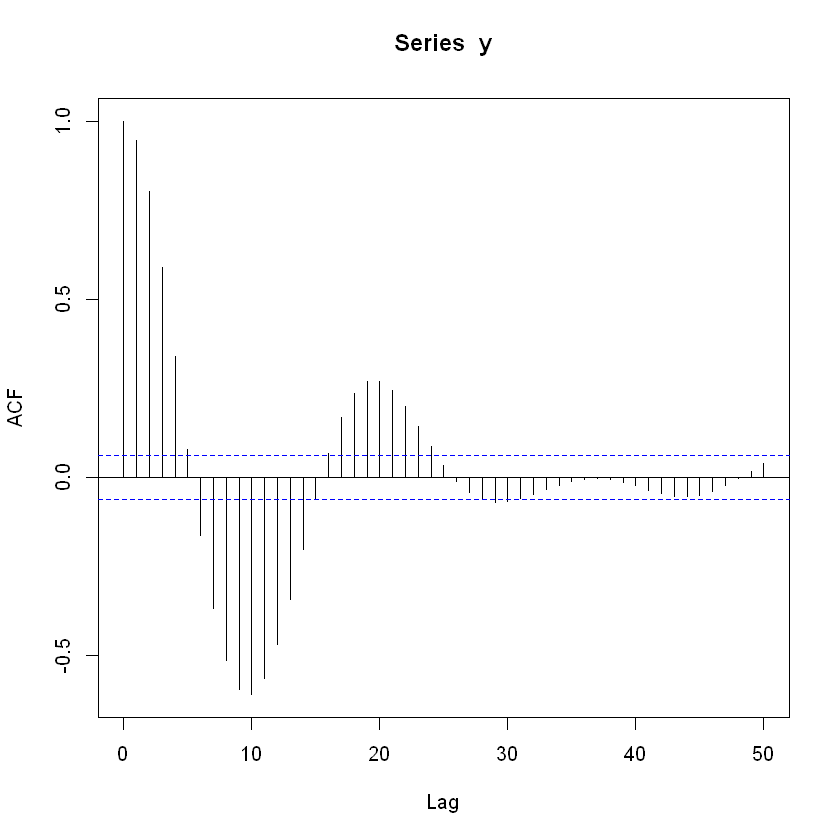

[1] "Manually Calculating from Phi1 & Phi2:"
[1] "rho1= 0.947368421052632"
[1] "rho2= 0.805263157894737"
[1] "rho3= 0.596842105263158"
[1] "r1= 0.947368421052632"
[1] "r2= -0.9"
[1] "r3= 0"
[1] "With autogenerated values: "


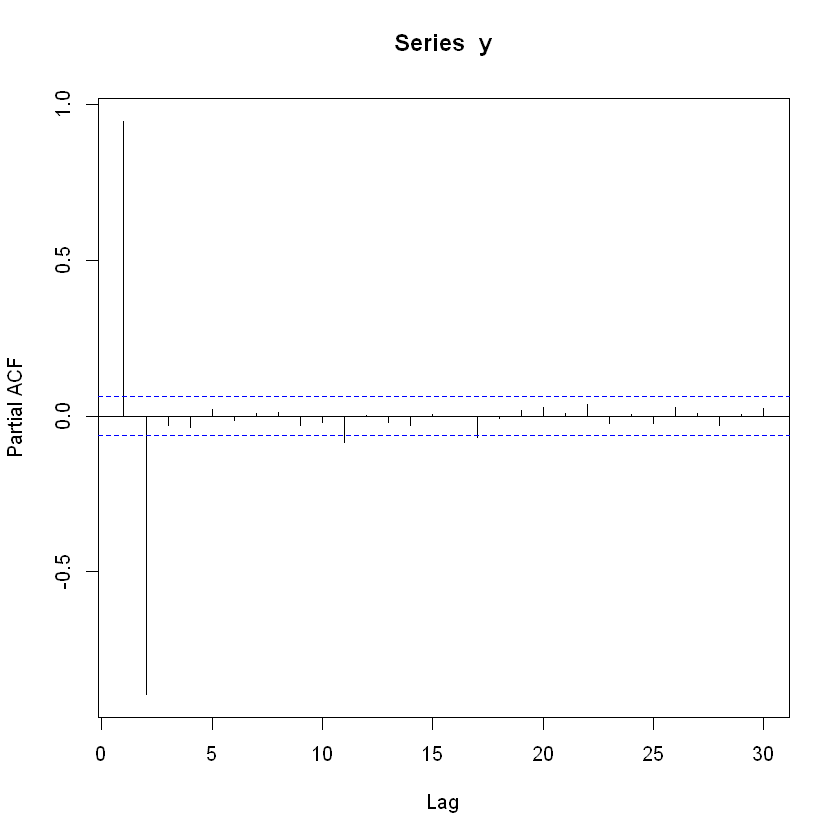

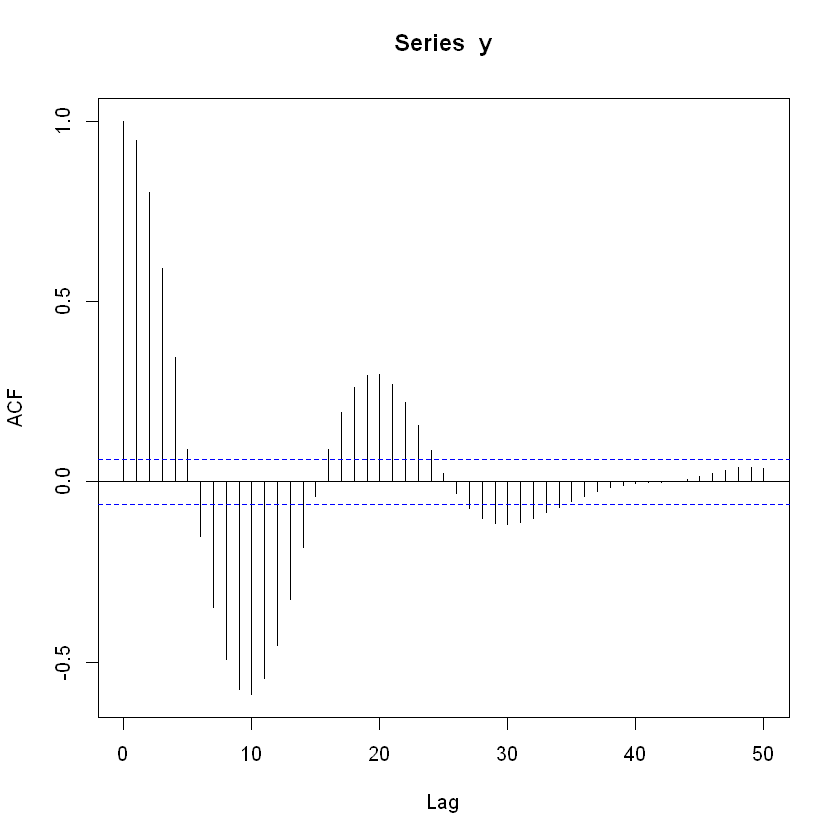

[1] "Manually Calculating from Phi1 & Phi2:"
[1] "rho1= 0.321428571428571"
[1] "rho2= -1.51071428571429"
[1] "rho3= -1.93821428571429"
[1] "r1= 0.321428571428571"
[1] "r2= -1.8"
[1] "r3= 0"
[1] "With autogenerated values: "


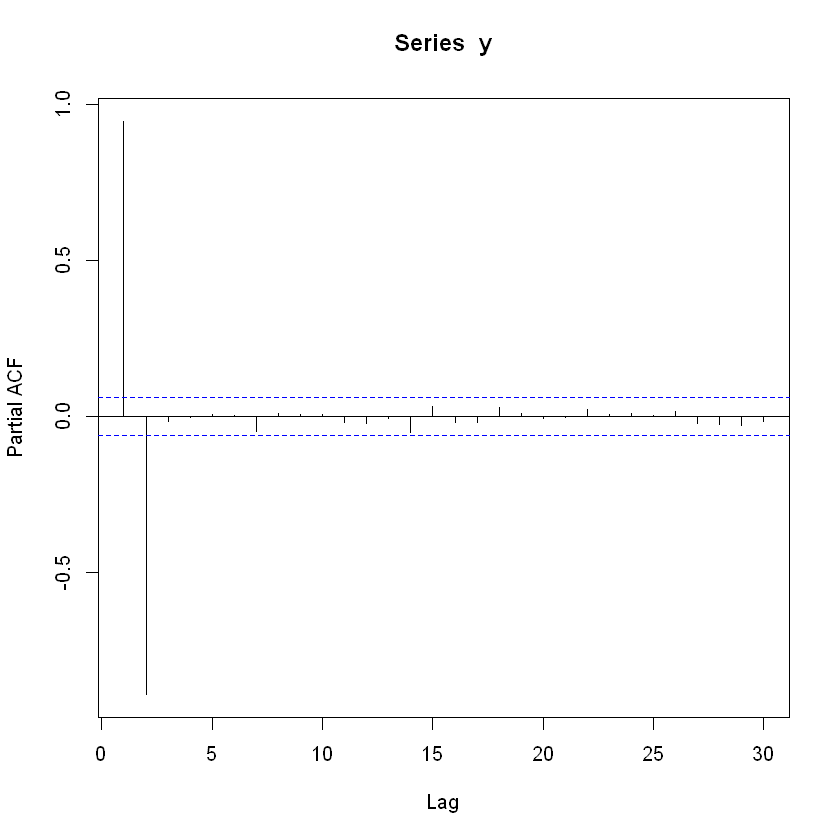

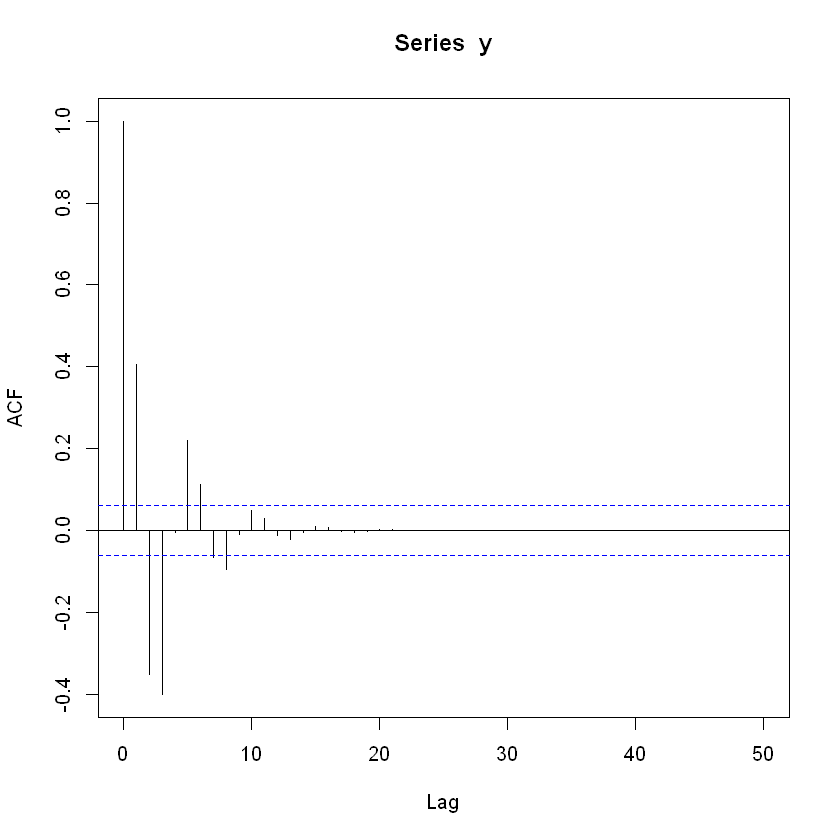

[1] "Manually Calculating from Phi1 & Phi2:"
[1] "rho1= 0.705882352941177"
[1] "rho2= 0.147058823529412"
[1] "rho3= -0.31764705882353"
[1] "r1= 0.705882352941177"
[1] "r2= -0.7"
[1] "r3= 0"
[1] "With autogenerated values: "


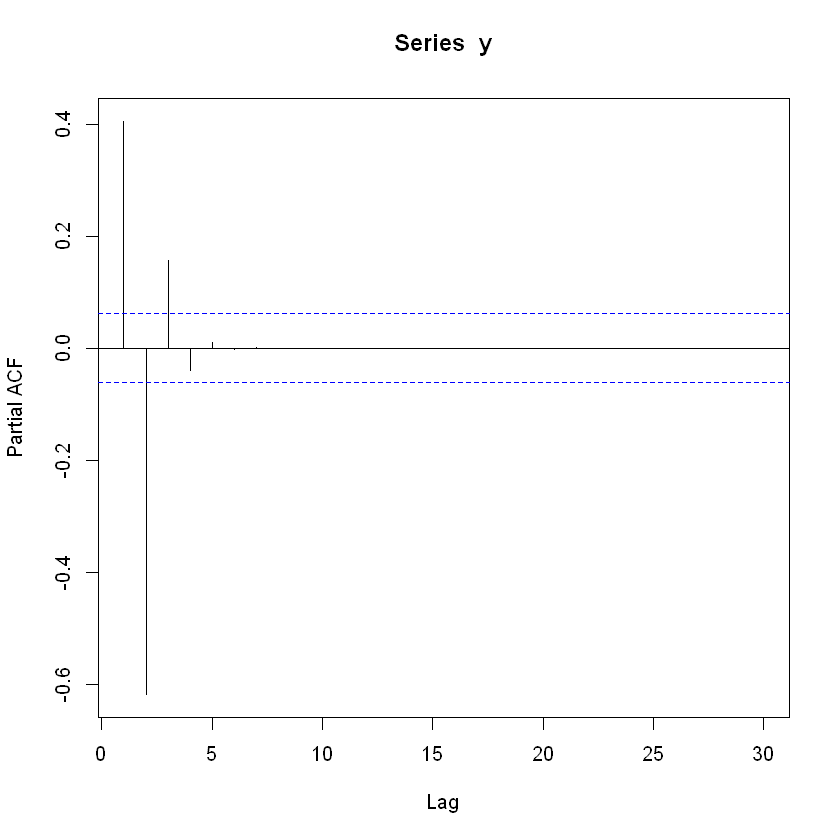

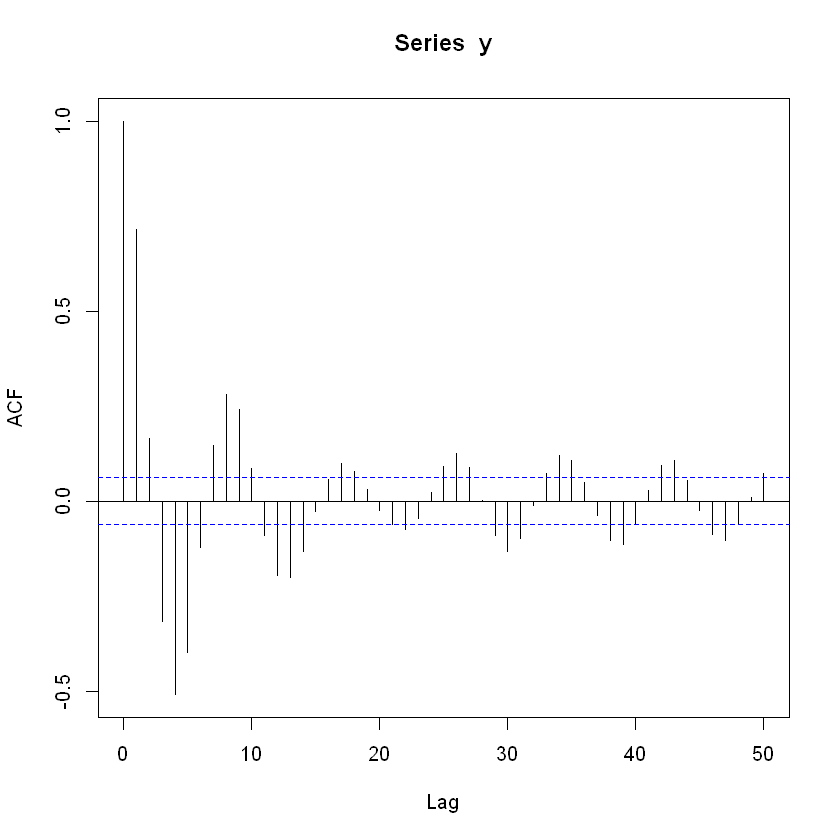

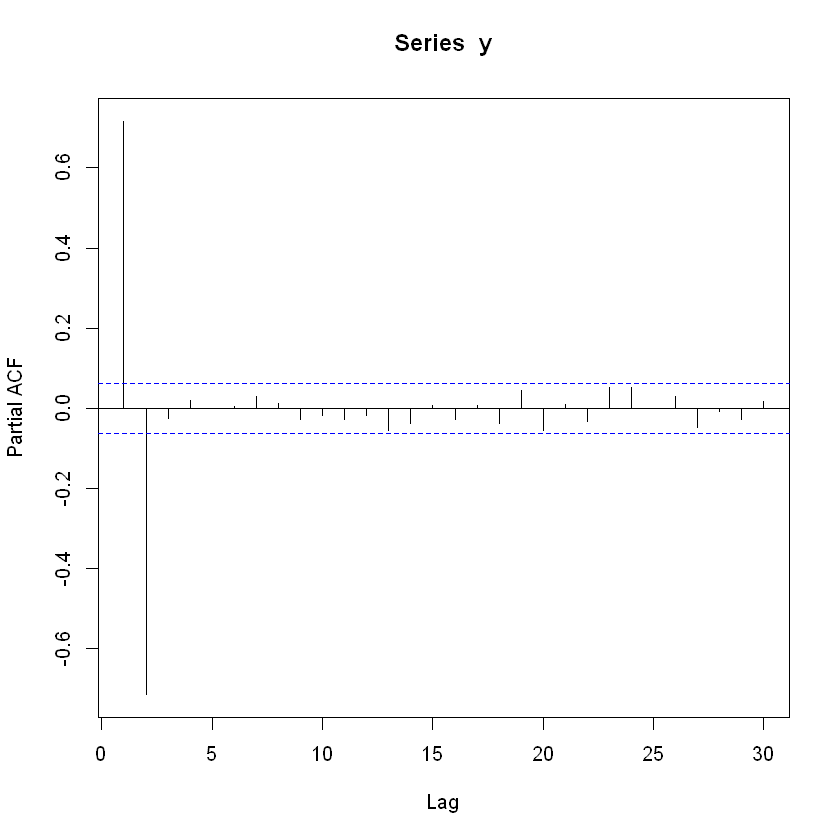

In [1]:
#simulate AR(2) data and turn into a time series
#Assignemnt: 
#Part 1:
#Given: phi1 and phi2, calculate rho 1-3 and r1-3 (autocorrelation and partial autocorrelation) for lag 1-3
#Required: abs(phi1+phi2) < 1... round to 4x decimal points

#Part 2: Simulate AR(2) data in R and provide ACF & PACF and some explanation of why/if those look right
#expecting to see a complicated ACF and 1x non zero PACF, a second non-zero PACF, and a 0 third PACF
#if phi1=1.8 and phi2=-0.9
#yt=1.8yt-1 + -0.9yt-2 + episilonT 
#episolonT: e = rnorm(1000) for variance of 1 vs rnorm(1000)*2^(1/2) for a variance of 2 [rnorm(n,mean=0,sd=1)]
e=rnorm(1000)
#plot(e)

#initializaion conditions: how to we start this off? 
#Y1 = 1.8(y0) + -0.9(y-1) + e1 -> we dont have a y0 or y-1
#We'll use 0 for things we dont know for ease and the sake of the book:
#y1=0
#y2 = 1.8(y1) + -0.9(y0) + e2
#y2 = 0
#y3 = 1.8(y2) + -0.9(y1) + e3
#y3 = e3
#y4 = 1.8(y3) + -0.9(y2) + e4
#y4 = 1.8(y3) + e4

y=c(0,0)
for (t in 3:1000){
  y[t] = 1.8*y[t-1]-0.9*y[t-2]+e[t] 
}

acf(y, lag.max = 50)
#the auto correlation is substantially more complicated that we could expect to get with an AR(1)
pacf(y)
#mathces what we would expect: lag 1 and 2 are outside of confidence bands, everything else is within confidence bands, 
#and 1 & 2 are really close to what we expect for r1, r2 calculations

#call the function like what was done below, passing it any values for phi1 and phi2 and...
#it will print the ACF and PACF values that were calculated, along with generating an AR(2) 
#with those phi values
ar2_function = function(phi1,phi2){
  rho1 = phi1/(1-phi2)
  rho2 = ((phi1^2)/(1-phi2))+phi2
  rho3 = ((phi1^3)/(1-phi2))+(phi1*phi2)+((phi1*phi2)/(1-phi2))
  r1 = rho1
  r2 = phi2
  r3 = 0
  print("Manually Calculating from Phi1 & Phi2:")
  print(paste0("rho1= ",rho1))
  print(paste0("rho2= ",rho2))
  print(paste0("rho3= ",rho3))
  print(paste0("r1= ",r1))
  print(paste0("r2= ",r2))
  print(paste0("r3= ",r3))
  
  print("With autogenerated values: ")
  #generate an AR(2) based on the original parameters and 1000 values
  e=rnorm(1000)
  y=c(0,0)
  for (t in 3:1000){
    y[t] = phi1*y[t-1]+phi2*y[t-2]+e[t] 
  }
  acf(y, lag.max = 50)
  pacf(y)
}
ar2_function(1.8,-0.9)
ar2_function(0.9,-1.8)
ar2_function(1.2,-0.7)


`geom_smooth()` using method = 'loess'


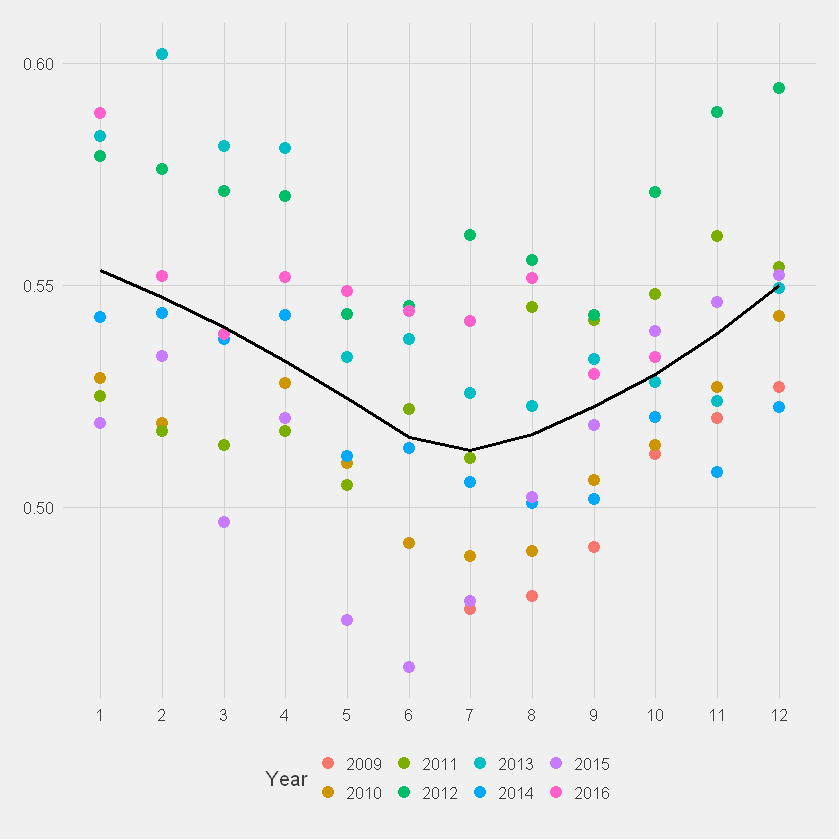

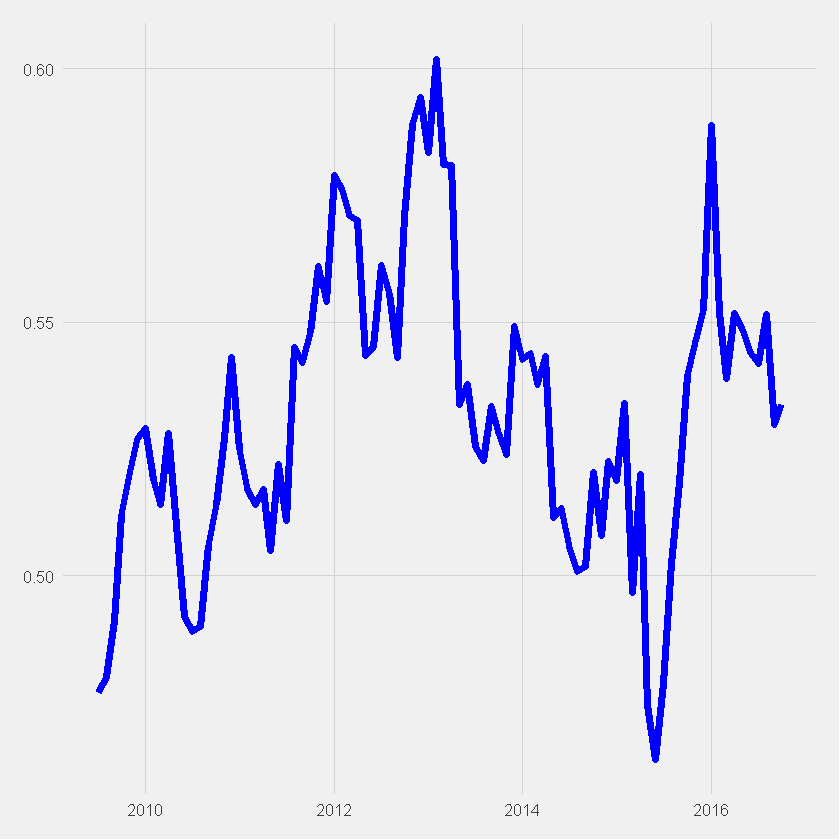


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.037795 -0.007790 -0.002392  0.009373  0.043832 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.1580933  0.0525632   3.008  0.00399 **
z.lag.1     -0.2682820  0.0898687  -2.985  0.00425 **
tt          -0.0002395  0.0001456  -1.645  0.10579   
z.diff.lag1 -0.0334409  0.1345977  -0.248  0.80473   
z.diff.lag2  0.2349232  0.1279191   1.836  0.07179 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01692 on 54 degrees of freedom
Multiple R-squared:  0.1999,	Adjusted R-squared:  0.1406 
F-statistic: 3.372 on 4 and 54 DF,  p-value: 0.01554


Value of test-statistic is: -2.9853 3.0223 4.5046 

Critical values for tes

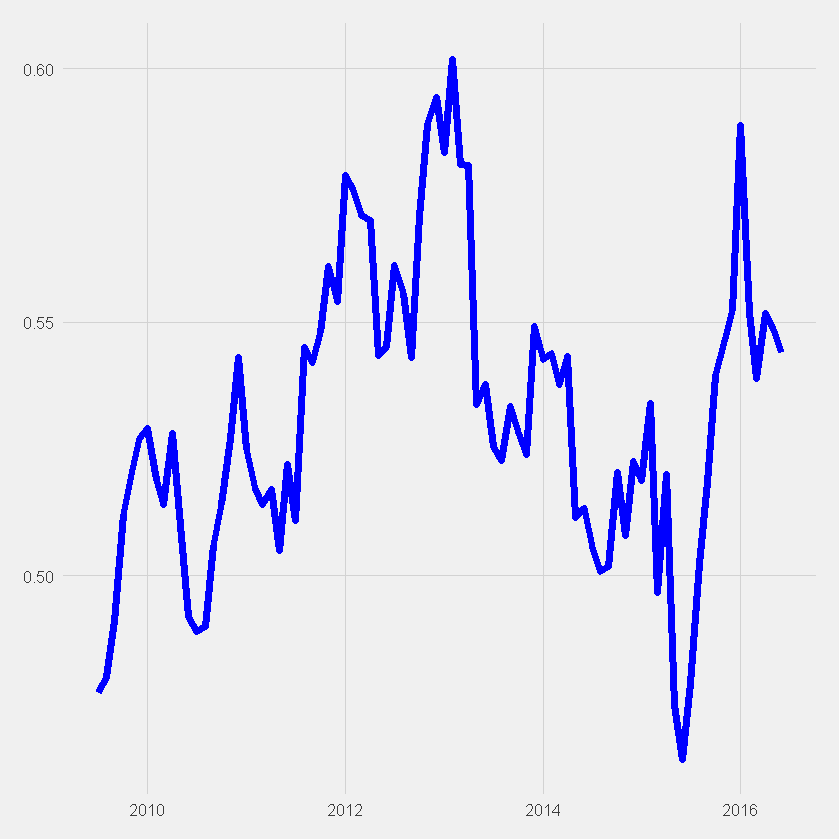

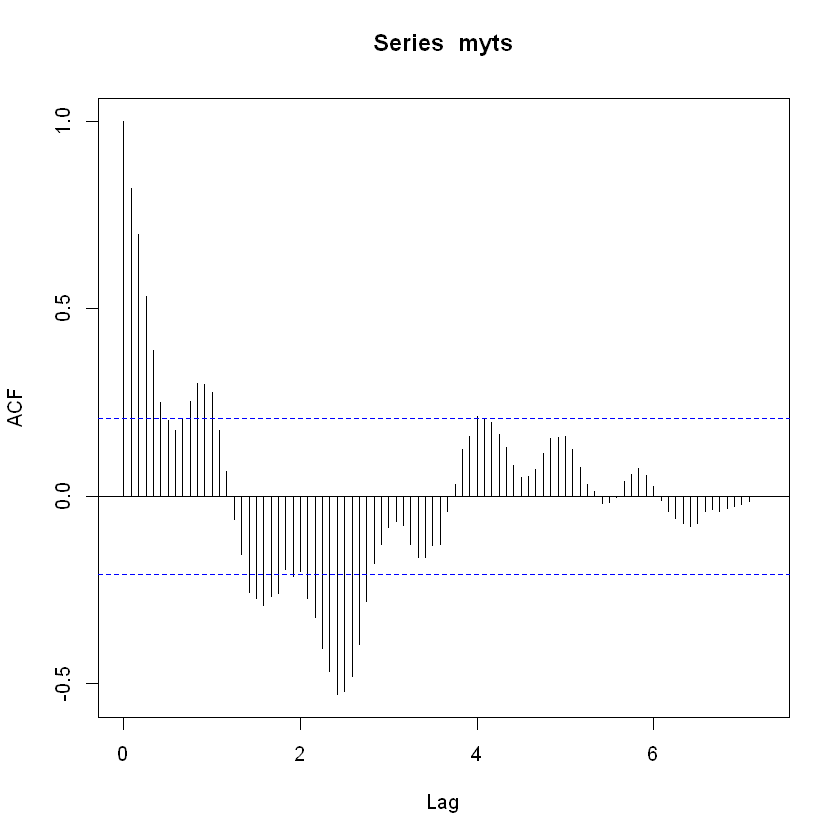

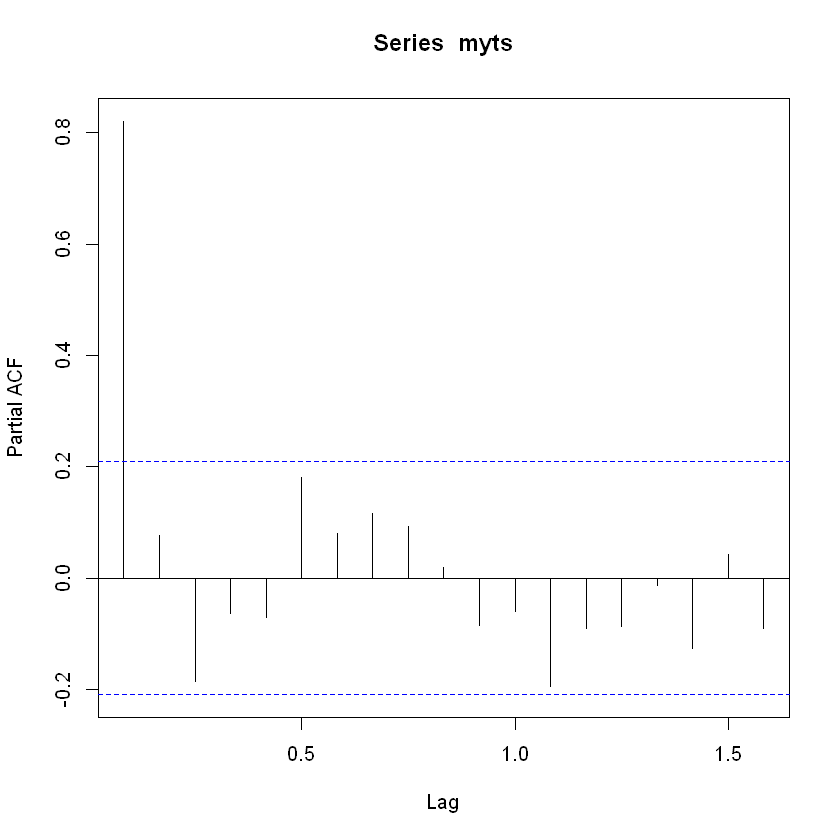


	Box-Ljung test

data:  my_model$residuals
X-squared = 9.8096, df = 25, p-value = 0.9971


ERROR: Error in eval(expr, envir, enclos): could not find function "forecast.Arima"


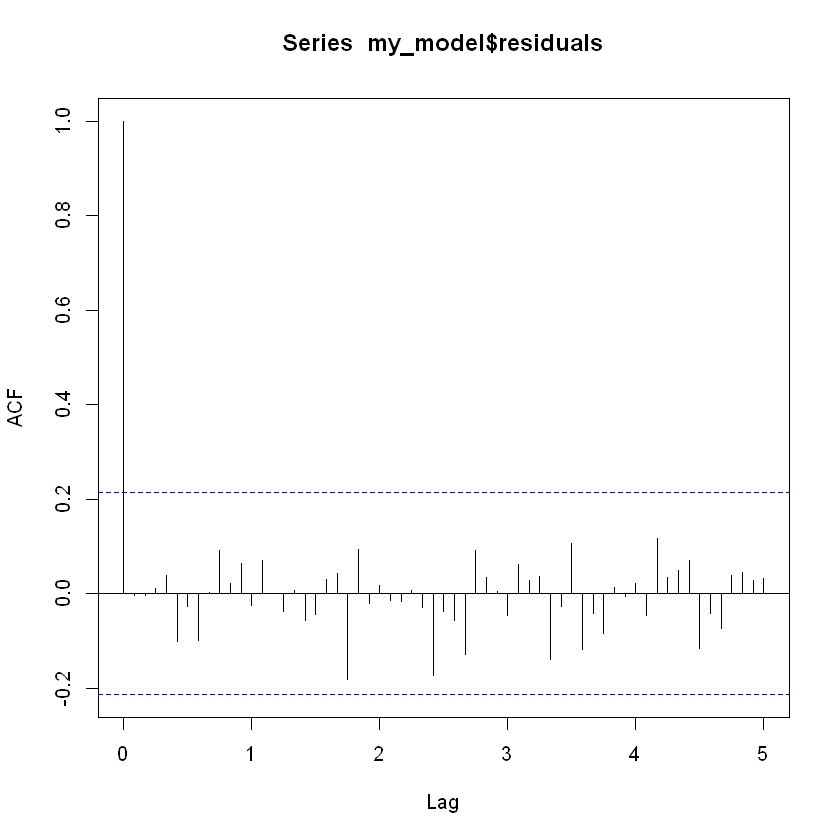

In [10]:
#ECON 5337 Group Project

library(timeSeries)
library(forecast)
library(urca)
library(ggplot2)
library(ggthemes)
library(lubridate)

pdata <- read.csv('D:\\R_Projects\\Patient_Satisfaction_Time_Series.csv')
graphData <- data.frame(pdata[1:2])
graphData$Date <- as.Date(graphData$Date, format = "%m/%d/%Y")
graphData$Month <- as.factor(month(graphData$Date))
graphData$Year <- as.factor(year(graphData$Date))

seasonality <- ggplot(graphData, aes(x=Month, y=NPER.Score, col = Year, group =1))+geom_point(size = 3)+geom_smooth(se=FALSE, col = 'Black')+theme_fivethirtyeight()
seasonality

ts_graph <- ggplot(graphData, aes(x=Date, y=NPER.Score, group = 1))+geom_line(size=2, col='blue')+theme_fivethirtyeight()
ts_graph

graph_holdout <- head(graphData, -4)
holdout_graph <- ggplot(graph_holdout, aes(x=Date, y=NPER.Score, group = 1))+geom_line(size=2, col='blue')+theme_fivethirtyeight()
holdout_graph


#End of initial graphing, calculations of forecast
myts <- ts(pdata$NPER.Score, start = c(2009,7), end = c(2016,10),freq = 12)

holdout = ts(myts, start = c(2009,7), end = c(2016,6), freq = 12)

myts_df_test = ur.df(holdout, type = "trend", lags = 24, selectlags = "AIC")
summary(myts_df_test)
#p-value: 0.01491 - fail to reject Ho, meaning that the data is not stationary.  

acf(myts, lag.max = 100)
pacf(myts)

my_model <- Arima(holdout,order=c(1,1,0),seasonal = c(1,0,1))

acf(my_model$residuals, lag.max = 60)
Box.test(my_model$residuals, lag=25, type="Ljung-Box")

foreIN <- forecast.Arima(my_model, h=4)
upper=ts(foreIN$upper[,2], start = c(2016,7), frequency = 12)
lower=ts(foreIN$lower[,2], start = c(2016,7), frequency = 12)

#plot original + holdout + confidence bands
graph_foreIN <- as.data.frame(foreIN)
graph_foreIN$Month <- c(7,8,9,10)
graph_foreIN$Year <- c(2016,2016,2016,2016)
graph_foreIN$Date <- c(as.Date('2016-07-01'),as.Date('2016-08-01'),as.Date('2016-09-01'),as.Date('2016-10-01'))

holdout_graph + geom_smooth(data=graph_foreIN,aes(x=Date, y=`Point Forecast`, group = 1),size=2, col='red')+ 
  geom_smooth(data=graph_foreIN,aes(x=Date, y=`Lo 80`, group = 1),size=2, col='black')+
  geom_smooth(data=graph_foreIN,aes(x=Date, y=`Hi 80`, group = 1),size=2, col='black')

full_model <- Arima(myts,order = c(1,1,0), seasonal = c(1,0,1))
foreOUT <- forecast.Arima(full_model, h=2)

upperOUT=ts(foreOUT$upper[,2], start = c(2016,11), frequency = 12)
lowerOUT=ts(foreOUT$lower[,2], start = c(2016,11), frequency = 12)

graph_FO <- as.data.frame(foreOUT)
graph_FO$Date <- c(as.Date('2016-11-01'),as.Date('2016-12-01'))

#ts_graph + geom_smooth(data=graph_FO,aes(x=Date, y=`Point Forecast`, group = 1),size=2, col='red')+ geom_smooth(data=graph_FO,aes(x=Date, y=`Lo 80`, group = 1),size=2, col='black')+geom_smooth(data=graph_FO,aes(x=Date, y=`Hi 80`, group = 1),size=2, col='black')

end_data <- read.csv('D:\\R_Projects\\Patient_Satisfaction_Time_Series4.csv')
final_data <- data.frame(end_data)
final_data$Date <- as.Date(final_data$Date, format = "%m/%d/%Y")

last_graph <- ggplot(final_data, aes(x=Date, y=NPER.Score, group = 1))+
  geom_line(size=2, col='blue')+
  geom_line(aes(x=Date, y=Forecast, group=1),col='red',size=2)+
  geom_line(aes(x=Date, y=Lo80, group=1),col='black',size=2)+
  geom_line(aes(x=Date, y=Hi80, group=1),col='black',size=2)+
  theme_fivethirtyeight()
last_graph



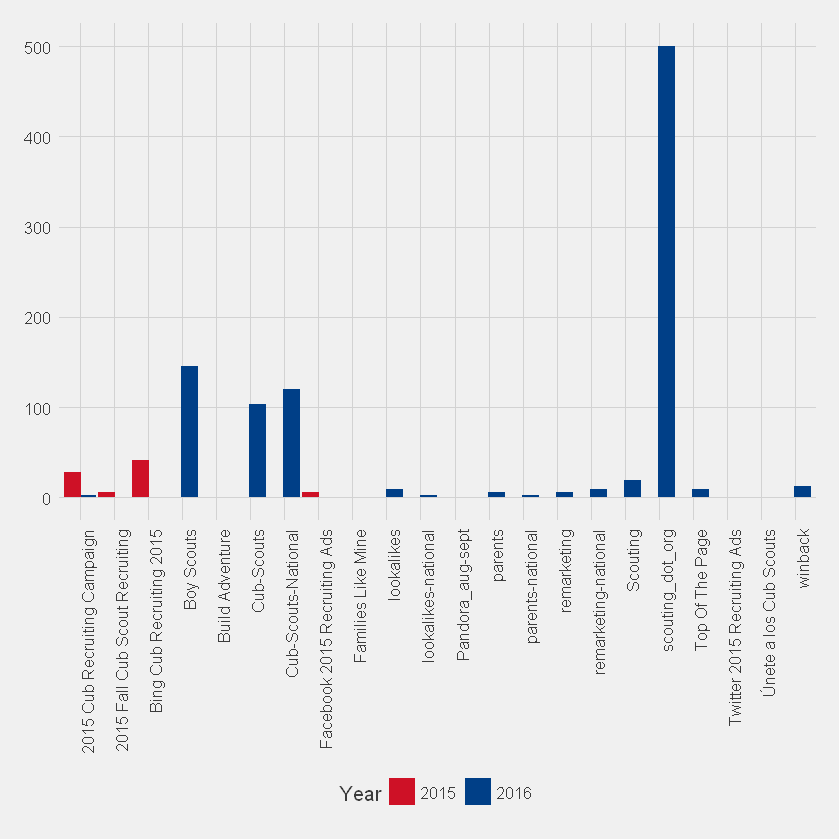

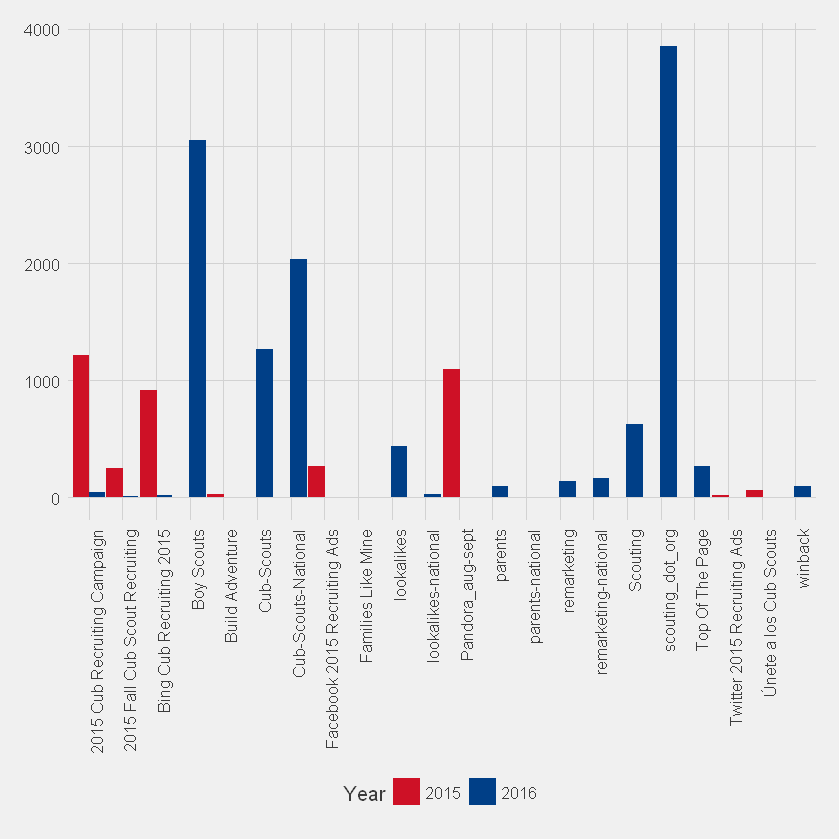

Warning message:
"Removed 4611 rows containing non-finite values (stat_smooth)."

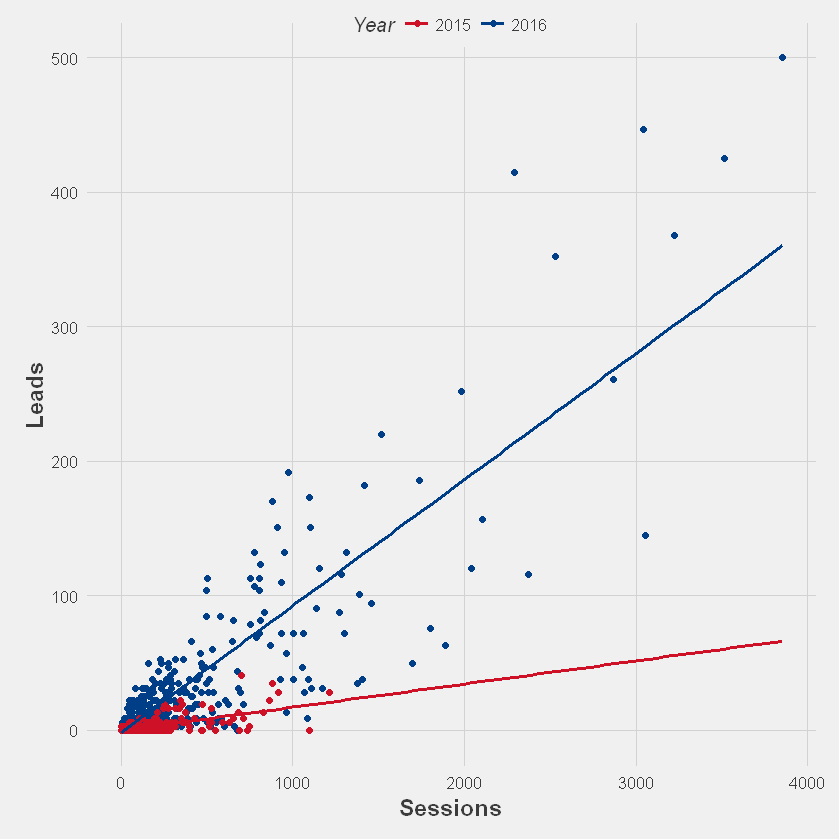

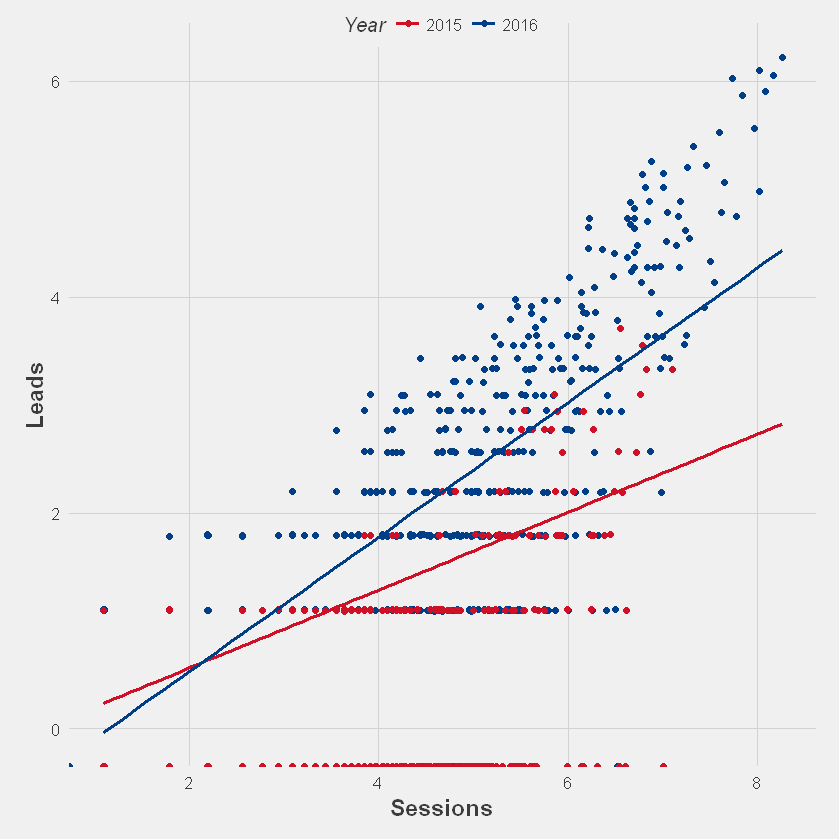

In [11]:
#Scouting.org Ad Buy Analysis by Market 1Aug2015-13Oct2015 vs 1Aug2016-13Oct2016

#Libraries
library(ggplot2)
library(ggthemes)

#myColors
BSA_Red <- "#CE1126"
BSA_Blue <- "#003F87"
BSA_Yellow <- "#FCD116"
BSA_Green <- "#006B3F"
BSA_2Color <- c(BSA_Red,BSA_Blue)
Cub_2Color <- c(BSA_Yellow,BSA_Blue)
BSA_Alt2 <- c(BSA_Yellow,BSA_Green)

#other graphing data
posn.d <- position_dodge(0.9)

#data import
df <- read.csv("D:\\R_Projects\\yoyAds.csv")

#restructure data
df$Year <- as.factor(df$Year)
df<- subset(df, df$Campaign != "not set")
df<- subset(df, df$Campaign != "buffer")
df<- subset(df, df$Campaign != "Other")
df<- subset(df, df$Campaign != "interests")
df<- subset(df, df$Campaign != "Be A Scout")
df$ConvRate <- df$Leads/df$Sessions


#inspect data graphically
leads <- ggplot(df, aes(x=Campaign, y=Leads, fill=Year))+ scale_fill_manual(values=BSA_2Color)
leads +geom_bar(stat="identity",width=1, position=posn.d)+theme_fivethirtyeight() + theme(axis.text.x = element_text(angle = 90, hjust = 1))


sessions <- ggplot(df, aes(x=Campaign, y=Sessions, fill=Year))+ scale_fill_manual(values=BSA_2Color)
sessions + geom_bar(stat="identity",width=1,position=posn.d)+theme_fivethirtyeight() + theme(axis.text.x = element_text(angle=90,hjust=1))


#conv <- ggplot(df, aes(x=Campaign, y=ConvRate, fill=Year))+scale_fill_manual(values=BSA_2Color)
#conv + geom_bar(stat="identity",width=0.3,position=posn.d)+ theme(axis.text.x = element_text(angle=90,hjust=1))

regr<- ggplot(df, aes(x=Sessions, y=Leads, col=Year))+scale_color_manual(values=BSA_2Color)
regr +geom_point()+geom_smooth(method="lm",se=F,fullrange=T)+theme_fivethirtyeight()+theme(legend.position = c(0.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))

#log transformation of data
df2 <-df
df2$Leads <- log(df2$Leads)
df2$Sessions <- log(df2$Sessions)

#log regression plots
lregr<- ggplot(df2, aes(x=Sessions, y=Leads, col=Year))+scale_color_manual(values=BSA_2Color)
lregr +geom_jitter()+geom_smooth(method="lm",se=F,fullrange=T)+theme_fivethirtyeight()+theme(legend.position = c(0.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))


#df3<- subset(df2, df$Campaign != "Be A Scout")
#leads <- ggplot(df3, aes(x=Campaign, y=Leads, fill=Year))+ scale_fill_manual(values=BSA_2Color)
#leads +geom_bar(stat="identity",width=1, position=posn.d)+theme_fivethirtyeight() + theme(axis.text.x = element_text(angle = 90, hjust = 1))


#sessions <- ggplot(df3, aes(x=Campaign, y=Sessions, fill=Year))+ scale_fill_manual(values=BSA_2Color)
#sessions + geom_bar(stat="identity",width=1,position=posn.d)+theme_fivethirtyeight() + theme(axis.text.x = element_text(angle=90,hjust=1))




Date,Leads
1/1/2015,47
1/2/2015,72
1/3/2015,78
1/4/2015,99
1/5/2015,123
1/6/2015,122


'data.frame':	651 obs. of  2 variables:
 $ Date : Date, format: "2015-01-01" "2015-01-02" ...
 $ Leads: int  47 72 78 99 123 122 124 103 79 74 ...


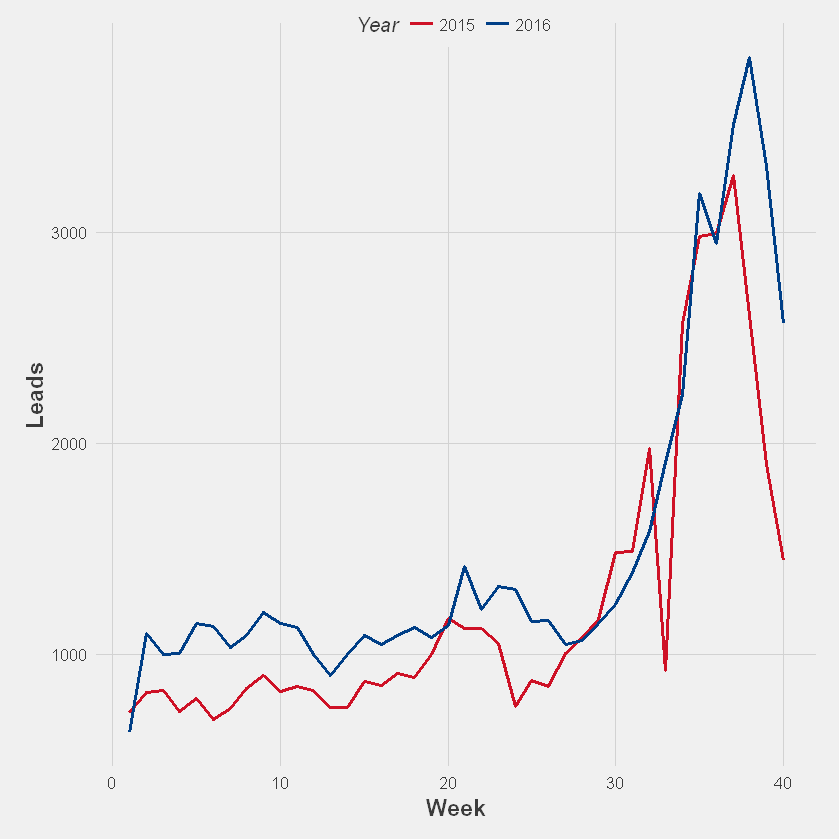

'data.frame':	420 obs. of  9 variables:
 $ Metro     : Factor w/ 210 levels "Abilene","Albany",..: 131 131 98 98 55 55 84 84 40 40 ...
 $ Year      : Factor w/ 2 levels "2015","2016": 2 1 2 1 2 1 2 1 2 1 ...
 $ Sessions  : int  50100 23763 41315 17723 30792 16238 30688 14923 30358 16746 ...
 $ PctNew    : num  0.759 0.818 0.751 0.819 0.719 ...
 $ NewUsers  : int  38032 19449 31039 14517 22127 12486 23330 11980 22774 13435 ...
 $ BounceRate: num  0.206 0.437 0.199 0.443 0.194 ...
 $ PagesPer  : num  4.4 2.8 4.37 2.72 4.36 ...
 $ Duration  : num  330 403 366 367 391 ...
 $ Leads     : int  3980 3131 3475 2583 2239 1696 2291 1952 1974 1636 ...


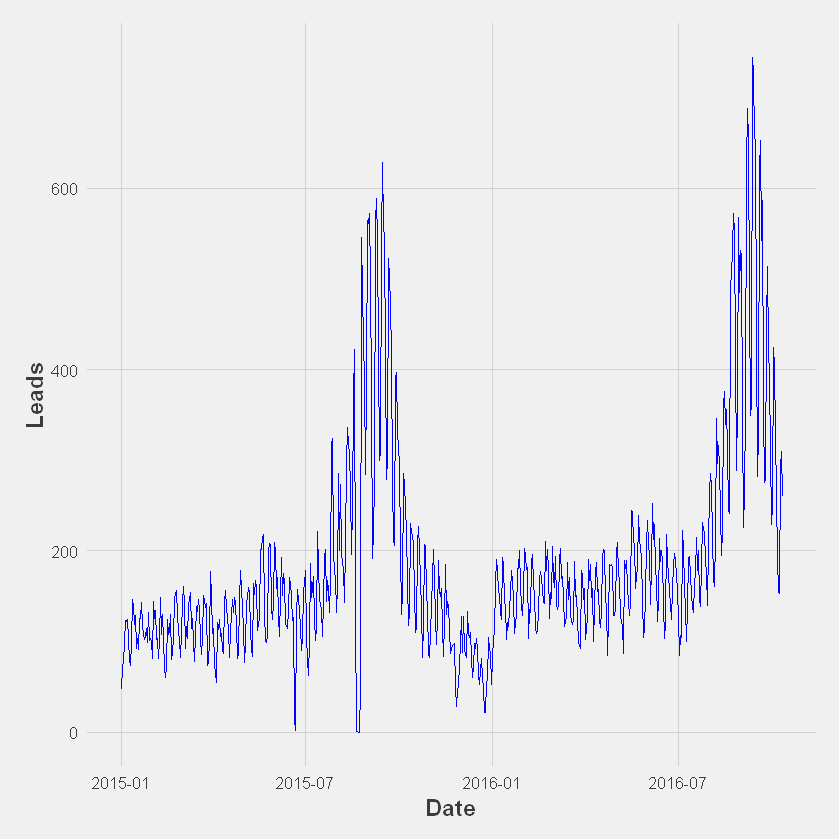

`geom_smooth()` using method = 'loess'


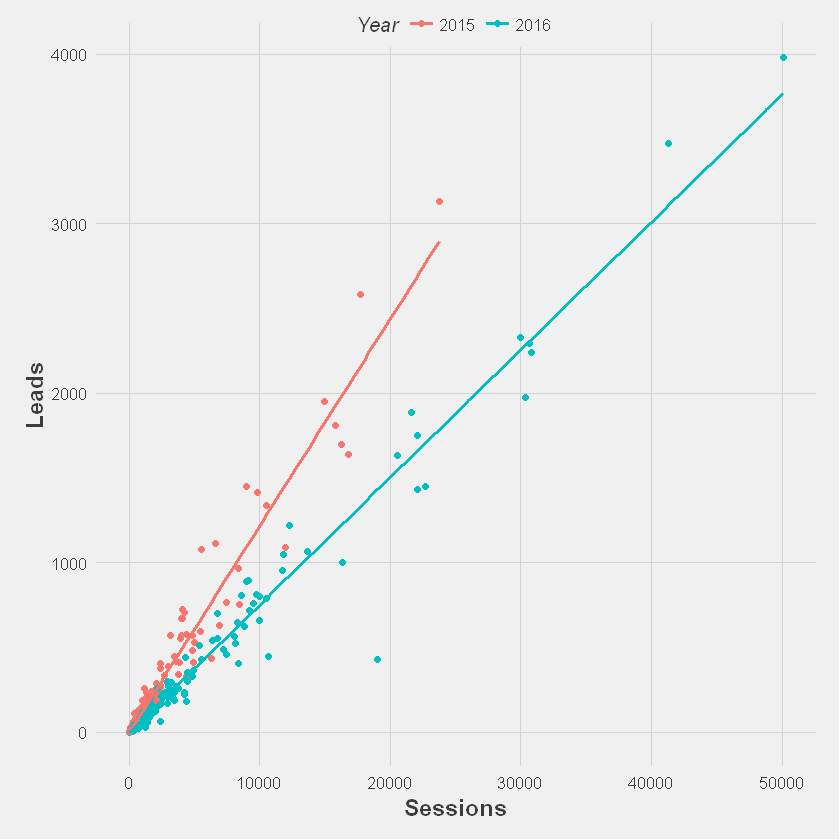

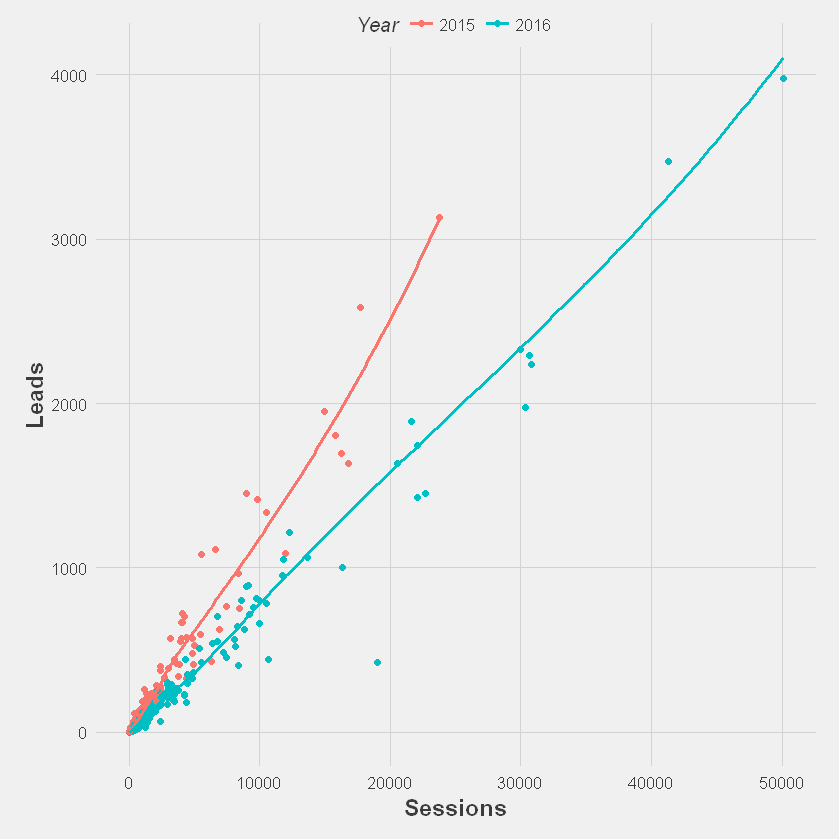

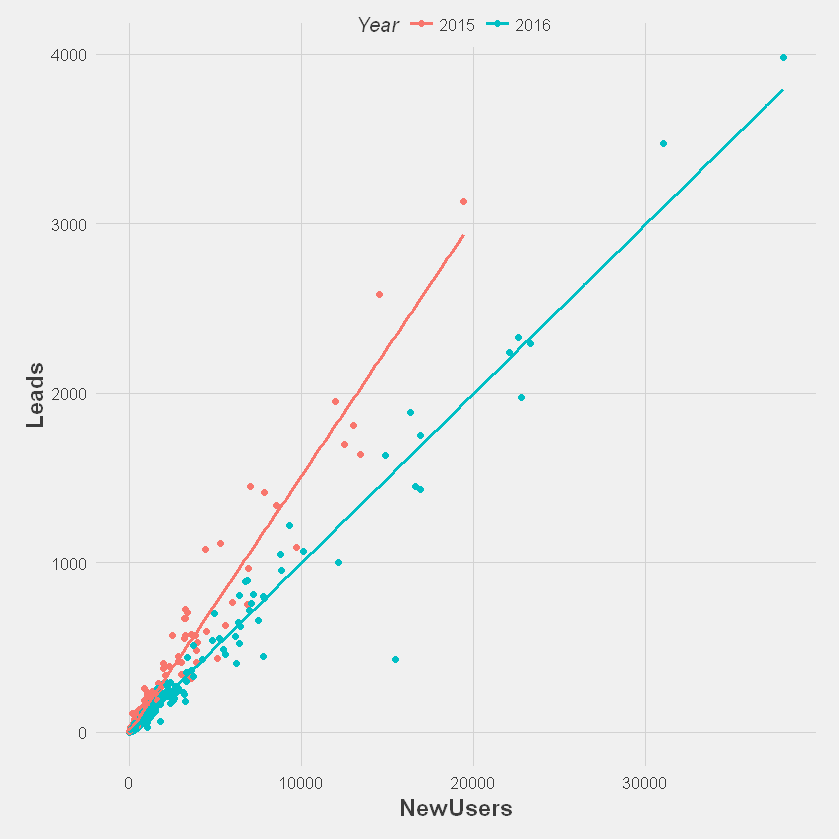

'data.frame':	44 obs. of  7 variables:
 $ Year    : Factor w/ 2 levels "2015","2016": 2 2 2 2 2 2 2 2 2 2 ...
 $ Sessions: int  8140 10490 22061 4226 9993 2586 16313 2364 6740 30688 ...
 $ Leads   : int  523 786 1429 231 661 227 1000 64 551 2291 ...
 $ New     : int  6405 7846 16944 3169 7521 2002 12150 1778 5223 23330 ...
 $ Bounces : int  1443 2370 4555 713 2060 501 3238 492 1278 4794 ...
 $ Pages   : int  34075 44128 92518 17885 42260 11153 65094 9590 28965 127329 ...
 $ ToT     : int  2477964 3260169 6319567 1160070 2928280 722948 5735719 658920 1746533 9543525 ...


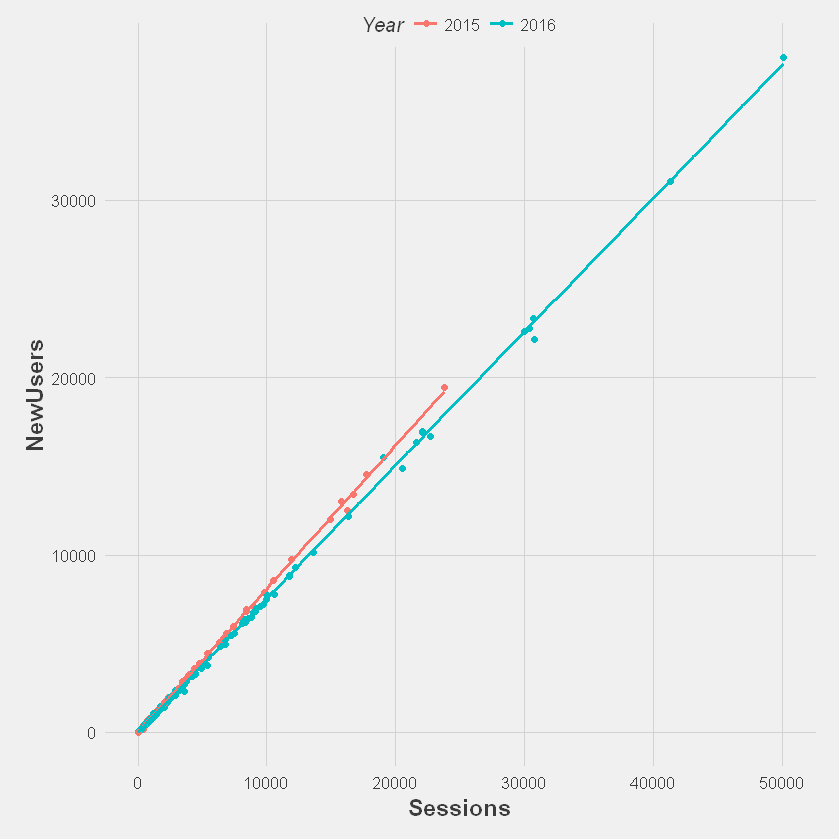

`geom_smooth()` using method = 'loess'


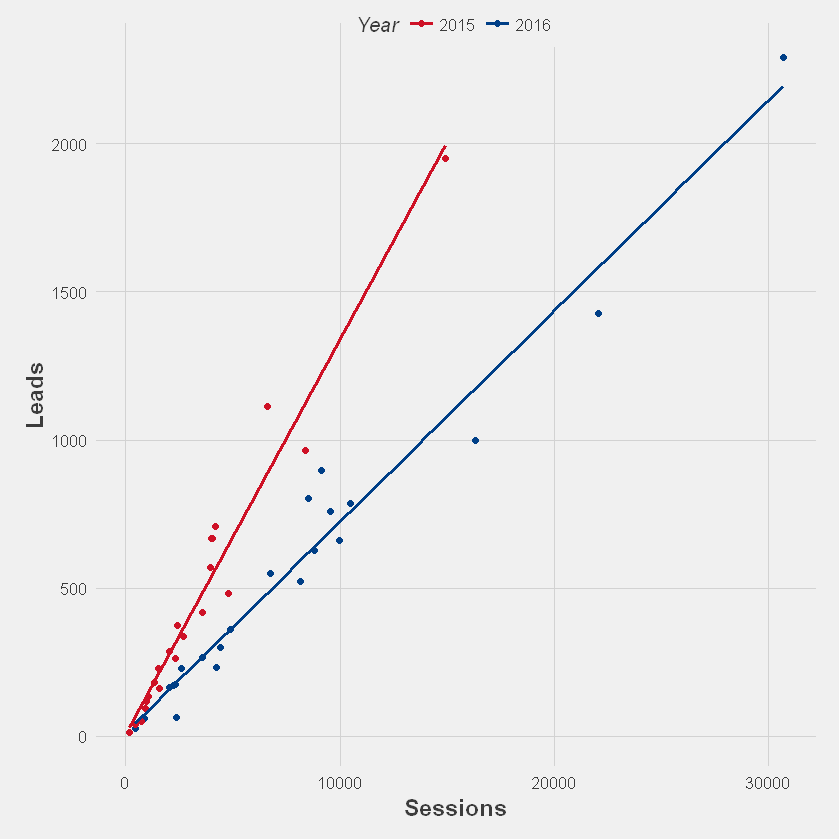

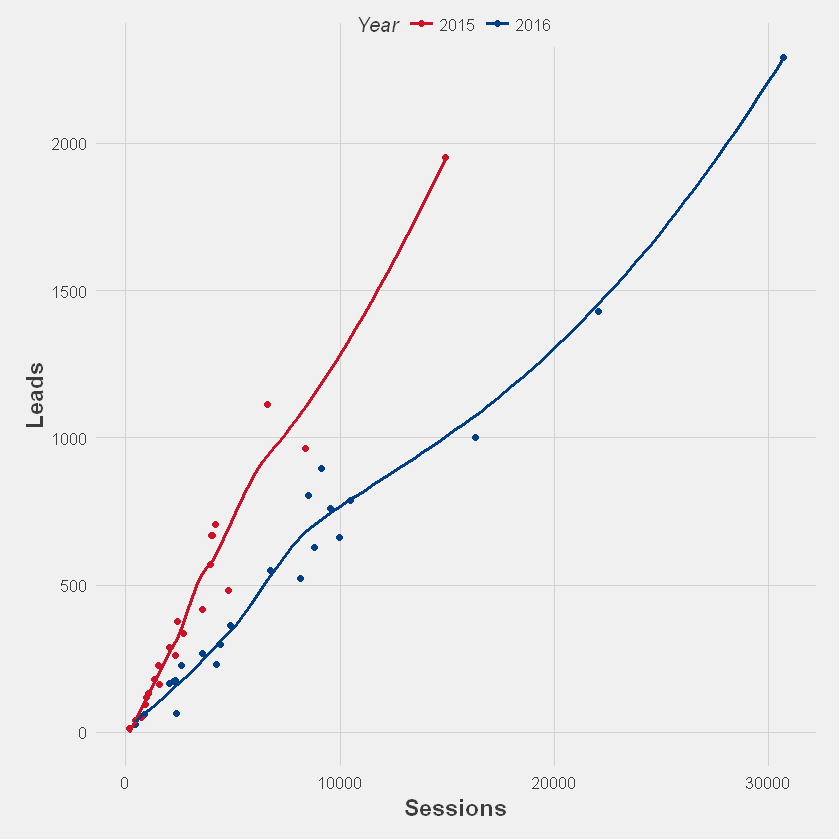

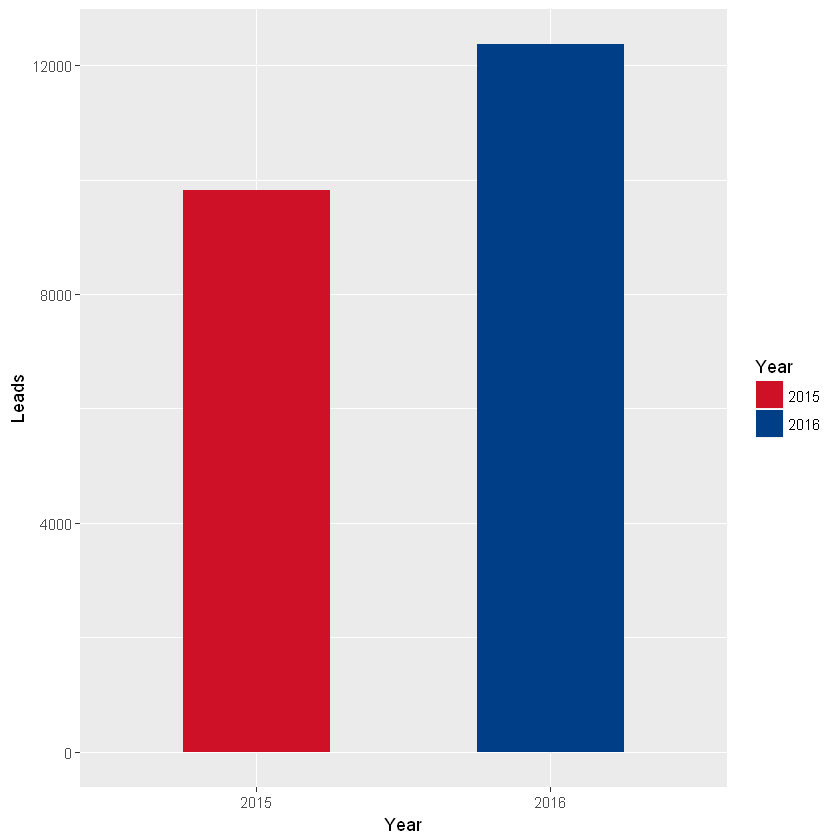

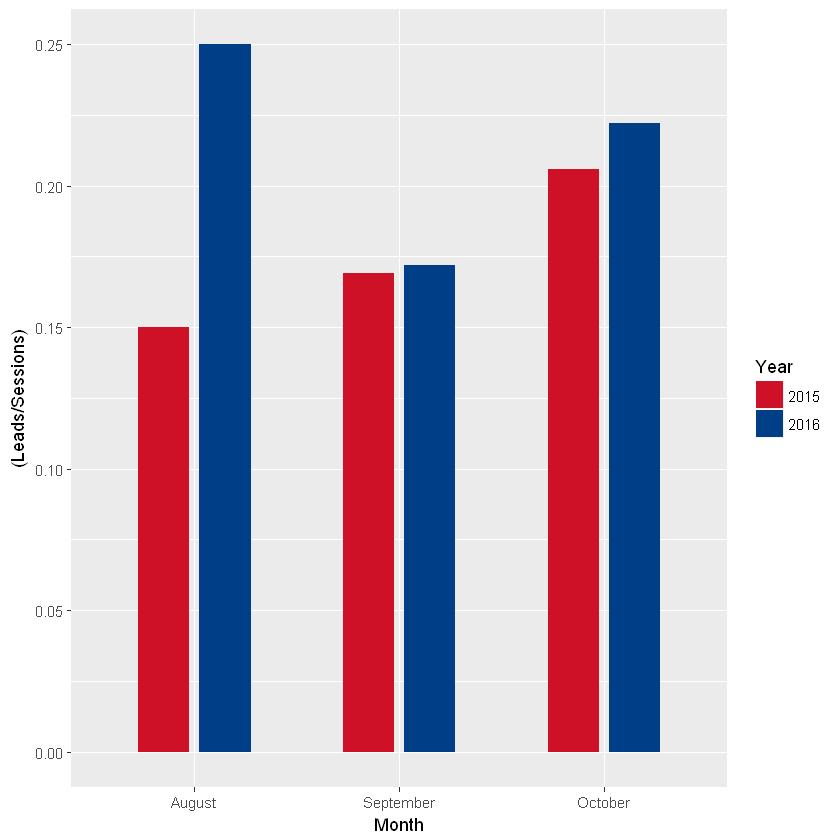

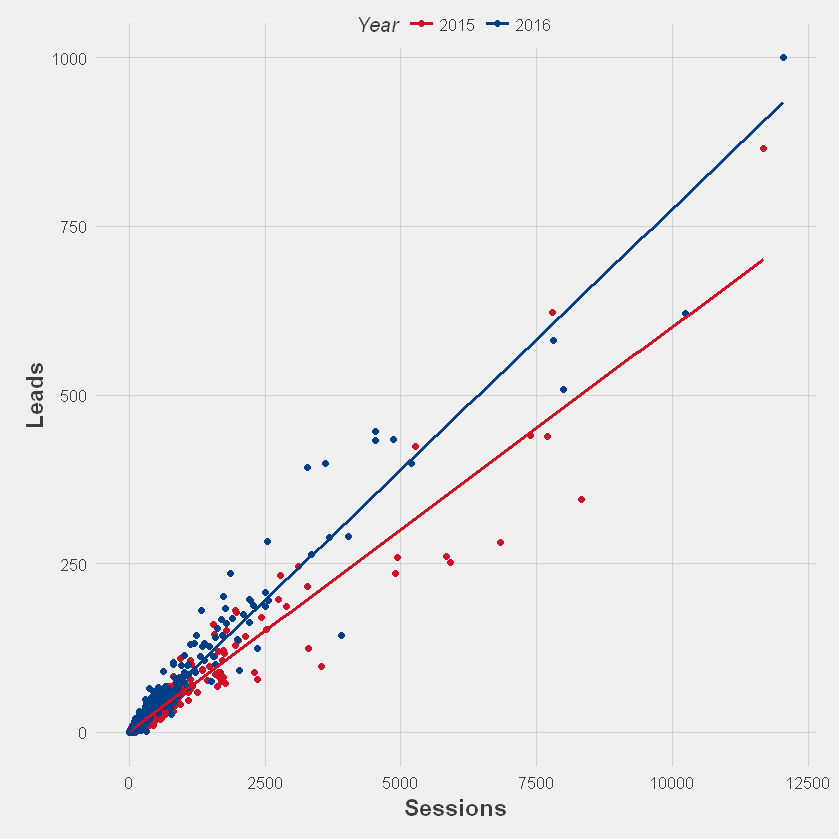

In [33]:
library(ggplot2)
library(ggthemes)

#look at leads, summed by week of the year, compared 2015 vs 2016
weeks2 <- read.csv("D:\\R_Projects\\WeekYoY.csv")  
weeks2$Year <- as.factor(weeks2$Year)  
  
w2Plot <- ggplot(weeks2, aes(x=Week, y=Leads, col=Year))+geom_line(size = 1)+ scale_color_manual(values=BSA_2Color)
w2Plot + theme_fivethirtyeight()+ theme(legend.position = c(0.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))


#Looking just at the leads generated per each day of the year
days <- read.csv("D:\\R_Projects\\leadsByDay.csv")
colnames(days) <- c("Date","Leads")
head(days)
days$Date <- as.Date(days$Date, format = "%m/%d/%Y")
str(days)

dayPlot <- ggplot(days, aes(x=Date, y=Leads))
dayPlot + theme_fivethirtyeight()+geom_line(size=.5, col = "blue")+ theme(legend.position = c(0.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))


#Look at each different category provided by GA
master <- read.csv("D:\\R_Projects\\MasterDataFile2.csv")
master$Year <- as.factor(master$Year)
str(master)

#sessions on X, leads generated on Y
sesPlot <- ggplot(master, aes(x=Sessions, y=Leads, col=Year))
sesPlot + geom_point()+geom_smooth(method = "lm", se=F, fullrange = F) + theme_fivethirtyeight() + theme(legend.position = c(0.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))
sesPlot + geom_point()+geom_smooth(se=F, fullrange = F) + theme_fivethirtyeight() + theme(legend.position = c(0.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))

#New Users on X, leads generated on Y
newPlot <- ggplot(master, aes(x=NewUsers, y=Leads, col=Year))
newPlot  + geom_point()+geom_smooth(method = "lm", se=F, fullrange = F) + theme_fivethirtyeight() + theme(legend.position = c(0.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))

#sessions on X, new users on Y
snPlot <- ggplot(master, aes(x=Sessions, y=NewUsers, col=Year))
snPlot  + geom_point()+geom_smooth(method = "lm", se=F, fullrange = F) + theme_fivethirtyeight() + theme(legend.position = c(0.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))



adBuy <- read.csv("D:\\R_PRojects\\AdBuy.csv")
adBuy$Years <- as.factor(adBuy$Years)
colnames(adBuy) <- c("Year","Sessions","Leads","New","Bounces","Pages","ToT")

str(adBuy)

#change in sessions to leads
sesAd <- ggplot(adBuy, aes(x=Sessions, y=Leads, col=Year))
sesAd + geom_point()+geom_smooth(method = "lm", se=F, fullrange = F) + theme_fivethirtyeight() + theme(legend.position = c(.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))+ scale_color_manual(values=BSA_2Color)
sesAd + geom_point()+geom_smooth(se=F, fullrange = F) + theme_fivethirtyeight() + theme(legend.position = c(0.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))+ scale_color_manual(values=BSA_2Color)

#Bar Plot: Sessions by Year
myBlue <- "#377EB8"
posn.d <- position_dodge(0.9)

ses2 <- ggplot(adBuy, aes(x=Year, y= Leads, fill=Year))+geom_bar(stat="identity", width =.5)+ scale_fill_manual(values=BSA_2Color)
ses<- ses2 + theme_fivethirtyeight() + theme(legend.position = c(0.4,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))
ses2 #+ geom_errorbar(aes(ymin = mean(Leads) - sd(Leads), ymax = mean(Leads) + sd(Leads)), width = 0.1, size = 2)
  

#Errorbars: stat_summary(fun.y = mean, geom = "bar") +stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1)


# BSA Red and Blue + scale_color_manual(values=c("#003F87", "#CE1126"))
# + scale_color_manual(values=BSA_2Color)
BSA_Red <- "#CE1126"
BSA_Blue <- "#003F87"
BSA_Yellow <- "#FCD116"
BSA_Green <- "#006B3F"
BSA_2Color <- c(BSA_Red,BSA_Blue)
Cub_2Color <- c(BSA_Yellow,BSA_Blue)


geoMonth <- read.csv("D:\\R_PRojects\\GeoLeadsMonthIndex.csv")
colnames(geoMonth) <- c("Month","Sessions","Leads")
geoMonth$Month <- as.factor(geoMonth$Month)
geoMonth2 <- read.csv("D:\\R_PRojects\\GeoLeadsMonthIndex2.csv")
geoMonth2$Month <- as.factor(geoMonth2$Month)
geoMonth2$Year <- as.factor(geoMonth2$Year)

posn.d <- position_dodge(0.6)

gm <- ggplot(geoMonth2, aes(x=Month, y=(Leads/Sessions), fill=Year))+geom_bar(stat="identity",width=.5, position=posn.d)+ scale_fill_manual(values=BSA_2Color)
gm + scale_x_discrete(limits=c("August","September","October"))

gm2 <- ggplot(geoMonth2, aes(x=Sessions, y=Leads, col=Year))
gm2<- gm2 + geom_point()+geom_smooth(method = "lm", se=F, fullrange = F) + theme_fivethirtyeight() + theme(legend.position = c(0.5,1), legend.title = element_text(face = "italic", size = 12), axis.title = element_text(face = "bold", size = 14))
gm2+ scale_color_manual(values=BSA_2Color)


In [19]:
#Scouting.org Search Words Data Import & Word Map Creation
words <- read.csv("D:\\R_Projects\\SearchWords2.csv")

#inspect
head(words)
str(words)
#myStops <- stopwords()
#myStops %in% words$SearchTerms

#library(RXKCD)
#library(tm)
library(wordcloud)
library(RColorBrewer)
library(data.table)

pal <- brewer.pal(8, "Dark2")
pal <- pal[-(1:2)]

png("D:\\R_Projects\\Wordcloud.png", width=1280,height=800)
wordcloud(words=words$SearchTerms,freq=words$Iterations,scale=c(8,.3), max.words = 350, random.order=T, rot.per=.2, colors=pal)
dev.off()


metros <- read.csv("D:\\R_Projects\\ByMetro.csv")

pal <- brewer.pal(8, "Dark2")
pal <- pal[-(1:2)]

png("D:\\R_Projects\\Wordcloud.png", width=800,height=800)
wordcloud(words=metros$Metro,freq=metros$Leads,scale=c(8,.3), max.words = 209, random.order=F, rot.per=0, colors=pal)
dev.off()

SearchTerms,Iterations
MERIT,81100
EAGLE,69098
SCOUT,66053
BADGE,58200
FORM,42111
FORMS,37866


'data.frame':	1000 obs. of  2 variables:
 $ SearchTerms: Factor w/ 1000 levels "1ST","2ND","512-728",..: 541 288 795 78 351 352 79 531 172 242 ...
 $ Iterations : int  81100 69098 66053 58200 42111 37866 32350 31771 26425 23987 ...


png 
  2

png 
  2

In [ ]:
library(timeSeries)
library(forecast)
library(urca)


pdata <- read.csv('Patient_Satisfaction_Time_Series.csv')
myts <- ts(pdata$NPER.Score, start = c(2009,7), end = c(2016,10),freq = 12)
holdout = ts(myts, start = c(2009,7), end = c(2016,6), freq = 12)

loop_data <- read.csv('df_loop.csv')
x=2
#SARIMA(p,d,q)x(P,D,Q)
for(D in 0:1){
  for(d in 0:1){
    for(Q in 0:1){
      for(P in 0:1){
        for(q in 0:1){
          for(p in 0:1){
            loop_data[x,1]<- p
            loop_data[x,2]<- d
            loop_data[x,3]<- q
            loop_data[x,4]<- P
            loop_data[x,5]<- D
            loop_data[x,6]<- Q
            model<- try(Arima(holdout,order=c(p,d,q),seasonal=c(P,D,Q),method="ML"), silent=TRUE)
            loop_data[x,7]<- model$aic
            loop_data[x,8]<- model$bic
            #loop_data[x,9]<-try(Box.test((Arima(holdout,order=c(p,d,q),seasonal=c(P,D,Q)))$residuals,lag=20, type = "Ljung-Box")$p.value, silent=TRUE)
            loop_data[x,9] <- Box.test(model$residuals, lag=20, type="Ljung-Box")$p.val
            x<- x+1
          }
        }
      }
    }
  }
}

write.csv(loop_data, file="Completed_Loop2.csv")


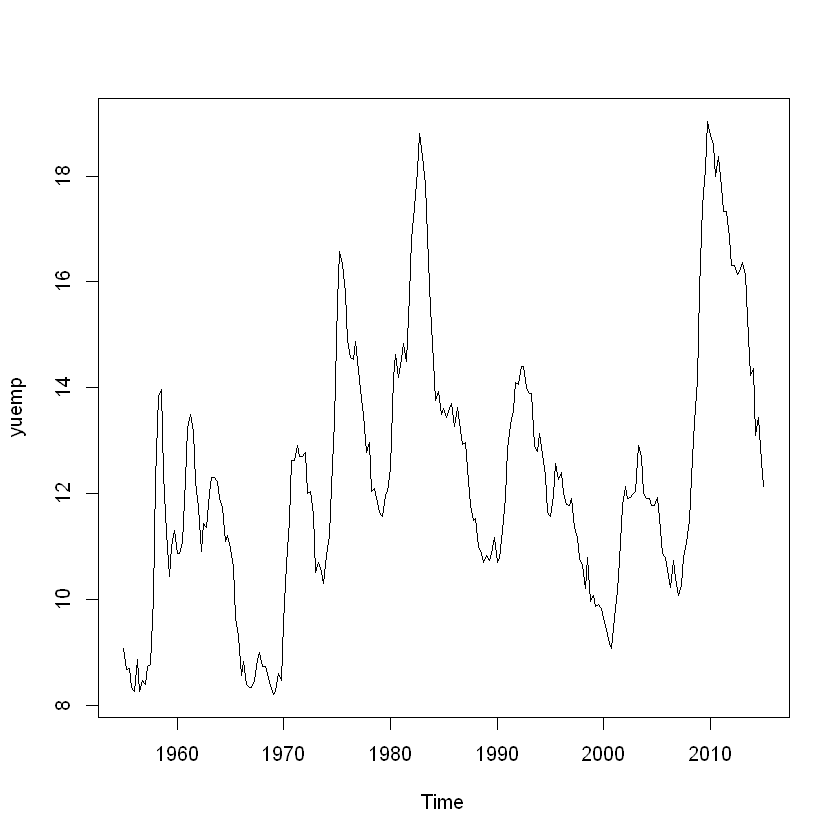

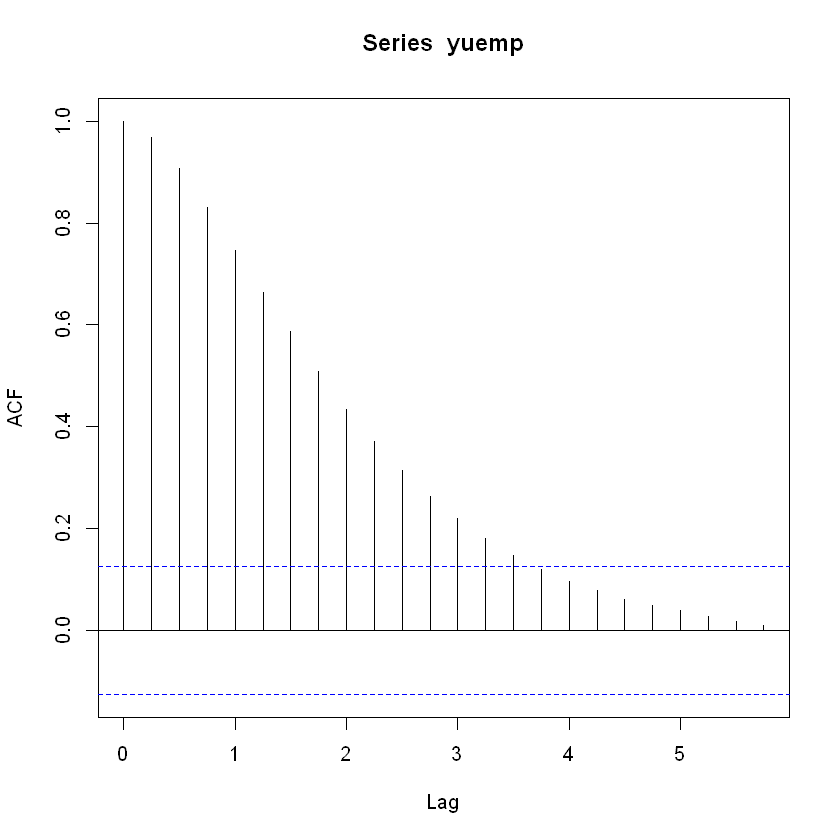

Series: yuemp 
ARIMA(2,0,0)           with non-zero mean 

Coefficients:
         ar1      ar2     mean
      1.4555  -0.4991  12.1823
s.e.  0.0556   0.0558   0.7282

sigma^2 estimated as 0.2666:  log likelihood=-182.89
AIC=373.78   AICc=373.95   BIC=387.71

Series: yuemp 
ARIMA(0,0,2)           with non-zero mean 

Coefficients:
         ma1     ma2     mean
      1.2973  0.7842  12.3101
s.e.  0.0536  0.0335   0.1866

sigma^2 estimated as 0.9016:  log likelihood=-329.3
AIC=666.6   AICc=666.76   BIC=680.53

Series: yuemp 
ARIMA(1,0,1)           with non-zero mean 

Coefficients:
         ar1     ma1     mean
      0.9551  0.3686  12.0784
s.e.  0.0184  0.0505   0.9789

sigma^2 estimated as 0.2942:  log likelihood=-194.6
AIC=397.2   AICc=397.37   BIC=411.14

Series: yuemp 
ARIMA(1,0,2)           with non-zero mean 

Coefficients:
         ar1     ma1     ma2     mean
      0.9401  0.3999  0.2702  12.1051
s.e.  0.0219  0.0679  0.0563   0.8749

sigma^2 estimated as 0.2719:  log likelihood=-184.7
AIC=379.4   AICc=379.66   BIC=396.83

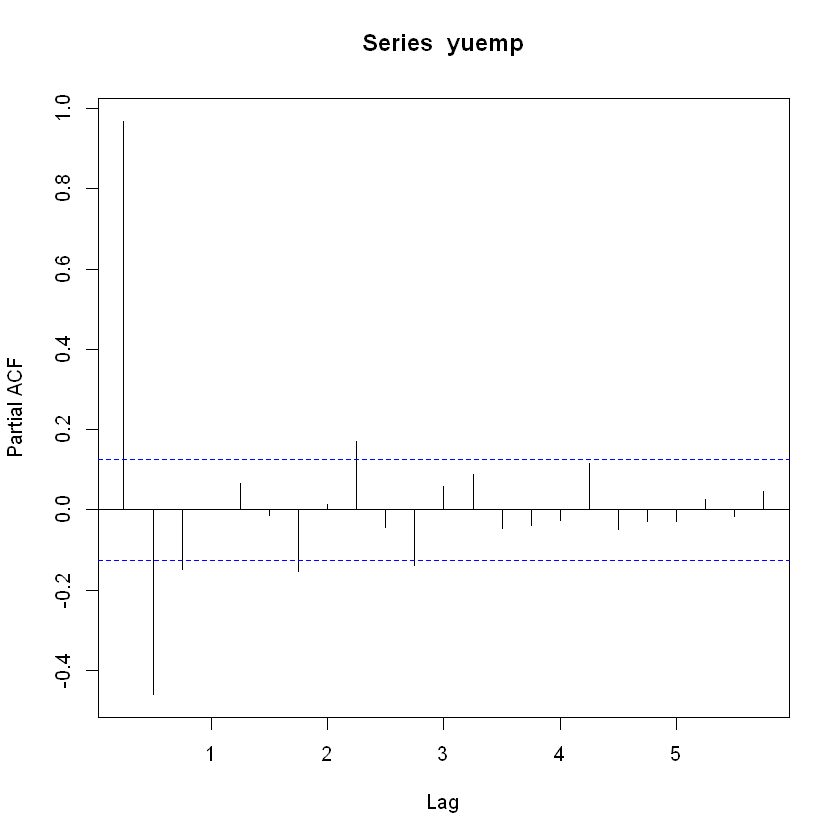

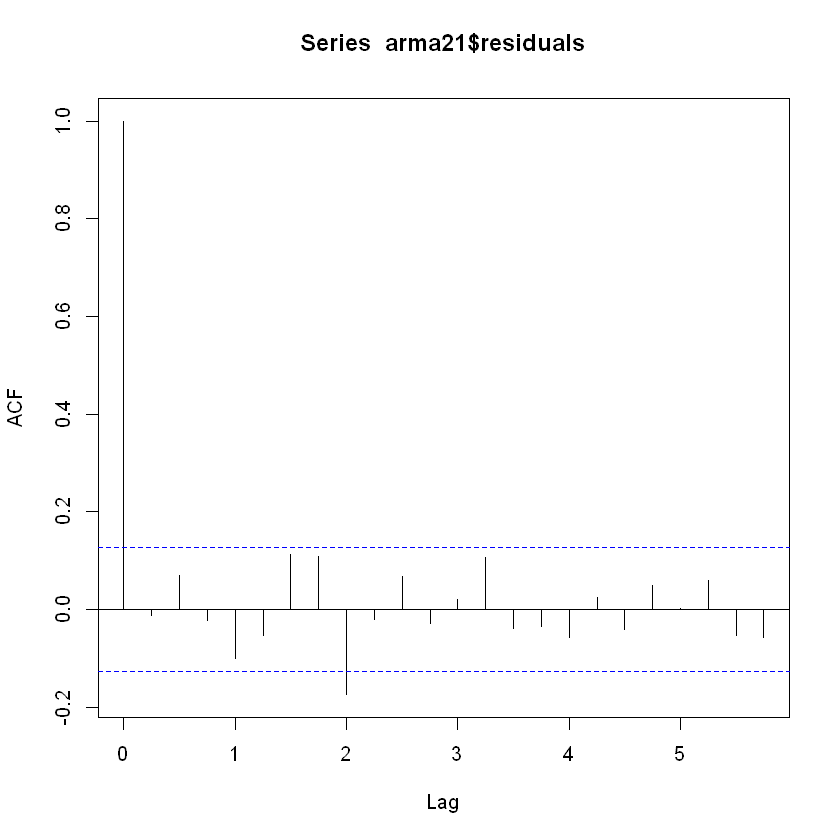

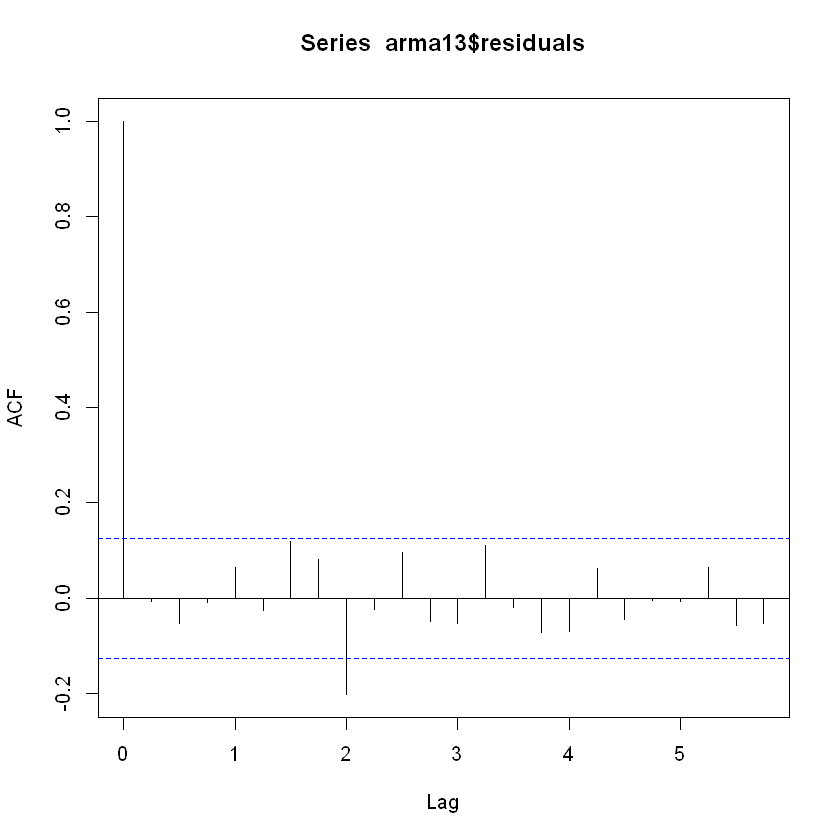

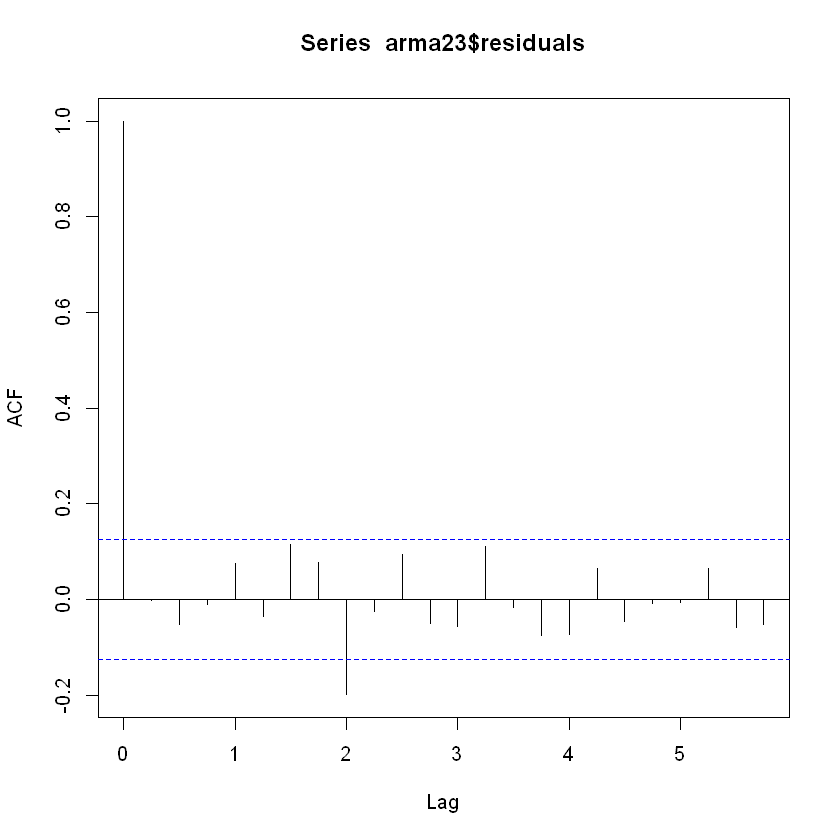


	Box-Ljung test

data:  arma21$residuals
X-squared = 28.155, df = 24, p-value = 0.2535



	Box-Ljung test

data:  arma21$residuals
X-squared = 25.58, df = 20, p-value = 0.1801



	Box-Ljung test

data:  arma13$residuals
X-squared = 31.235, df = 24, p-value = 0.1471



	Box-Ljung test

data:  arma13$residuals
X-squared = 28.501, df = 20, p-value = 0.09805



	Box-Ljung test

data:  arma23$residuals
X-squared = 31.571, df = 24, p-value = 0.138



	Box-Ljung test

data:  arma23$residuals
X-squared = 28.763, df = 20, p-value = 0.09253



	Box-Ljung test

data:  arma22$residuals
X-squared = 34.979, df = 24, p-value = 0.06872



	Box-Ljung test

data:  arma22$residuals
X-squared = 32.171, df = 20, p-value = 0.04151


ERROR: Error in eval(expr, envir, enclos): could not find function "forecast.Arima"


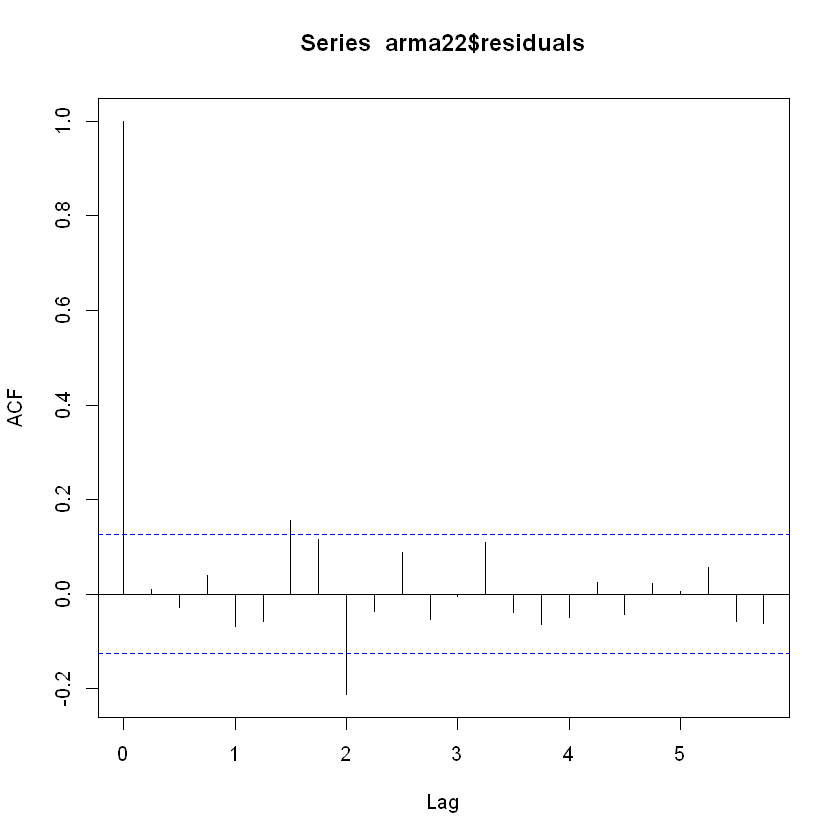

In [21]:

library(timeSeries)
library(forecast)

data <- read.csv("D:\\R_Projects\\pset3.csv")
yuemp = ts(data$Unemploy, start = c(1955,1), end = c(2015,1),freq = 4)
plot(yuemp)

acf(yuemp)

pacf(yuemp)


Arima(yuemp,order=c(2,0,0))

Arima(yuemp,order=c(0,0,2))

Arima(yuemp,order=c(1,0,1))

Arima(yuemp,order=c(1,0,2))

arma21 <- Arima(yuemp,order=c(2,0,1))

arma22<-Arima(yuemp,order=c(2,0,2))

arma23<-Arima(yuemp,order=c(2,0,3))

arma13 <- Arima(yuemp,order=c(1,0,3))


acf(arma21$residuals) 
acf(arma13$residuals) 
acf(arma23$residuals) 
acf(arma22$residuals)

Box.test(arma21$residuals,lag=24, type = "Ljung-Box")
Box.test(arma21$residuals,lag=20, type = "Ljung-Box")

Box.test(arma13$residuals,lag=24, type = "Ljung-Box")
Box.test(arma13$residuals,lag=20, type = "Ljung-Box")

Box.test(arma23$residuals,lag=24, type = "Ljung-Box")
Box.test(arma23$residuals,lag=20, type = "Ljung-Box")

Box.test(arma22$residuals,lag=24, type = "Ljung-Box")
Box.test(arma22$residuals,lag=20, type = "Ljung-Box")

forecast.Arima(arma22, h=7)
plot.forecast(forecast.Arima(arma22, h=7), include=250)
plot.forecast(forecast.Arima(arma22, h=7), include=20)


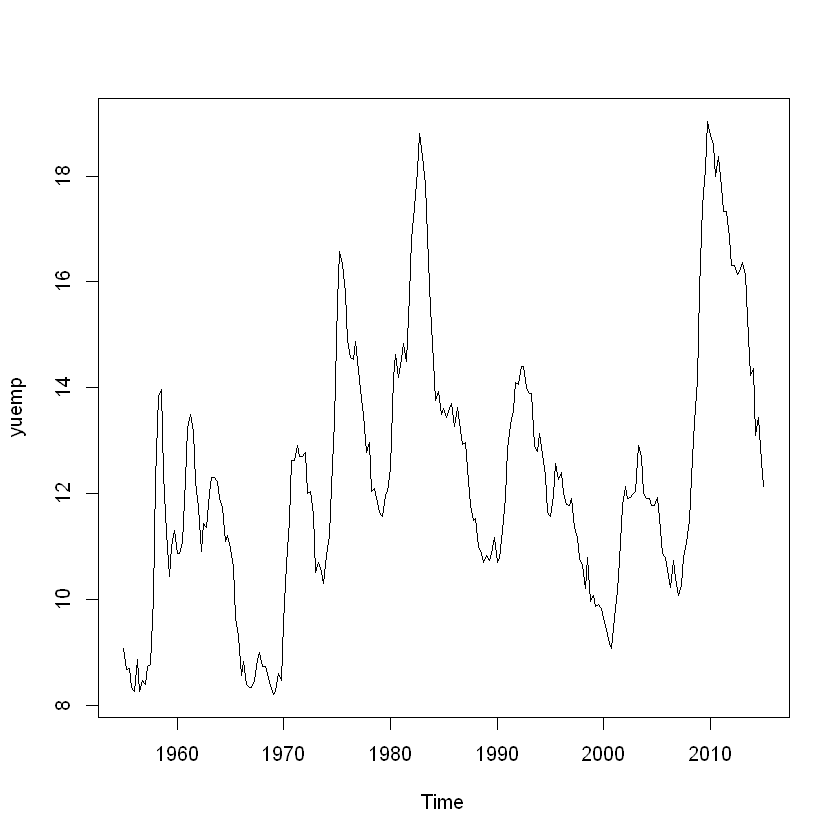

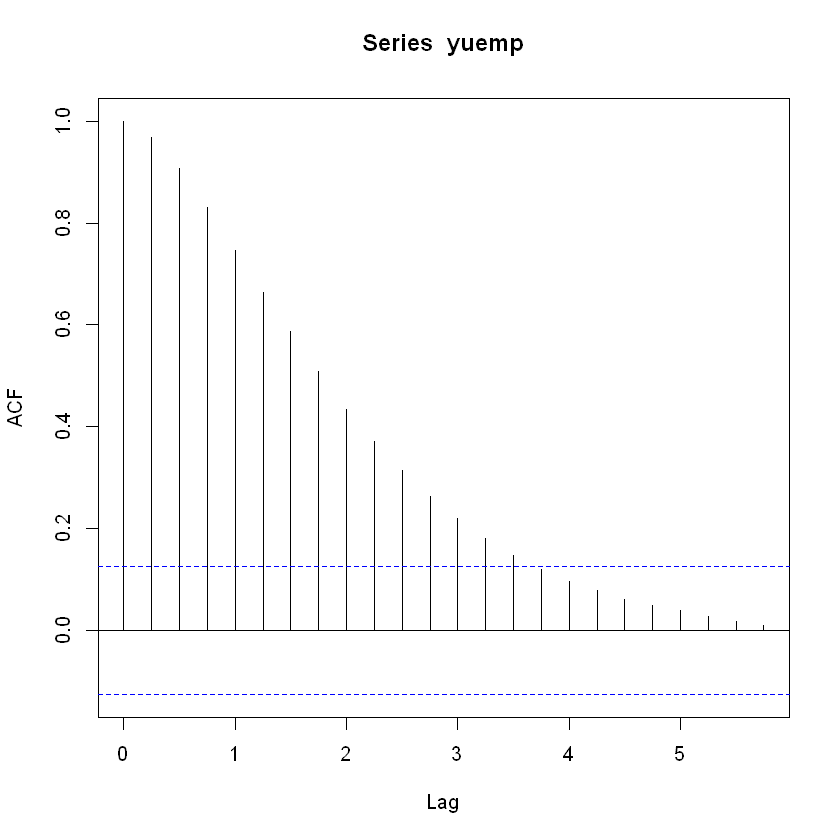


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.088721 -0.020745 -0.001633  0.019508  0.112502 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.359e-01  4.077e-02   3.333 0.001020 ** 
z.lag.1      -5.749e-02  1.688e-02  -3.406 0.000796 ***
tt            5.829e-05  4.239e-05   1.375 0.170645    
z.diff.lag1   3.181e-01  6.767e-02   4.701 4.78e-06 ***
z.diff.lag2   3.679e-01  7.029e-02   5.235 4.11e-07 ***
z.diff.lag3   7.146e-02  7.233e-02   0.988 0.324308    
z.diff.lag4  -1.692e-01  7.264e-02  -2.329 0.020865 *  
z.diff.lag5  -8.470e-02  7.245e-02  -1.169 0.243736    
z.diff.lag6   2.085e-01  7.270e-02   2.867 0.004575 ** 
z.diff.lag7   1.211e-01  7.162e-02   1.691 0.092440 .  
z.diff.lag8  -2.063e-0

Series: yuemp 
ARIMA(2,0,0)           with non-zero mean 

Coefficients:
         ar1      ar2     mean
      1.4555  -0.4991  12.1823
s.e.  0.0556   0.0558   0.7282

sigma^2 estimated as 0.2666:  log likelihood=-182.89
AIC=373.78   AICc=373.95   BIC=387.71

Series: yuemp 
ARIMA(0,0,2)           with non-zero mean 

Coefficients:
         ma1     ma2     mean
      1.2973  0.7842  12.3101
s.e.  0.0536  0.0335   0.1866

sigma^2 estimated as 0.9016:  log likelihood=-329.3
AIC=666.6   AICc=666.76   BIC=680.53

Series: yuemp 
ARIMA(1,0,1)           with non-zero mean 

Coefficients:
         ar1     ma1     mean
      0.9551  0.3686  12.0784
s.e.  0.0184  0.0505   0.9789

sigma^2 estimated as 0.2942:  log likelihood=-194.6
AIC=397.2   AICc=397.37   BIC=411.14

Series: yuemp 
ARIMA(1,0,2)           with non-zero mean 

Coefficients:
         ar1     ma1     ma2     mean
      0.9401  0.3999  0.2702  12.1051
s.e.  0.0219  0.0679  0.0563   0.8749

sigma^2 estimated as 0.2719:  log likelihood=-184.7
AIC=379.4   AICc=379.66   BIC=396.83

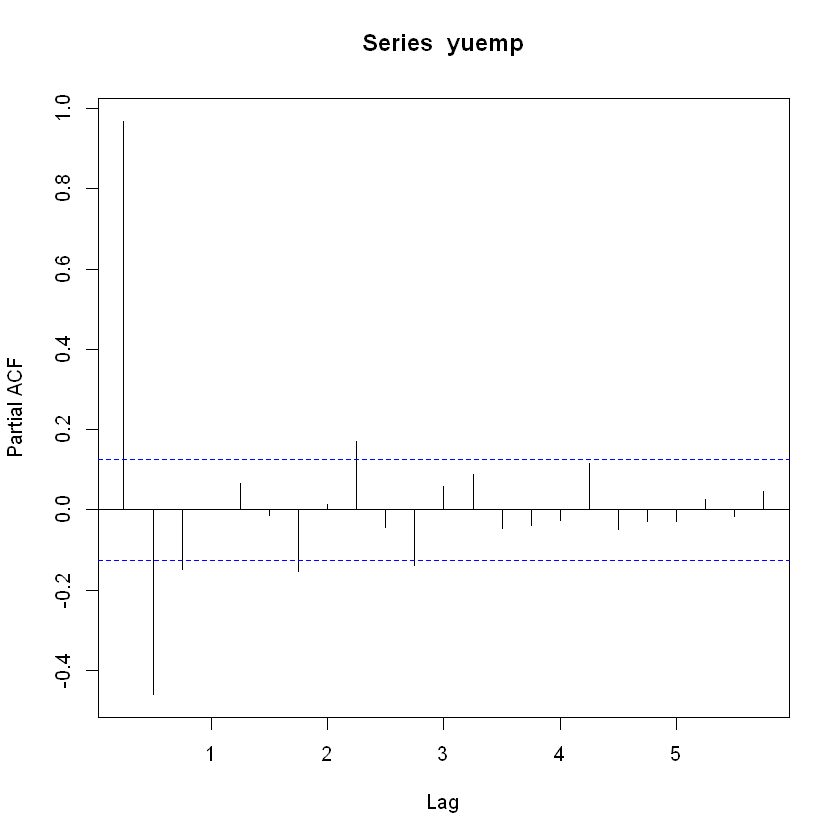

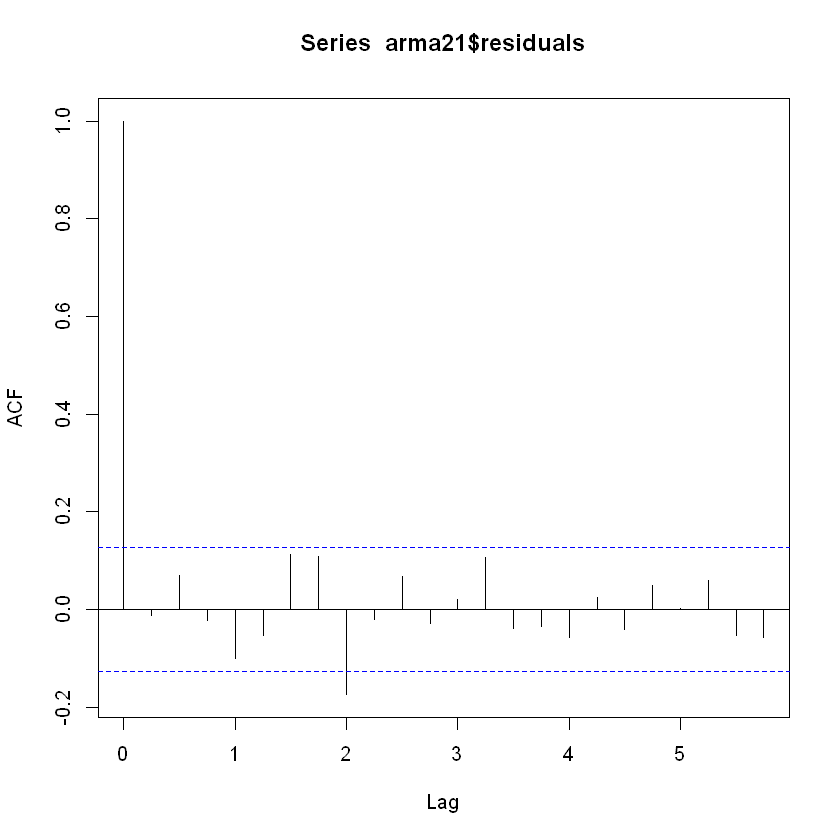

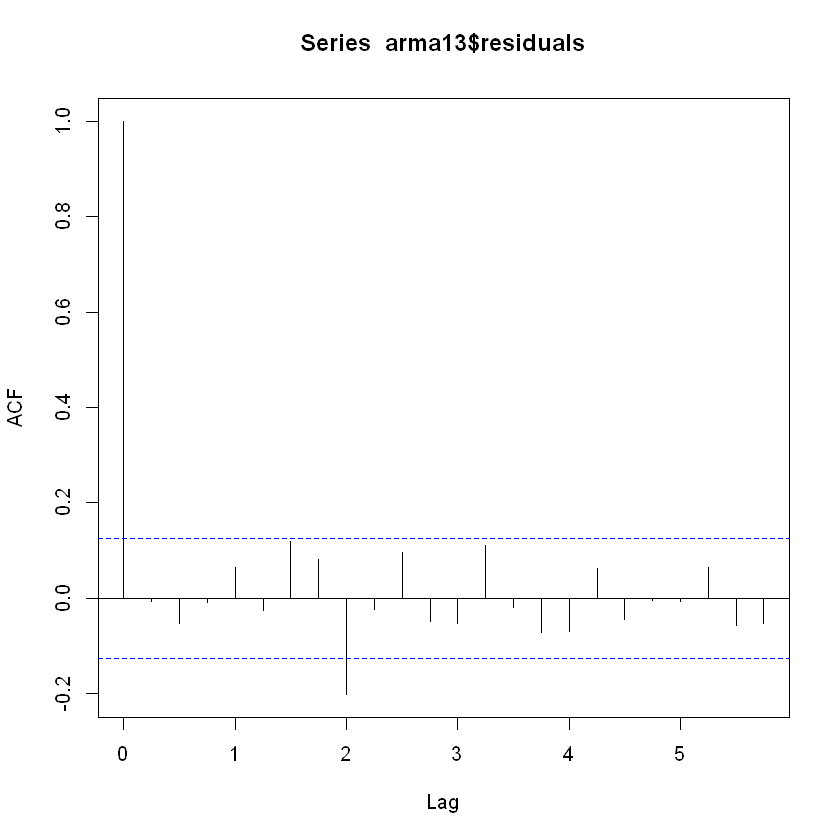

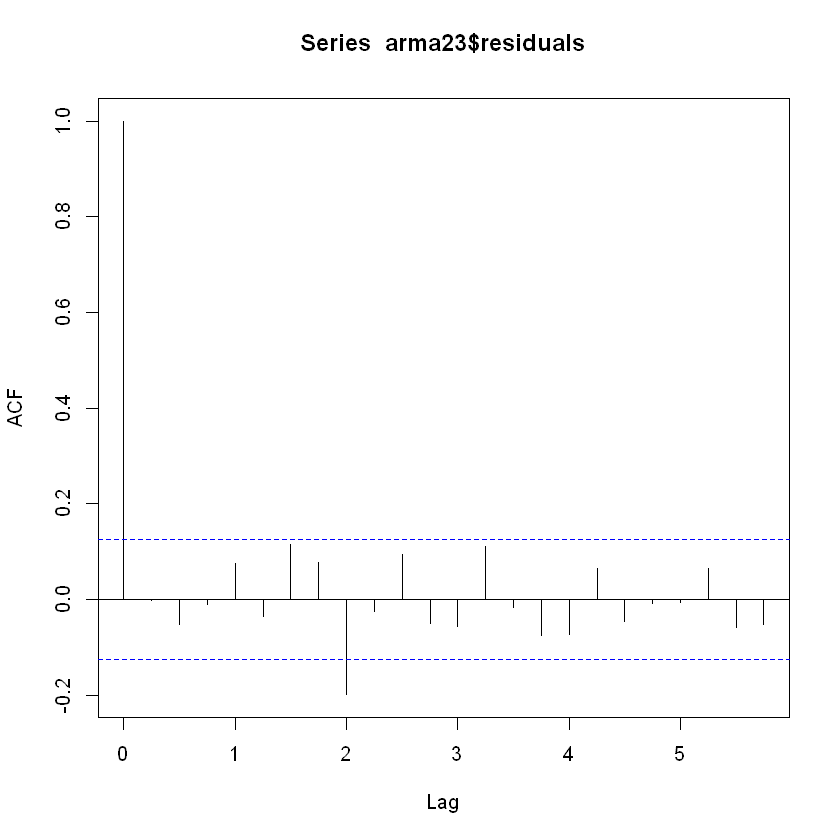


	Box-Ljung test

data:  arma21$residuals
X-squared = 28.155, df = 24, p-value = 0.2535



	Box-Ljung test

data:  arma21$residuals
X-squared = 25.58, df = 20, p-value = 0.1801



	Box-Ljung test

data:  arma13$residuals
X-squared = 31.235, df = 24, p-value = 0.1471



	Box-Ljung test

data:  arma13$residuals
X-squared = 28.501, df = 20, p-value = 0.09805



	Box-Ljung test

data:  arma23$residuals
X-squared = 31.571, df = 24, p-value = 0.138



	Box-Ljung test

data:  arma23$residuals
X-squared = 28.763, df = 20, p-value = 0.09253



	Box-Ljung test

data:  arma22$residuals
X-squared = 34.979, df = 24, p-value = 0.06872



	Box-Ljung test

data:  arma22$residuals
X-squared = 32.171, df = 20, p-value = 0.04151


ERROR: Error in eval(expr, envir, enclos): could not find function "forecast.Arima"


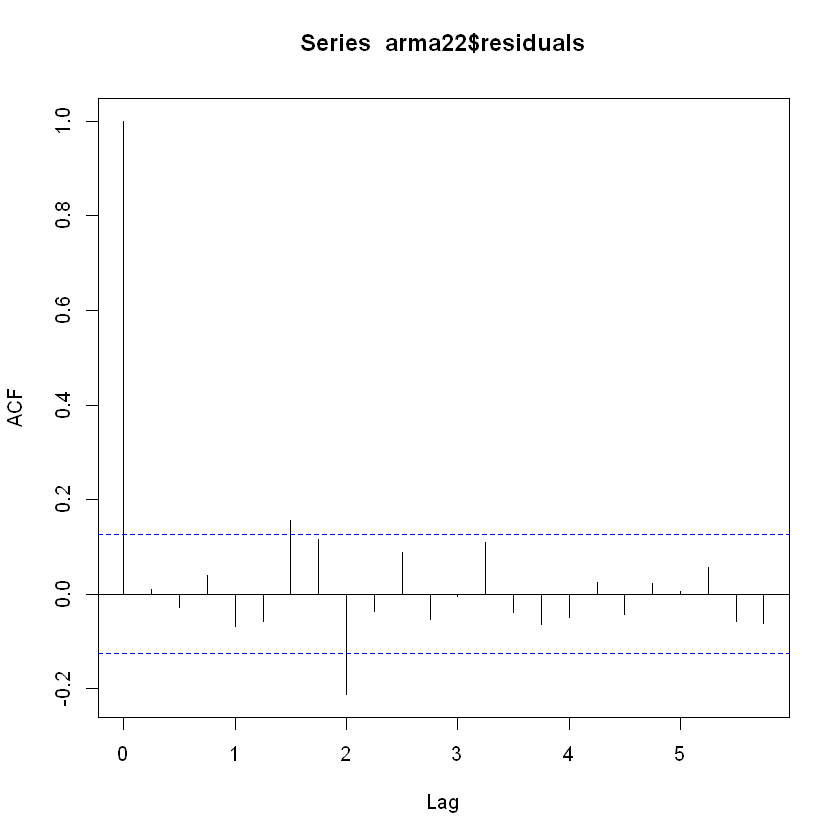

In [23]:


library(timeSeries)
library(forecast)
library(urca)

#A
data <- read.csv("D:\\R_Projects\\pset3.csv")
yuemp = ts(data$Unemploy, start = c(1955,1), end = c(2015,1),freq = 4)
plot(yuemp)

#B
acf(yuemp)
#ignore the value at lag 0
#We see multiple statistically significant, positive autocorrelation coeficients, that are moving towards 0
#in theory, an AR(2) has an ACF that only approaches 0 in the limit, so this support the hypothesis of this
#being an AR(2) model

pacf(yuemp)
#shows 2 clearly statistically significant partial autocorrelation coeficients at lag 1 & 2 and
#four potentially significant pacf at 3, 7, 9 and 11 

#for seasonally adjusted data, odd pacf's on the adjusted range could signal a poor seasonal adjustment.  

#want to investigate AR(2) and MA(2).  Also going to check ARMA(1,2) and ARMA(2,2)

#if you think you are going to have too many lags, use BIC, too few lags, use AIC

#dickey fuller test
#Ho - unit root is present
#Ha - stationarity
myts_df_test = ur.df(log(yuemp), type = "trend", lags = 24, selectlags = "AIC")
summary(myts_df_test)
#p-value: 6.01e-14 - reject Ho, meaning we reject the null hypothesis and that the model is stationary


#AR(2)
Arima(yuemp,order=c(2,0,0)) #seasonal(1,0,0)
#AICc=373.95   BIC=387.71

#MA(2)
Arima(yuemp,order=c(0,0,2))
#AICc=666.76   BIC=680.53

#ARMA(1,1)
Arima(yuemp,order=c(1,0,1))
#AICc=397.37   BIC=411.14

#ARMA(1,2)
Arima(yuemp,order=c(1,0,2))
#AICc=379.66   BIC=396.83

#ARMA(2,1)
arma21 <- Arima(yuemp,order=c(2,0,1))
#AICc=371.45   BIC=388.62

#ARMA(2,2)
arma22<-Arima(yuemp,order=c(2,0,2))
#AICc=370.1   BIC=390.65

#ARMA(2,3)
arma23<-Arima(yuemp,order=c(2,0,3))
#AICc=364.78   BIC=388.69

#ARMA(1,3)
arma13 <- Arima(yuemp,order=c(1,0,3))
#AICc=362.8*   BIC=383.35*

acf(arma21$residuals) #one potentially statistically significant residual at lag 8
acf(arma13$residuals) #One potentially statistically significant residual at lag 8
acf(arma23$residuals) #One potentially statistically significant residual at lag 8
acf(arma22$residuals) #two potentailly statistically significant residuals at lags 6 & 8

Box.test(arma21$residuals,lag=24, type = "Ljung-Box")
#Ho = the first 24 AC coeficients are jointly =0 for the model residuals, Ha is the complement of the null
#X-squared = 28.155, df = 24, p-value = 0.2535
#pvalue => 25.35% of all chi2 random variables are less than test statistic ... need this to be below 5%, REJECT Ho
Box.test(arma21$residuals,lag=20, type = "Ljung-Box")
#X-squared = 25.58, df = 20, p-value = 0.1801

Box.test(arma13$residuals,lag=24, type = "Ljung-Box")
#Ho = the first 24 AC coeficients are jointly =0 for the model residuals, Ha is the complement of the null
#X-squared = 31.235, df = 24, p-value = 0.1471
#pvalue => 14.715% of all chi2 random variables are less than test statistic ... need this to be below 5%, REJECT Ho
Box.test(arma13$residuals,lag=20, type = "Ljung-Box")
#X-squared = 28.501, df = 20, p-value = 0.09805

Box.test(arma23$residuals,lag=24, type = "Ljung-Box")
#Ho = the first 24 AC coeficients are jointly =0 for the model residuals, Ha is the complement of the null
#X-squared = 31.571, df = 24, p-value = 0.138
#pvalue => 13.8% of all chi2 random variables are less than test statistic ... need this to be below 5%, REJECT Ho
Box.test(arma23$residuals,lag=20, type = "Ljung-Box")
#X-squared = 28.763, df = 20, p-value = 0.09253

Box.test(arma22$residuals,lag=24, type = "Ljung-Box")
#Ho = the first 24 AC coeficients are jointly =0 for the model residuals, Ha is the complement of the null
#X-squared = 34.979, df = 24, p-value = 0.06872
#pvalue => 6.872% of all chi2 random variables are less than test statistic ... need this to be below 5%, REJECT Ho
Box.test(arma22$residuals,lag=20, type = "Ljung-Box")
#X-squared = 32.171, df = 20, p-value = 0.04151
#this is the only model that, at 20 lags, would fail to reject Ho.  It is close to rejecting Ho at 24 lags.  

#Using ARMA(2,2) Model: Forcasting 7 Lags Ahead
forecast.Arima(arma22, h=7)
plot.forecast(forecast.Arima(arma22, h=7), include=250)
plot.forecast(forecast.Arima(arma22, h=7), include=20)



[1] 0.4934688

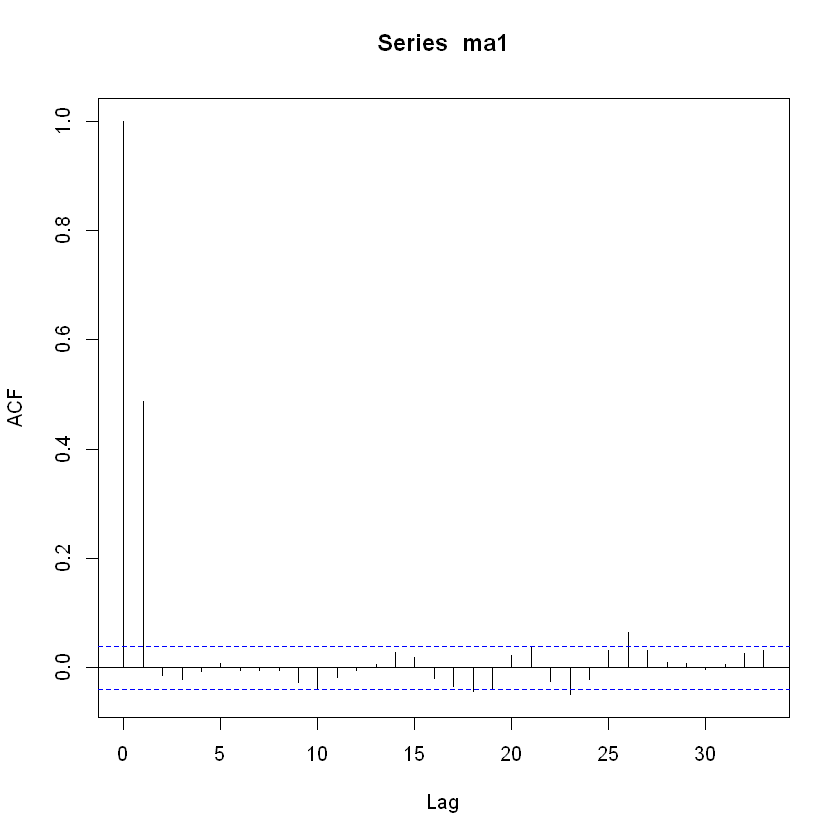

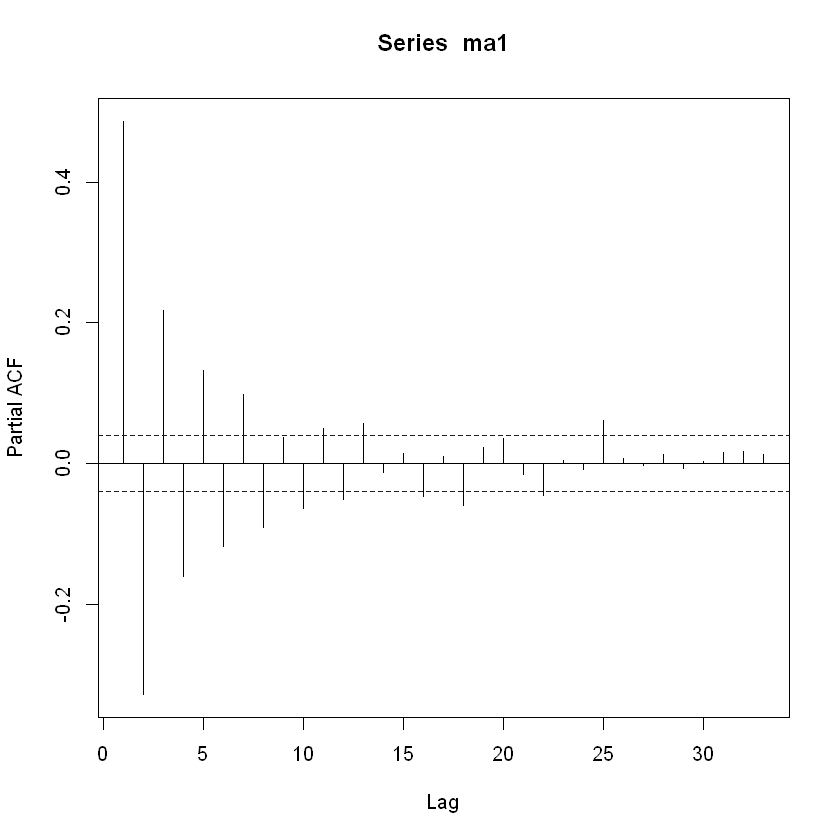

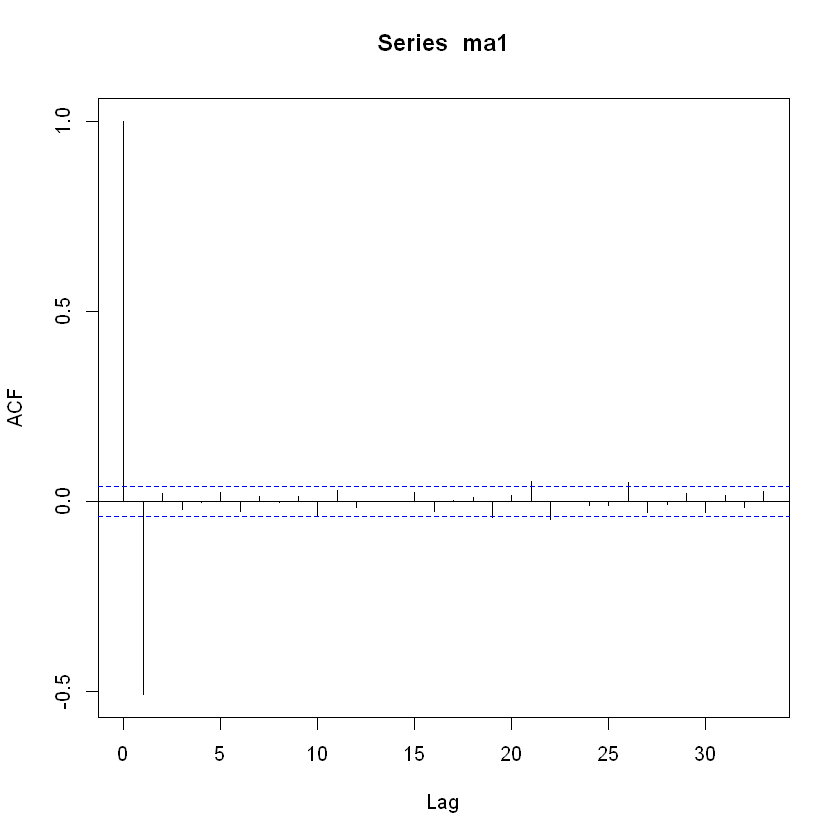

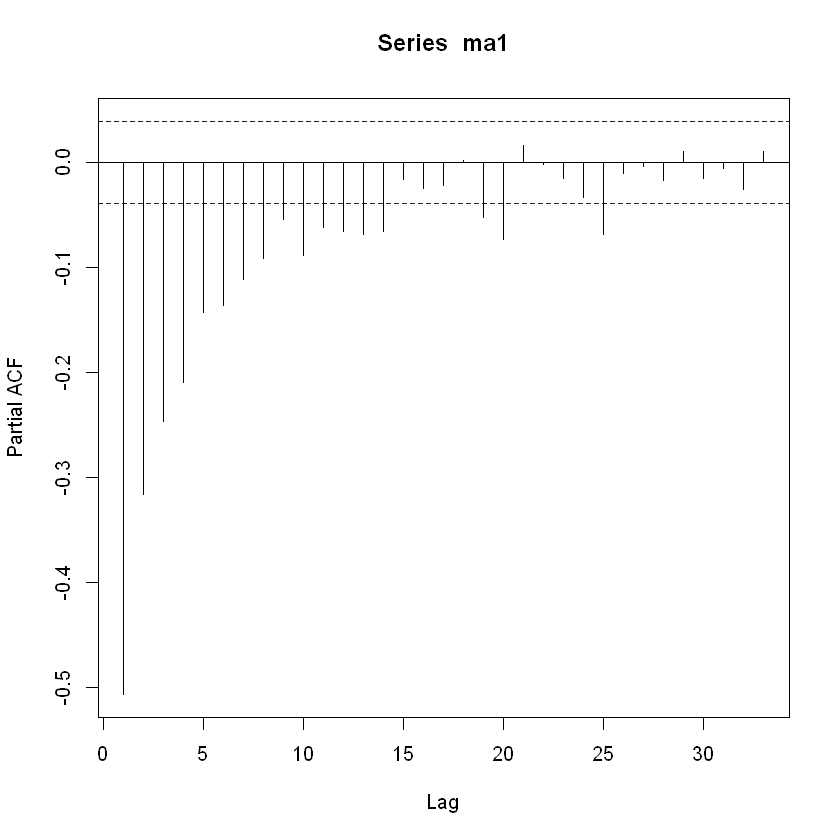

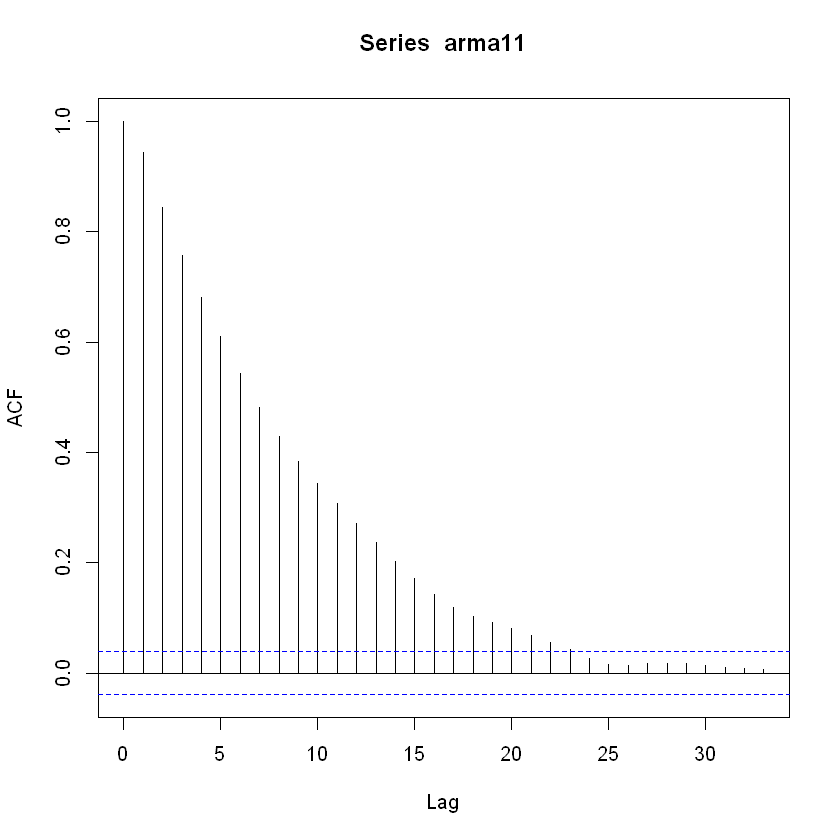

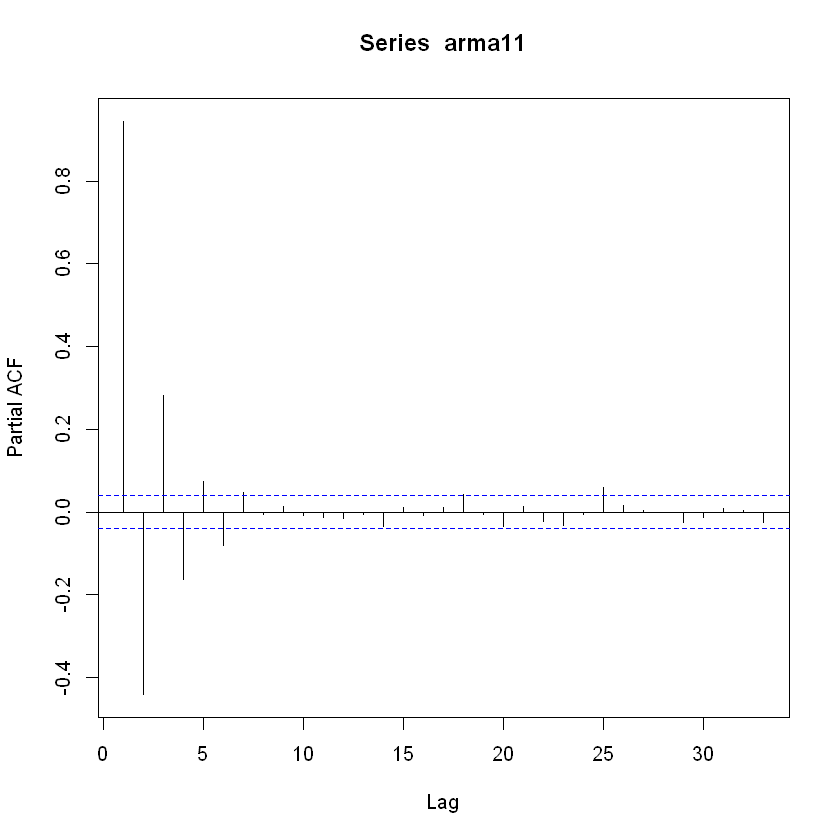

In [24]:
e <- rnorm(2500)

ma1= 0
#yt=et+theta*et-1
#y1=e1+theta*e0

for(t in 2:2500){
  ma1[t]=e[t]+0.85*e[t-1]
}

acf(ma1)
#the first spike on the graph should be equal to .85/(1+.85^2)
.85/(1+.85^2)

pacf(ma1)
#shows ocsilating values between positive and negative, approaching 0 in the limit
ma1=0
for(t in 2:2500){
  ma1[t] = e[t]-0.9*e[t-1]
}
acf(ma1)
pacf(ma1)

e <- rnorm(2500)
arma11= 0
for(t in 2:2500){
  arma11[t] = 0.9*arma11[t-1]+e[t]+0.65*e[t-1]
}
acf(arma11)
pacf(arma11)
#first lag creates a partial auto correlation value of nearly 0.9, after that it starts to look like an MA(1) 
#The first lag on the pacf shows a strong AR portion when k=1


            Qtr1        Qtr2        Qtr3        Qtr4
1960  8.81831677 -1.52698878  1.00154136 -4.87716513
1961  2.71687441  7.35864386  6.61607864  8.02455151
1962  7.14812279  4.28053865  3.78903608  1.54775359
1963  4.43408041  5.17456765  7.73933005  2.84738449
1964  8.55323809  4.73134856  5.39876970  1.40981450
1965  9.75262912  5.42579378  8.04807423  9.31605734
1966  9.76139979  1.63401248  2.84355790  3.41193426
1967  3.65138126  0.35129890  3.44115846  3.20282755
1968  8.04363684  6.69553007  2.87158788  1.77891844
1969  6.16890462  1.28533994  2.49079468 -1.74362289
1970 -0.71317914  0.70469639  3.53020470 -4.13294047
1971 10.56377283  2.27718690  3.12235884  1.16564687
1972  7.10738999  9.16182216  3.66407650  6.58963120
1973  9.72987390  4.50938060 -2.18181019  3.71520838
1974 -3.33843878  1.05454372 -3.89272267 -1.60210350
1975 -4.86784854  3.07184163  6.56106057  5.35012282
1976  8.93413306  3.01433228  2.02981723  2.99065505
1977  4.62729650  7.77333593  7.01407676  0.03

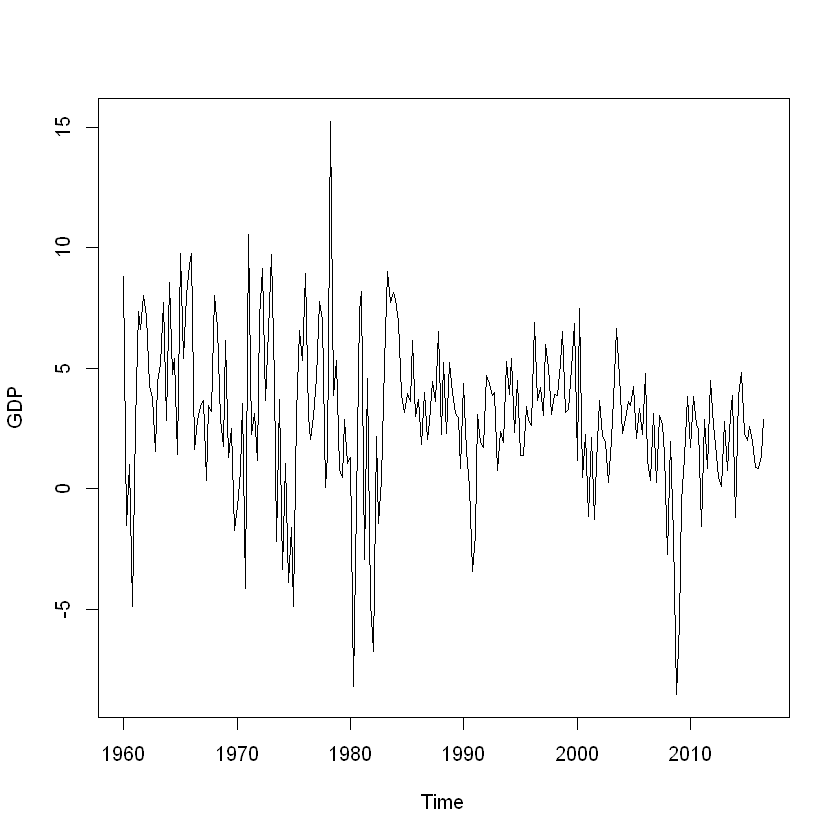

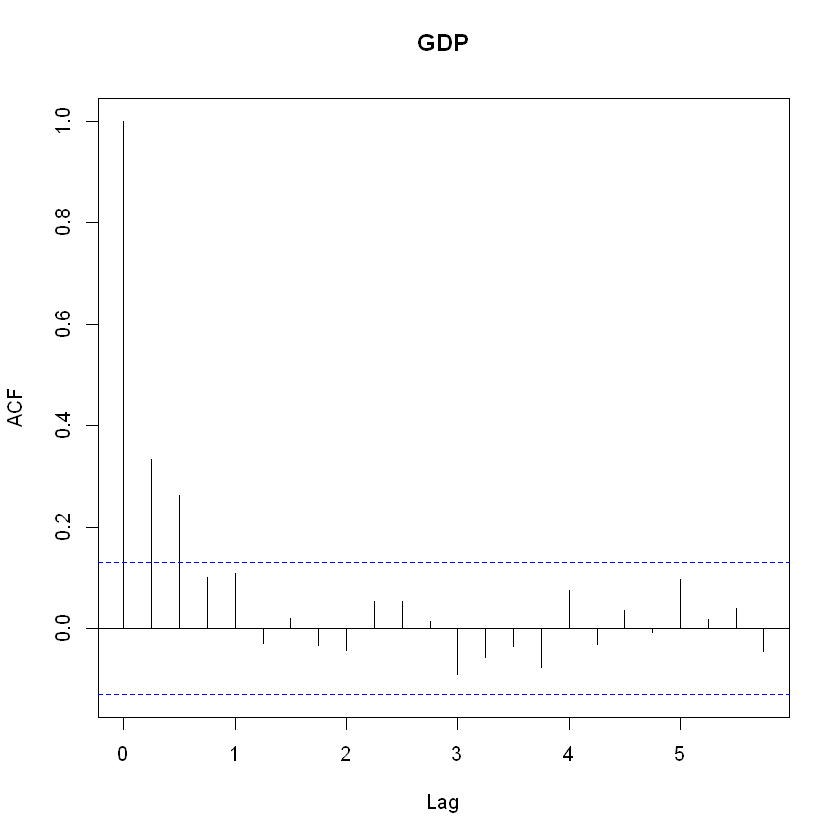

Series: grow 
ARIMA(2,0,0)           with non-zero mean 

Coefficients:
         ar1     ar2    mean
      0.2775  0.1695  3.0052
s.e.  0.0660  0.0662  0.3686

sigma^2 estimated as 9.652:  log likelihood=-578
AIC=1163.99   AICc=1164.17   BIC=1177.69

Series: grow 
ARIMA(0,0,2)           with non-zero mean 

Coefficients:
         ma1     ma2    mean
      0.2805  0.2068  3.0047
s.e.  0.0667  0.0574  0.3057

sigma^2 estimated as 9.76:  log likelihood=-579.24
AIC=1166.48   AICc=1166.66   BIC=1180.18

Series: grow 
ARIMA(1,0,1)           with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.6394  -0.3410  3.0040
s.e.  0.1158   0.1386  0.3737

sigma^2 estimated as 9.722:  log likelihood=-578.81
AIC=1165.62   AICc=1165.8   BIC=1179.32

Series: grow 
ARIMA(1,0,0)           with non-zero mean 

Coefficients:
         ar1    mean
      0.3369  3.0061
s.e.  0.0627  0.3127

sigma^2 estimated as 9.888:  log likelihood=-581.22
AIC=1168.44   AICc=1168.55   BIC=1178.72

Series: grow 
ARIMA(0,0,1)           with non-zero mean 

Coefficients:
         ma1    mean
      0.2413  3.0008
s.e.  0.0530  0.2625

sigma^2 estimated as 10.25:  log likelihood=-585.33
AIC=1176.65   AICc=1176.76   BIC=1186.93

$names
 [1] "coef"      "sigma2"    "var.coef"  "mask"      "loglik"    "aic"      
 [7] "arma"      "residuals" "call"      "series"    "code"      "n.cond"   
[13] "nobs"      "model"     "aicc"      "bic"       "x"         "fitted"   

$class
[1] "ARIMA" "Arima"

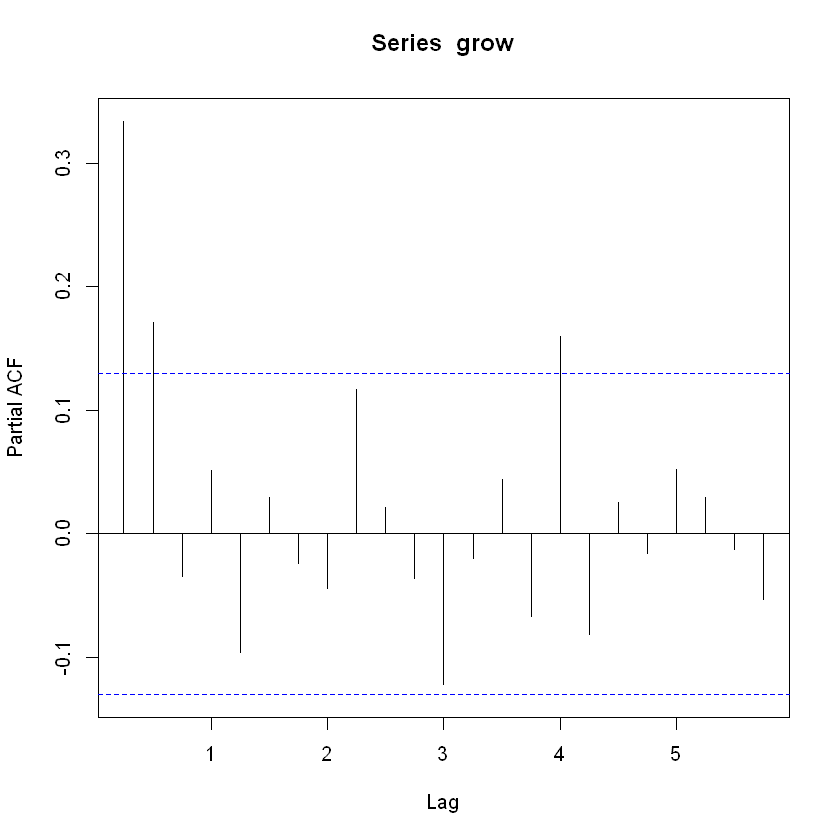


	Box-Ljung test

data:  my_model$residuals
X-squared = 20.642, df = 20, p-value = 0.4185


ERROR: Error in eval(expr, envir, enclos): could not find function "forecast.Arima"


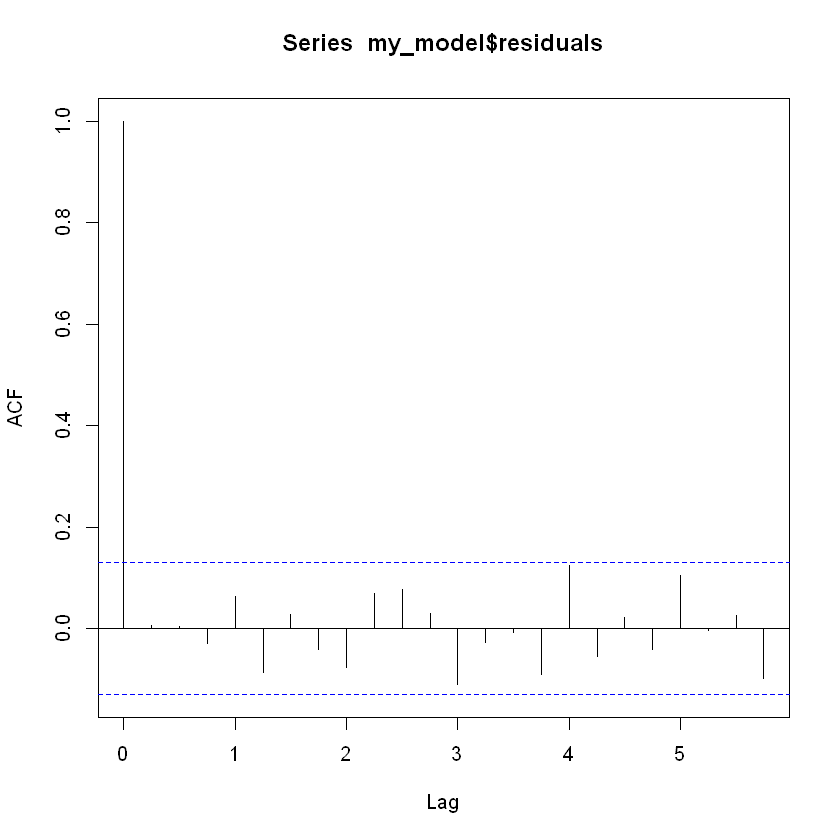

In [26]:
#packages:
#timeSeries
#forecast
#both installed and ready to use...

library(timeSeries)
library(forecast)

gdp_data <- read.csv('D:\\R_Projects\\gdp.csv')
#convert to time series, pass data, set start date by year and quarter, end by date and quarter, frequency by 4=quarterly
grow <- ts(gdp_data,start=c(1960,1), end=c(2016,3),frequency=4)
#data frame now organized by quarter and year
grow
#now plots by quarter and year as a line graph
plot(grow)

#if I want to forecast GDP growth for 4Q2016 - 2Q2017 (3 periods into the future)
#assume data is covariant stationary
#Want to make guesses based on the data:
plot(grow)
#this data has been seasonally adjusted (seasonality coming later)

acf(grow)
#ignore the value at lag 0; note that the bottom metric is by year
#We see two statistically significant, positive autocorrelation coeficients
#we dont see statistical significance beyond there, though there MIGHT be some pattern (fail to reject =0)
#in theory, an AR(2) has an ACF that only approaches 0 in the limit.  A failure to reject does not mean they = 0,
#It only means that we cannot rule it out as a possibility.  We suspect that an AR(2) could be a reasonable model
#with very small coeficients. 

pacf(grow)
#shows 2x statistically significant partial autocorrelation coeficients at lag 1 & 2 and...
#one potentially significant pacf at lag 16 (year4) - This is relevant, but discounted information. 
#It is plausible that the significant pacf at lag 16 is statistical error. 

#for seasonally adjusted data, odd pacf's on the adjusted range could signal a poor seasonal adjustment.  

#it is more likely than not a low order auto-regressive or moving average model, we guess an AR(2)
#that is because the 2 stat sig part=auto-correlation coeficients, with the caveat that the stat-sig at lag 16 would not be an AR2
#another potential model is an MA(2) based on the two significant ACF's

#Candidate models: AR(2) and MA(2); other could be ARMA(1,1); unlikely would be AR(1) and MA(1)
#arima -also will estimate, but use capitalized verison
#Arima -preferable
#order c(AR,0,MA)
Arima(grow,order=c(2,0,0)) #AR(2)
#BIC - Baysian Info Criteria = 1177.69 ~SIC
#AIC =1164.17
Arima(grow,order=c(0,0,2)) #MA(2)
#BIC = 1180.18
#AIC = 1166.66

#only looking at these two, we prefer the AR(2)
Arima(grow,order=c(1,0,1)) #ARMA(1,1)
#BIC = 1179.32
#AIC = 1165.8
Arima(grow,order=c(1,0,0)) #AR(1) !This should be a highly unlikely model
#BIC = 1178.72
#AIC = 1168.55
Arima(grow,order=c(0,0,1)) #MA(1)
#BIC = 1186,93
#AIC = 1176.76

#my candidate model is the AR(2) based on the BIC; the problem is the last step...
#I need to look at the residuals! 
my_model = Arima(grow,order=c(2,0,0)) #AR(2)
attributes(my_model) #what other data is with the object
acf(my_model$residuals) #plot the residuals
#I see no statistically significant ACFs, suggesting I dont have a problem with residuals
#consistent with the desired, that the only thing that is left appears to be consistent with white noise
Box.test(my_model$residuals,lag=20, type = "Ljung-Box")
#Ho = the first 20 AC coeficients are jointly =0 for the model residuals, alt is the complement of the null
#that test gets a test stat -f 20.642, Chi^2(20) can be looked up
#pvalue => 41.85% of all chi2 random variables are less than test statistic ... need this to be below 5%, REJECT Ho
#Need to pick a lag order that is big enough that it could account for any serial correlation
#Here we hope that we fail to reject.

#To run the forecast: 
forecast.Arima(my_model, h=4)
#h = horizon, number of time periods to forecast
plot.forecast(forecast.Arima(my_model, h=4), include=8)
#include will cause it to plot that many prior period data to compare with the forecast plot
#bands are 80 and 90% confidence intervals
attributes(forecast.Arima(my_model, h=4))
forecast.Arima(my_model, h=4)$mean


[1] 1/1/92  2/1/92  3/1/92  4/1/92  5/1/92  6/1/92  7/1/92  8/1/92  9/1/92 
 [10] 10/1/92 11/1/92 12/1/92 1/1/93  2/1/93  3/1/93  4/1/93  5/1/93  6/1/93 
 [19] 7/1/93  8/1/93  9/1/93  10/1/93 11/1/93 12/1/93 1/1/94  2/1/94  3/1/94 
 [28] 4/1/94  5/1/94  6/1/94  7/1/94  8/1/94  9/1/94  10/1/94 11/1/94 12/1/94
 [37] 1/1/95  2/1/95  3/1/95  4/1/95  5/1/95  6/1/95  7/1/95  8/1/95  9/1/95 
 [46] 10/1/95 11/1/95 12/1/95 1/1/96  2/1/96  3/1/96  4/1/96  5/1/96  6/1/96 
 [55] 7/1/96  8/1/96  9/1/96  10/1/96 11/1/96 12/1/96 1/1/97  2/1/97  3/1/97 
 [64] 4/1/97  5/1/97  6/1/97  7/1/97  8/1/97  9/1/97  10/1/97 11/1/97 12/1/97
 [73] 1/1/98  2/1/98  3/1/98  4/1/98  5/1/98  6/1/98  7/1/98  8/1/98  9/1/98 
 [82] 10/1/98 11/1/98 12/1/98 1/1/99  2/1/99  3/1/99  4/1/99  5/1/99  6/1/99 
 [91] 7/1/99  8/1/99  9/1/99  10/1/99 11/1/99 12/1/99 1/1/00  2/1/00  3/1/00 
[100] 4/1/00  5/1/00  6/1/00  7/1/00  8/1/00  9/1/00  10/1/00 11/1/00 12/1/00
[109] 1/1/01  2/1/01  3/1/01  4/1/01  5/1/01  6/1/01  7/1/01  8/1/01  9/1/01 
[118] 10/1/01 11/1/01 12/1/01 1/1/02  2/1/02  3/1/02  4/1/02  5/1/02  6/1/02 
[127] 7/1/02  8/1/02  9/1/02  10/1/02 11/1/02 12/1/02 1/1/03  2/1/03  3/1/03 
[136] 4/1/03  5/1/03  6/1/03  7/1/03  8/1/03  9/1/03  10/1/03 11/1/03 12/1/03
[145] 1/1/04  2/1/04  3/1/04  4/1/04  5/1/04  6/1/04  7/1/04  8/1/04  9/1/04 
[154] 10/1/04 11/1/04 12/1/04 1/1/05  2/1/05  3/1/05  4/1/05  5/1/05  6/1/05 
[163] 7/1/05  8/1/05  9/1/05  10/1/05 11/1/05 12/1/05 1/1/06  2/1/06  3/1/06 
[172] 4/1/06  5/1/06  6/1/06  7/1/06  8/1/06  9/1/06  10/1/06 11/1/06 12/1/06
[181] 1/1/07  2/1/07  3/1/07  4/1/07  5/1/07  6/1/07  7/1/07  8/1/07  9/1/07 
[190] 10/1/07 11/1/07 12/1/07 1/1/08  2/1/08  3/1/08  4/1/08  5/1/08  6/1/08 
[199] 7/1/08  8/1/08  9/1/08  10/1/08 11/1/08 12/1/08 1/1/09  2/1/09  3/1/09 
[208] 4/1/09  5/1/09  6/1/09  7/1/09  8/1/09  9/1/09  10/1/09 11/1/09 12/1/09
[217] 1/1/10  2/1/10  3/1/10  4/1/10  5/1/10  6/1/10  7/1/10  8/1/10  9/1/10 
[226] 10/1/10 11/1/10 12/1/10 1/1/11  2/1/11  3/1/11  4/1/11  5/1/11  6/1/11 
[235] 7/1/11  8/1/11  9/1/11  10/1/11 11/1/11 12/1/11 1/1/12  2/1/12  3/1/12 
[244] 4/1/12  5/1/12  6/1/12  7/1/12  8/1/12  9/1/12  10/1/12 11/1/12 12/1/12
[253] 1/1/13  2/1/13  3/1/13  4/1/13  5/1/13  6/1/13  7/1/13  8/1/13  9/1/13 
[262] 10/1/13 11/1/13 12/1/13 1/1/14  2/1/14  3/1/14  4/1/14  5/1/14  6/1/14 
[271] 7/1/14  8/1/14  9/1/14  10/1/14 11/1/14 12/1/14 1/1/15  2/1/15  3/1/15 
[280] 4/1/15  5/1/15  6/1/15  7/1/15  8/1/15  9/1/15  10/1/15 11/1/15 12/1/15
[289] 1/1/16  2/1/16  3/1/16  4/1/16  5/1/16  6/1/16  7/1/16  8/1/16 
296 Levels: 1/1/00 1/1/01 1/1/02 1/1/03 1/1/04 1/1/05 1/1/06 1/1/07 ... 9/1/99

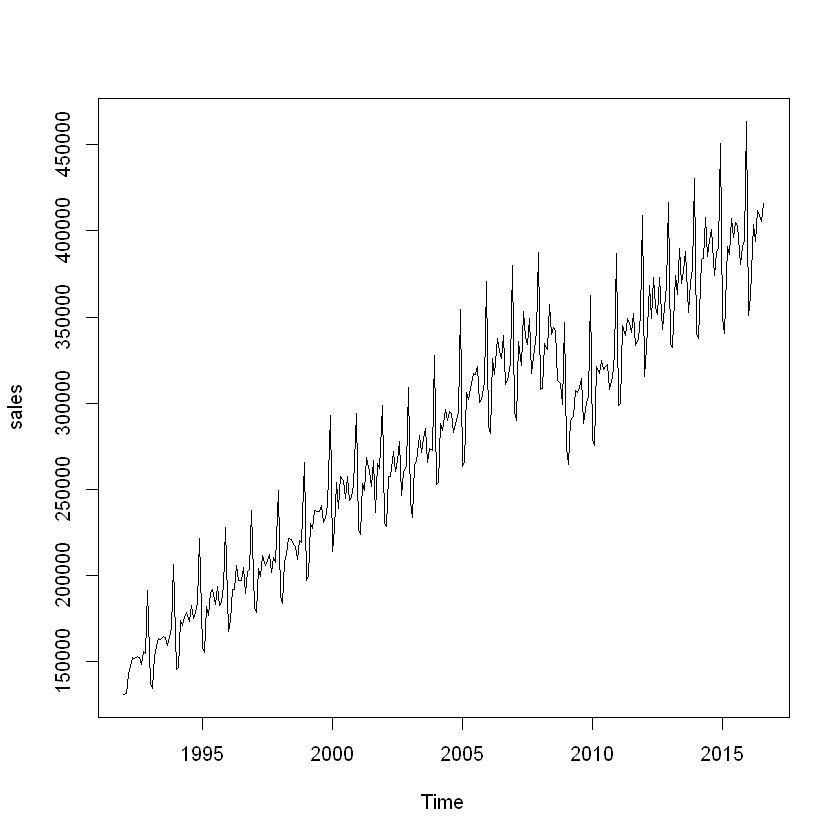

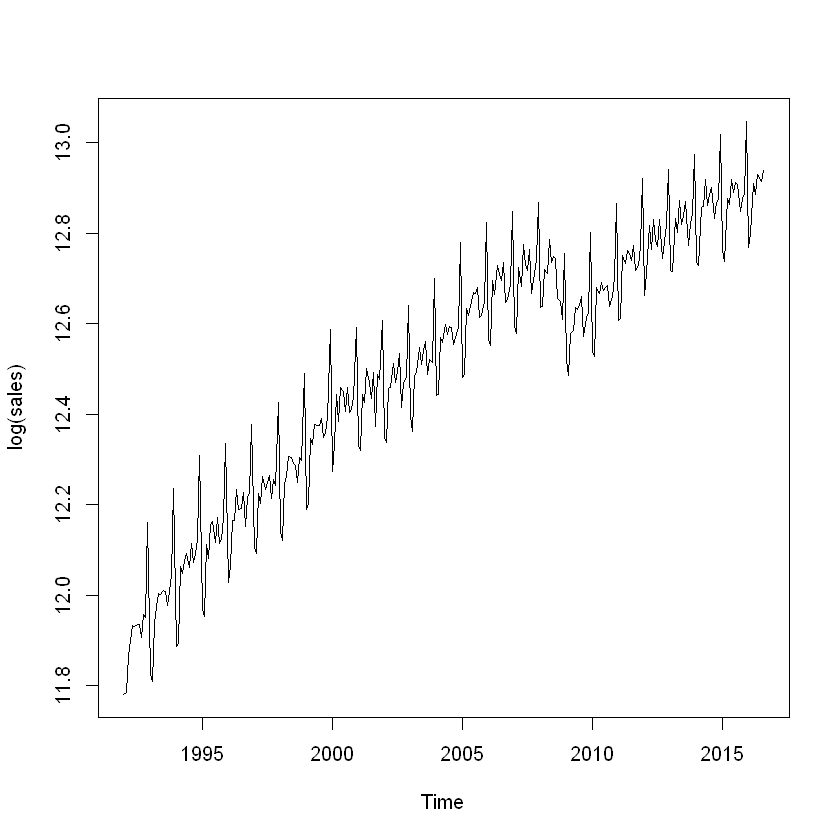

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1992 130683 131244 142488 147175 152420 151849 152586 152476 148158 155987
1993 137020 134462 153025 158615 163519 162964 164590 163989 159298 163992
1994 145276 146332 173562 170795 175527 178509 173198 182445 175128 178642
1995 158004 155156 181910 176635 190269 191609 182909 193370 182521 184276
1996 167372 173941 191851 191886 205797 196842 197140 204270 189424 201927
1997 181073 178428 203750 199219 211516 205491 208856 211952 201415 210145
1998 187445 183767 207973 212262 221155 220867 217687 216605 208915 220499
1999 196810 199451 230230 227109 237462 236830 236992 240478 230665 233193
2000 213709 227087 253717 239051 257581 255066 244445 257487 243624 245167
2001 226791 223971 253439 249062 268658 260315 251504 266460 236210 265188
2002 230546 228084 257133 257357 271682 260385 266795 277716 246350 259945
2003 242271 233478 264532 265990 281482 271242 279323 285212 265331 273781
2004 252818 253689 287944


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.091214 -0.013444  0.000308  0.012758  0.058912 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.402e-01  3.040e-01   2.106 0.036262 *  
z.lag.1      -5.232e-02  2.531e-02  -2.067 0.039774 *  
tt            1.365e-04  8.213e-05   1.662 0.097902 .  
z.diff.lag1  -4.356e-01  6.582e-02  -6.618 2.36e-10 ***
z.diff.lag2  -2.926e-01  7.092e-02  -4.125 5.11e-05 ***
z.diff.lag3   3.488e-02  7.349e-02   0.475 0.635515    
z.diff.lag4  -1.064e-01  7.165e-02  -1.485 0.138734    
z.diff.lag5   1.898e-02  7.202e-02   0.263 0.792398    
z.diff.lag6   2.338e-02  7.184e-02   0.326 0.745074    
z.diff.lag7  -5.513e-02  7.104e-02  -0.776 0.438501    
z.diff.lag8  -1.164e-0

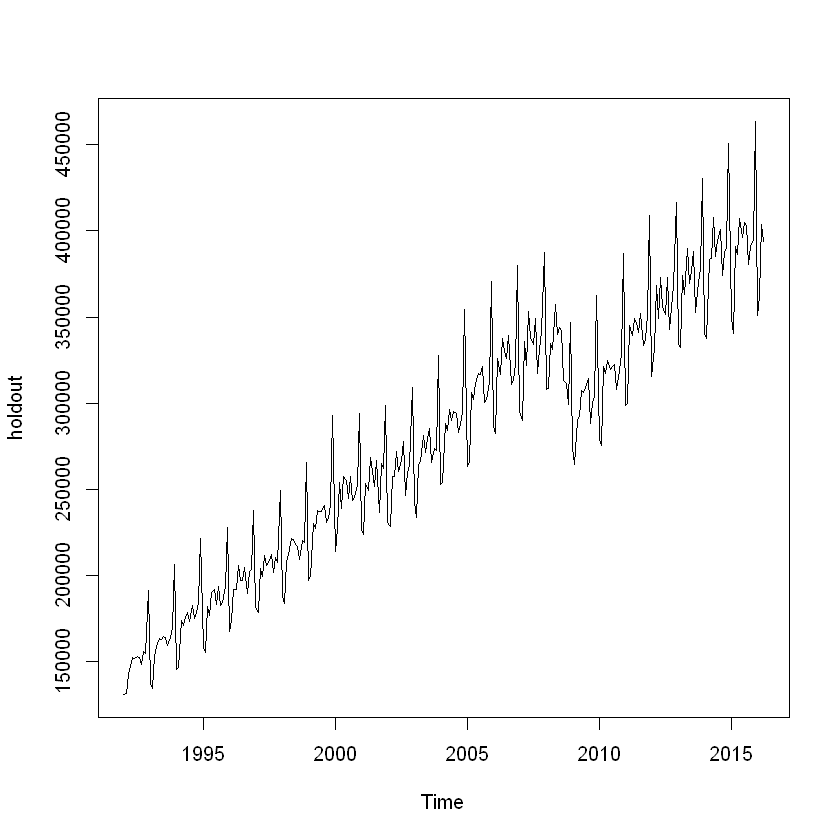

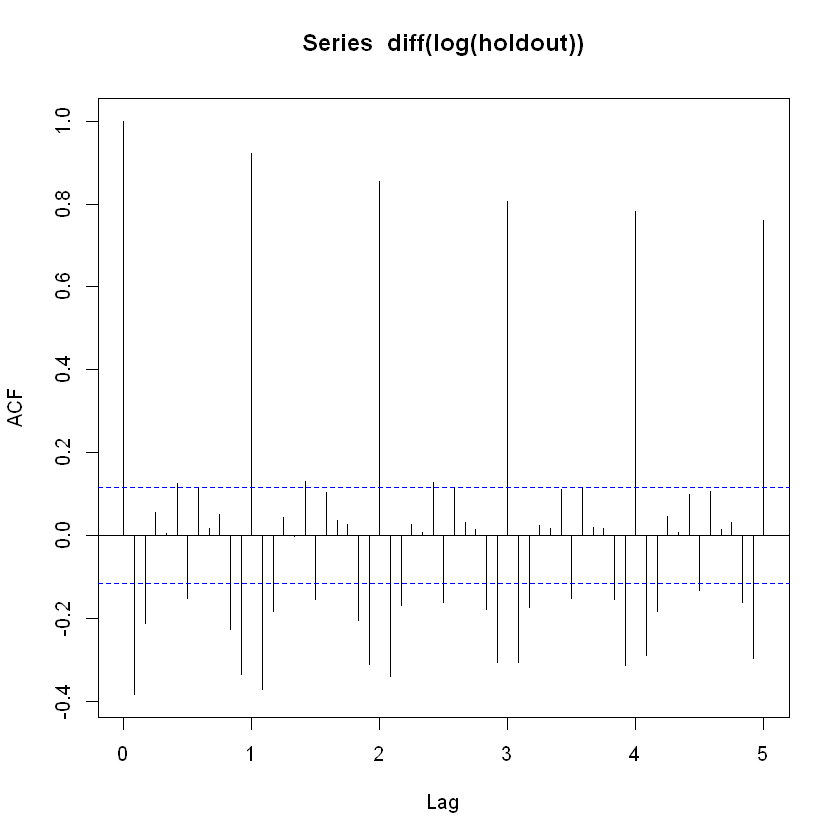

Series: log(holdout) 
ARIMA(2,1,0)(1,0,0)[12]                    

Coefficients:
          ar1      ar2    sar1
      -0.5374  -0.3120  0.9665
s.e.   0.0557   0.0559  0.0106

sigma^2 estimated as 0.0005607:  log likelihood=661.45
AIC=-1314.89   AICc=-1314.75   BIC=-1300.2

Training set error measures:
                       ME       RMSE        MAE         MPE      MAPE      MASE
Training set 0.0003621596 0.02351726 0.01758733 0.002878055 0.1410563 0.3367186
                   ACF1
Training set 0.03781102


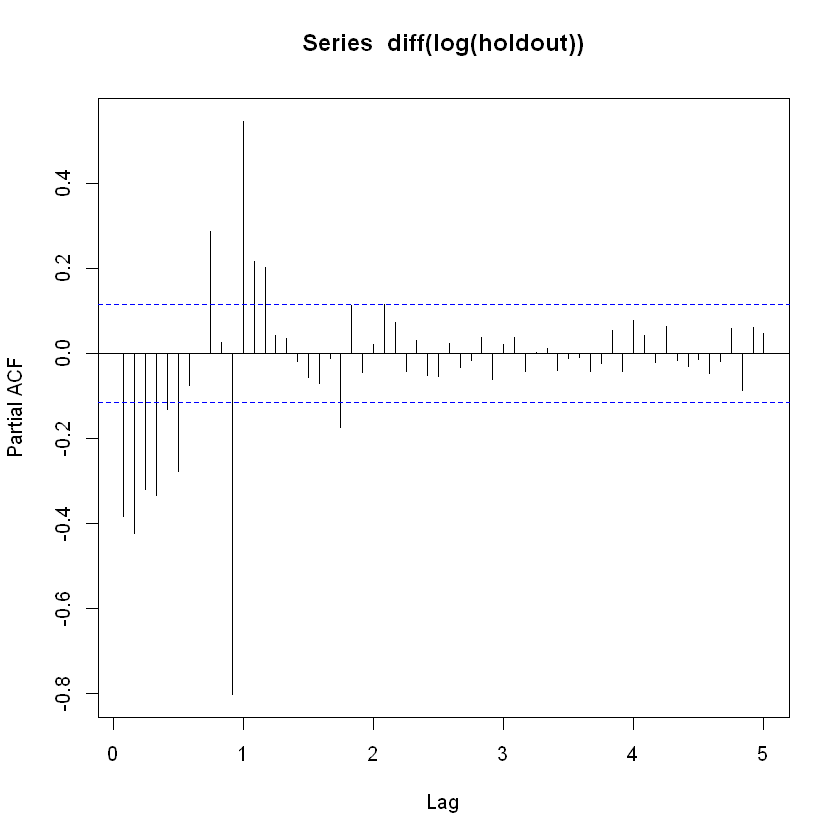

Series: log(holdout) 
ARIMA(2,1,0)(2,0,0)[12]                    

Coefficients:
          ar1      ar2    sar1    sar2
      -0.6023  -0.3797  0.6989  0.2773
s.e.   0.0560   0.0564  0.0590  0.0599

sigma^2 estimated as 0.000521:  log likelihood=671.52
AIC=-1333.04   AICc=-1332.83   BIC=-1314.67

Training set error measures:
                       ME       RMSE        MAE         MPE      MAPE      MASE
Training set 0.0002467518 0.02262971 0.01727564 0.001996122 0.1384134 0.3307511
                   ACF1
Training set 0.06665127


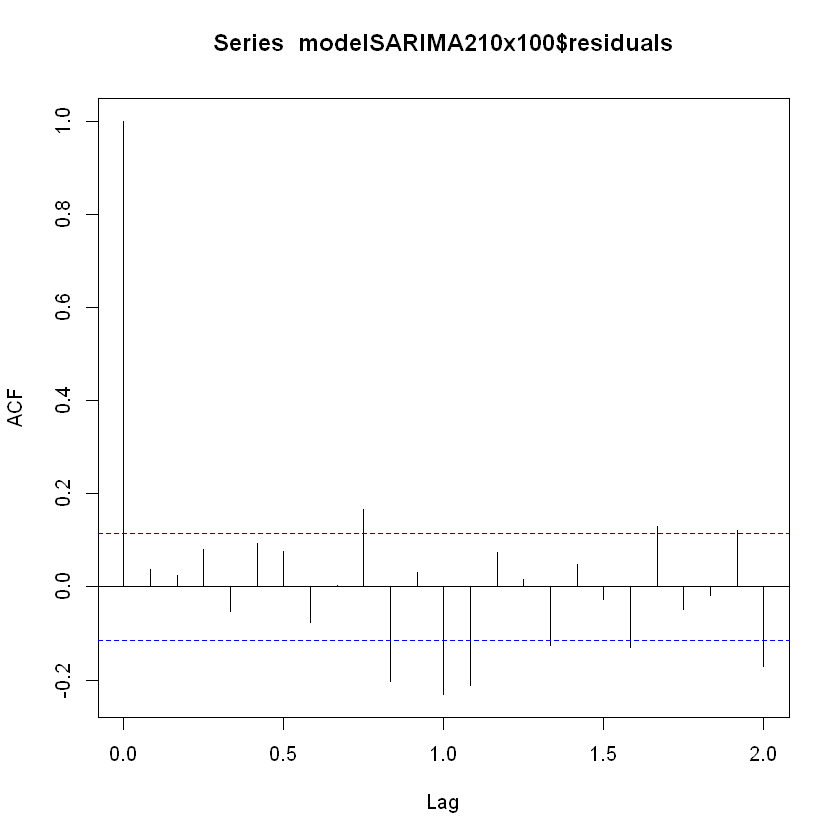

Series: log(holdout) 
ARIMA(2,1,0)(1,0,1)[12]                    

Coefficients:
          ar1      ar2    sar1     sma1
      -0.6153  -0.3841  0.9984  -0.7490
s.e.   0.0544   0.0547  0.0009   0.0461

sigma^2 estimated as 0.0004243:  log likelihood=696.03
AIC=-1382.07   AICc=-1381.86   BIC=-1363.7

Training set error measures:
                        ME       RMSE        MAE          MPE      MAPE
Training set -0.0004339806 0.02042115 0.01574423 -0.003345224 0.1261146
                  MASE       ACF1
Training set 0.3014316 0.07464425


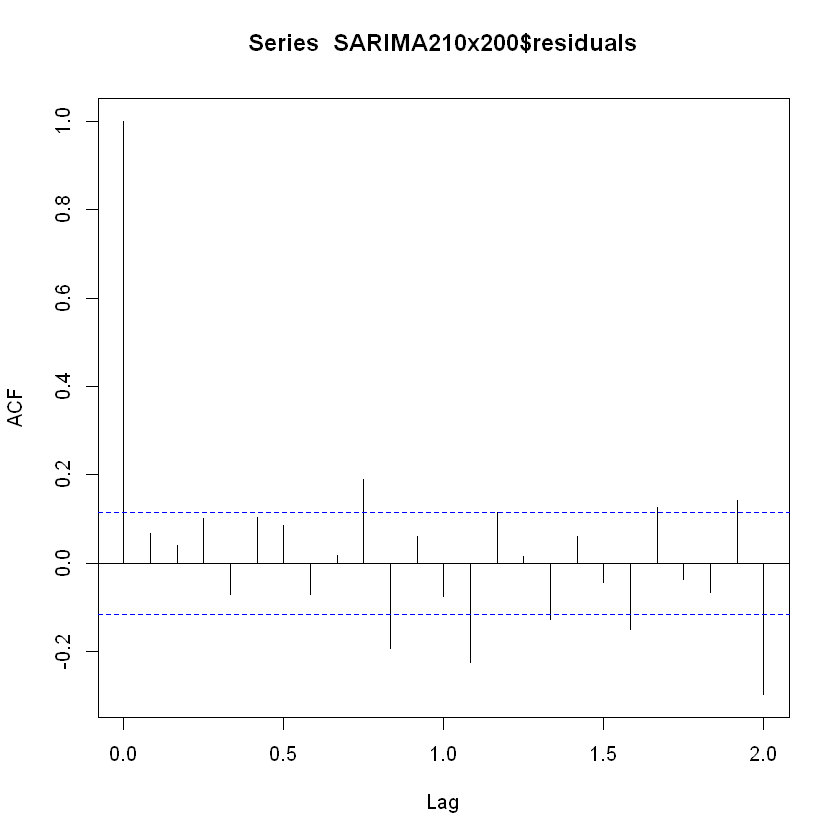

Series: log(holdout) 
ARIMA(3,1,2)(1,0,1)[12]                    

Coefficients:
          ar1      ar2      ar3     ma1     ma2    sar1     sma1
      -1.5138  -1.4120  -0.3559  1.1454  0.9860  0.9988  -0.7270
s.e.   0.0562   0.0649   0.0560  0.0163  0.0362  0.0006   0.0466

sigma^2 estimated as 0.0003369:  log likelihood=726.26
AIC=-1436.51   AICc=-1436   BIC=-1407.13

Training set error measures:
                        ME       RMSE        MAE          MPE      MAPE
Training set -0.0003199957 0.01810282 0.01368079 -0.002449866 0.1097329
                  MASE        ACF1
Training set 0.2619259 -0.04188742


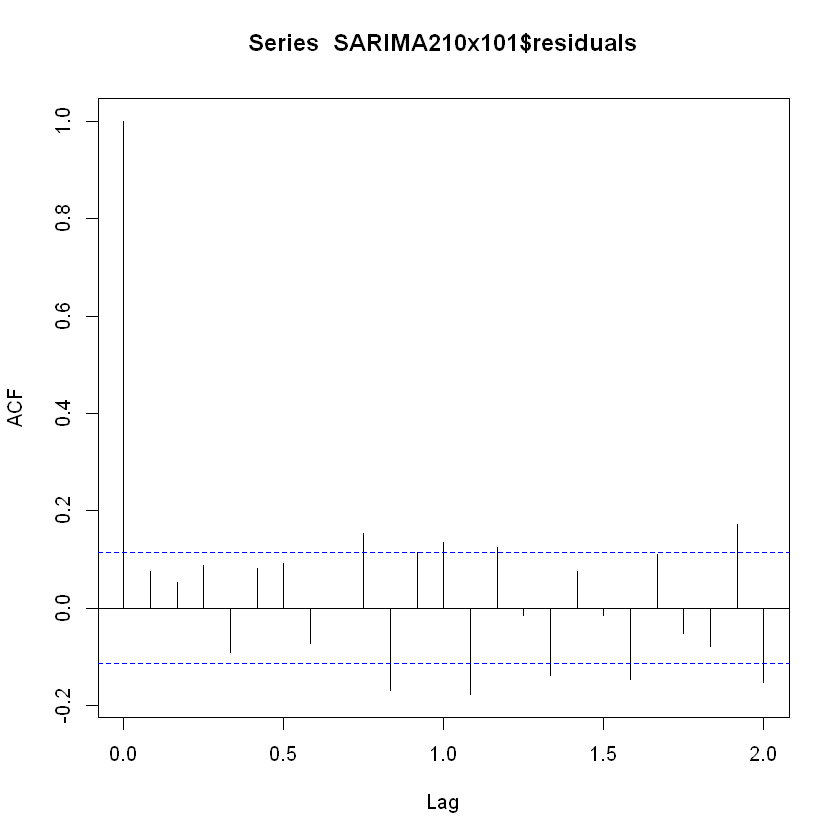


	Box-Ljung test

data:  SARIMA312x101$residuals
X-squared = 23.297, df = 25, p-value = 0.5602


ERROR: Error in eval(expr, envir, enclos): could not find function "forecast.Arima"


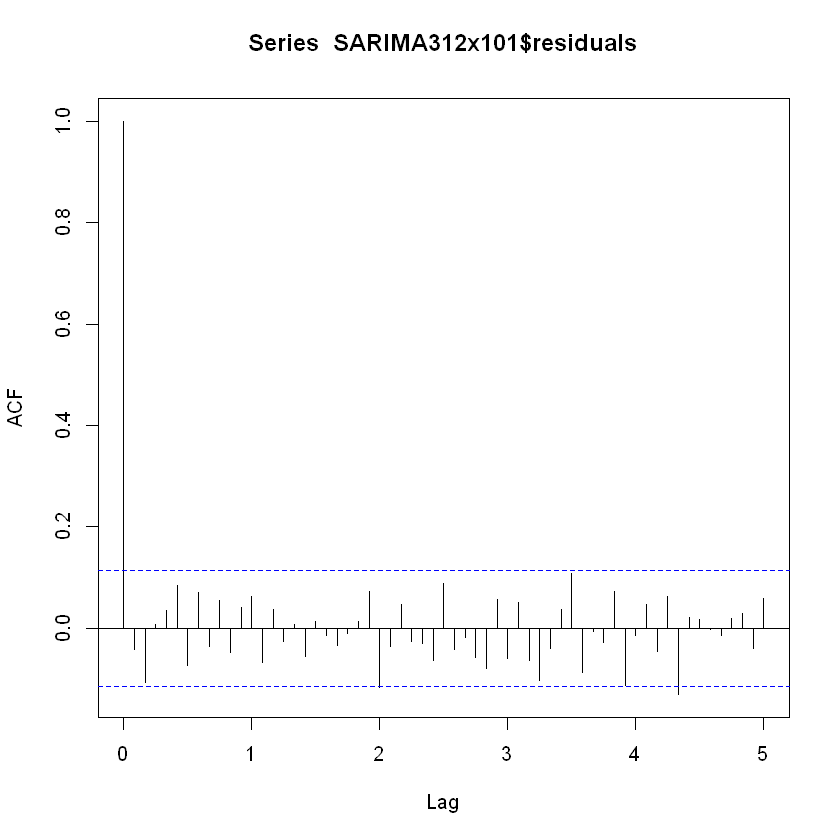

In [27]:
library(timeSeries)
library(forecast)
library(urca)

retail_data <- read.csv("D:\\R_Projects\\retail.csv",col.names=c('time','sales'))
retail_data$time
#runs from Jan 92 - Aug 16
#going to use a holdout-period... 
sales = ts(retail_data$sales, start = c(1992,1), end = c(2016,8),freq = 12)

plot(sales)
#shows some VERY clear seasonality, but there is also probably a break-in-trend(not convered in this class)

#Reasons to take a log transformation
#1. potential exponential growth
#2. if it acts as a stabalizer - something that can help with large fluctuations in volitility.  
#   It is potentially useful with this set because the gap in the seasonality spikes appears to be growing. 
#3. In cases where it may be appropriate to difference the data.  If you difference the ln, it becomes approx equal to the % change. 

#check log transformation
plot(log(sales))
#it has mitigated some of the volitility, but may have also introduced a trend into the data.  
#we're going to take the difference, so we may use this. Lean slightly towards taking the log, but not difinitive. 

#going to create a holdout period from Jan 92 to April 2016, then I can test model against may - aug 16
holdout = ts(sales, start = c(1992,1), end = c(2016,4), freq = 12)
plot(holdout)
holdout #can see the data ends apr 2016

#STEP 1 - Stationarity
#Unit Root Test - What deterministic component should I include in my data?  in this case: a trend and constant. When in doubt, include the trend. 
##there is an obvious break in the data here, which would cause serious problems with the unit root test.  
##in this case, differencing will allow us to brute-force through the unit-root test. 

#recal, any AR(p) process can be rewritten in difference form... (in notebook)

#conduct a unit-root test using urca unit root contegration(sp?) analysis
#Ho: alpha = 0
#Ha: alpha < 0
#test statistic = (predicted alpha - 0) / (predicted sigma of alpha) - this is distributed as a Dicky Fuller type distribution
#Using a 5% test size
testUR = ur.df(log(holdout), type = "trend", lags = 24, selectlags = "AIC")
#output: The value of the test statistic is: -2.0673 4.7192 3.2852 
#tau3 - test for single coeficient.  That is the one we want to tlook at
#phi2 & phi3 are joint hypothesis- not in this course, and most always agree to tau3
summary(testUR) #gives us the full output
#conducting a test that the alpha coeficient = 0, alternative is that it is less than 0
#test statistic = -2.0673
#critical value for 95%(5%) = -3.42
#as the test statistic of -2.067 exceeds critical value of -3.42 (one sided test), we fail to reject the Ho (Ho: alpha = 0)
#we are willing to entertain the Ha, that alpha is <0
#we fail to reject that there is a unit root, therefore the data MUST be differenced/it is appropriate to difference the data
#The DATA SHOULD BE DIFFERENCED


#in the future, I should hope that my data looks like this.  There is a lot of predictability in this data.  Everyhing in the future wont work this perfectly

acf(diff(log(holdout)),lag.max = 60)
#shows exceedingly obvious seasonality of major spikes showing up every year. This is awesome for forecasting, this tells us there is predictability in this data. 
#this could be a very complicated AR() type model

#we're going to use a sarima mode: to account for seasonality.  They are seasonal versions of more elaborate arima models. 
#Arima(x, order=c(0,0,0),seasonal=c(0,0,0), include.drift=FALSE) - default values
#seasonal=c(seasonal AR, seasonal difference, seasonal MA)
#SARIMA(p,d,q)x(P,D,Q) d= non-seasonal difference,P=seasonal AR, D=seasonal diff, Q = seasonal MA

pacf(diff(log(holdout)),lag.max = 60)
#looks as though the pacf are dying out, but there is still a large number of highly significant PACFs
#good chance of there being some MA component, because of the significant PACFs
#no obvious seasonal MA component, becuase not obvious seasonality, but there will actually be a seasonal MA portion.  just not visible here

#start with special case of an AR(14) model. 14 significant spikes in PACF, SAR model
#SARIMA(2,1,0)x(1,0,0)
modelSARIMA210x100 <- Arima(log(holdout),order=c(2,1,0),seasonal=c(1,0,0))
summary(modelSARIMA210x100)
#sar coeficient close to 1 supports seasonality
#SIC = -1300.2
#check acf to see if the residuals appear to be white noise
acf(modelSARIMA210x100$residuals)
#not to happy with this model because there are potentially significant coeficients, including several around my seasonal components

#Next idea, increase seasonal AR terms
SARIMA210x200 <- Arima(log(holdout),order=c(2,1,0),seasonal=c(2,0,0))
summary(SARIMA210x200)
#BIC = -1314.67 == much smaller than SARIMA210x100
acf(SARIMA210x200$residuals)
#still shows some statistically significant PACFs at seasonal lags, especially at lag 2
#better but still not there.  want to start considering models with a MA piece. 

#in stead of increasing seasonal AR, try using seasonal MA
SARIMA210x101 <- Arima(log(holdout),order=c(2,1,0),seasonal=c(1,0,1))
summary(SARIMA210x101)
#BIC = -1363.7
acf(SARIMA210x101$residuals)
#Still seeing statistical significance around the first seasonal lag, but all aroudn this is looking a little closer to white noise

#Adding more AR terms, and eventually a MA piece as well. 
#final model, skipping ahead
SARIMA312x101 <- Arima(log(holdout),order = c(3,1,2), seasonal = c(1,0,1))
summary(SARIMA312x101)
#BIC= -1407.13
acf(SARIMA312x101$residuals, lag.max=60)
#this shows what appear to not be statistically significant PACFs

#verify residuals with Box-Pierce test
Box.test(SARIMA312x101$residuals, lag=25, type="Ljung-Box")
#X-squared = 23.297, df = 25, p-value = 0.5602
#pvalue says we fail to reject, meaning the residuals resemnble white noise. 


#now that we have a model, time to predict and validate against the holdout
#we modeled based on the difference of the log, which needs to be taken back to actual whole numbers
foreIN <- forecast.Arima(SARIMA312x101, h=4, lambda=0) #lambda=0 -> box-cox transformation, brings me back out to whole numbers-ONLY FOR LOG!!
#Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
#May 2016       415181.3 405526.1 425066.3 400506.3 430394.0
#Jun 2016       407857.4 396664.4 419366.2 390864.1 425589.5
#Jul 2016       404809.5 391623.8 418439.1 384818.5 425839.0
#Aug 2016       414044.2 398890.2 429773.9 391094.0 438341.1
attributes(foreIN)
#mean = actual forecasted value
#r gives us 80 & 95% confidence bands.  We only want to look at the 95% confidence bands, we'll turn them into independent Time Series
upper=ts(foreIN$upper[,2], start = c(2016,5), frequency = 12)
lower=ts(foreIN$lower[,2], start = c(2016,5), frequency = 12)

plot(cbind(window(sales,start=c(2015,1)),foreIN$mean,upper,lower),
     plot.type="single",col=c("blue","red","black","black"),
     ylab=NULL, lty=c("solid","solid","dashed","dashed"))
legend("topright",legend=c("Retail Sales","Forecast","Upper 95% CI","Lower 95% CI"),fill=c("blue","red","black","black"))

#now we produce an out-of sample forecast, using the whole dataset as opposed to the holdout
full_model <- Arima(log(sales),order = c(3,1,2), seasonal = c(1,0,1))
foreOUT <- forecast.Arima(full_model, h=4, lambda = 0)

upperOUT=ts(foreOUT$upper[,2], start = c(2016,9), frequency = 12)
lowerOUT=ts(foreOUT$lower[,2], start = c(2016,9), frequency = 12)

plot(cbind(window(sales,start=c(2015,6)),foreOUT$mean,upperOUT,lowerOUT),
     plot.type="single",col=c("blue","red","black","black"),
     ylab=NULL, lty=c("solid","solid","dashed","dashed"))
legend("topleft",legend=c("Retail Sales","Forecast","Upper 95% CI","Lower 95% CI"),fill=c("blue","red","black","black"))


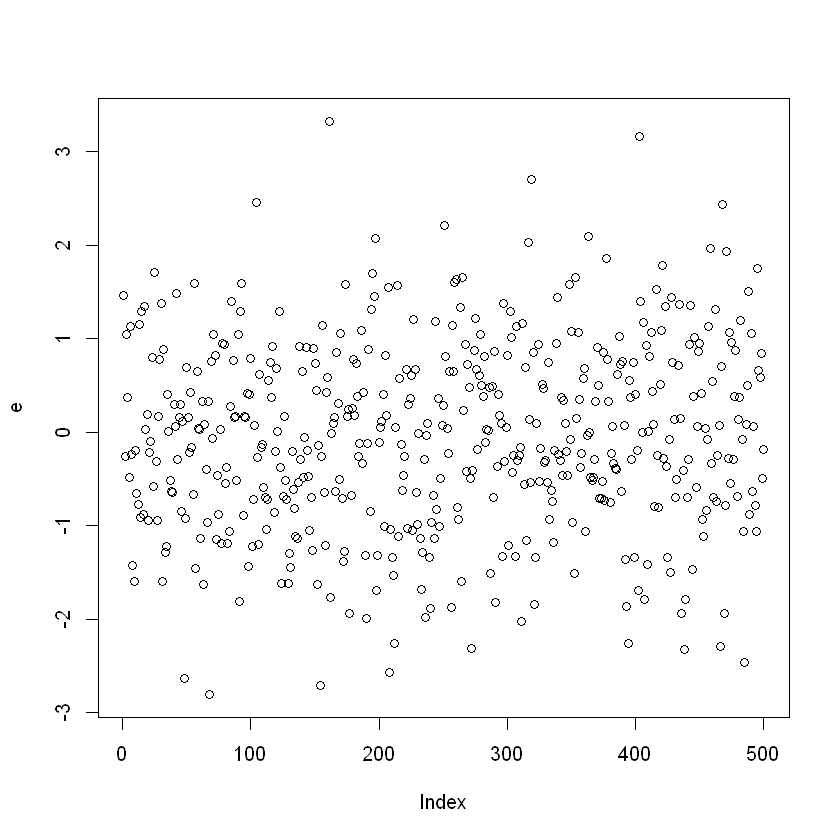

ERROR: Error in ar1[1] <- e[1]: object 'ar1' not found


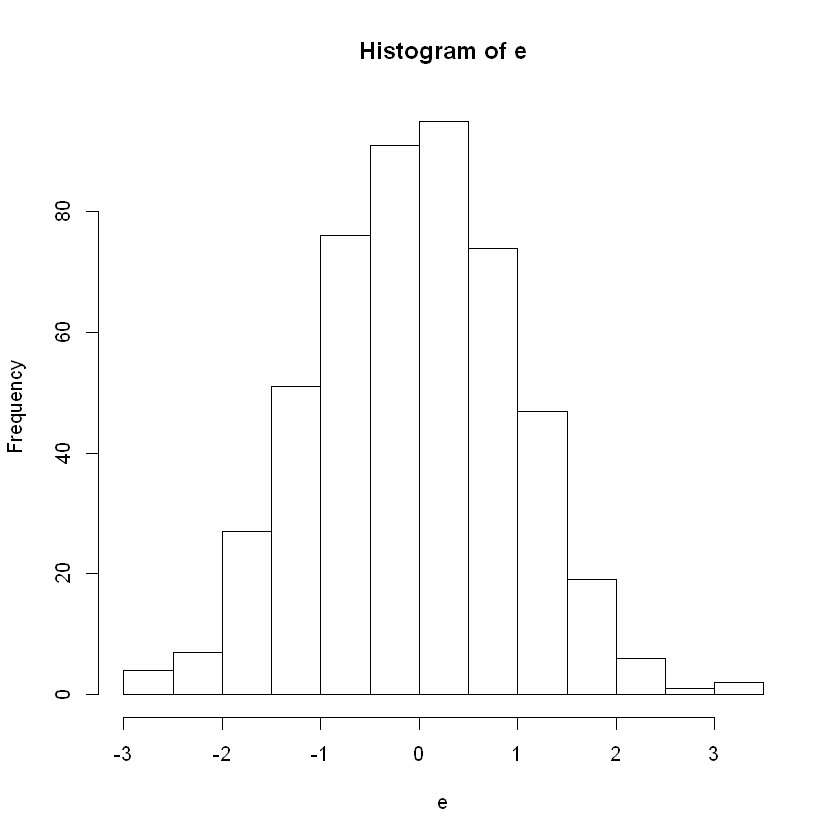

In [28]:
#simulated data
#normal dist with n=500, mean = 0, sd = 1
e <- rnorm(500)
plot(e)
hist(e)

#AR(1) simulation
ar1[1] <- e[1]
for(i in 2:500){ar1[i]=0.9*ar1[i-1]+e[i]}
plot(ar1)
hist(ar1)
#auto corelation function
acf(ar1)
#partial auto correlation
pacf(ar1)

#MA(1) simulation
ma[1]<- e[1]
for (i in 2:500){ma1[i] = e[i]+.9*e[i-1]}
#Auto Coorelation coef - of 0 always = 1
acf(ma1)
#partial auto correlation
pacf(ma1)

'data.frame':	10 obs. of  3 variables:
 $ Year   : int  2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 $ attend : int  29490 29795 24320 27641 30928 36382 42719 38759 33564 30763
 $ winning: num  48.8 49.4 46.3 48.8 53.7 ...


      Year          attend         winning     
 Min.   :2005   Min.   :24320   Min.   :41.36  
 1st Qu.:2007   1st Qu.:29566   1st Qu.:48.77  
 Median :2010   Median :30846   Median :51.54  
 Mean   :2010   Mean   :32436   Mean   :51.63  
 3rd Qu.:2012   3rd Qu.:35678   3rd Qu.:55.76  
 Max.   :2014   Max.   :42719   Max.   :59.26  

      Year       attend         winning     
 2005   :1   Min.   :24320   Min.   :41.36  
 2006   :1   1st Qu.:29566   1st Qu.:48.77  
 2007   :1   Median :30846   Median :51.54  
 2008   :1   Mean   :32436   Mean   :51.63  
 2009   :1   3rd Qu.:35678   3rd Qu.:55.76  
 2010   :1   Max.   :42719   Max.   :59.26  
 (Other):4                                  


	Box-Ljung test

data:  myResid
X-squared = 0.47065, df = 3, p-value = 0.9253


[1] 11.34487

$names
[1] "acf"    "type"   "n.used" "lag"    "series" "snames"

$class
[1] "acf"

[1] 0.1413439

[1] 0.4706462


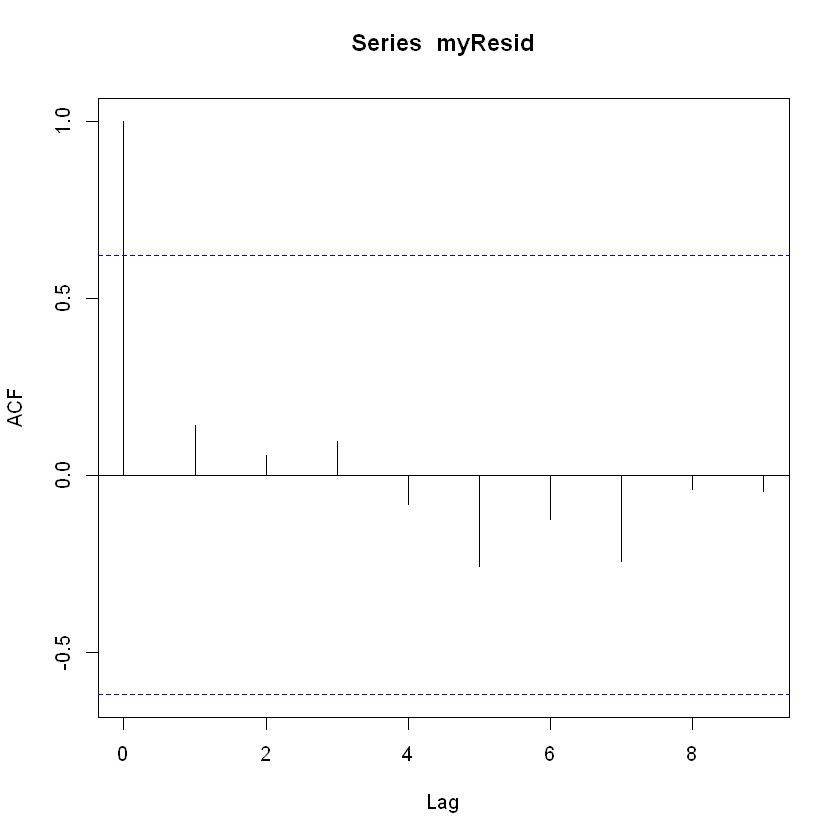

In [29]:
rangers <- read.csv("D:\\R_Projects\\rangers.csv")
str(rangers)
summary(rangers)
#convert year from int to factor
rangers$Year <- as.factor(rangers$Year)
summary(rangers)
results <- lm(rangers$attend~rangers$winning)

#ijung box 
myResid <- resid(results)
Box.test(myResid, lag = 3, type = "Ljung-Box")
#optional variables include:
#lag
#test type ("Box-Pierce", "Ljung-Box")
#	Box-Ljung test---Results: 
#data:  myResid
#X-squared = 0.47065, df = 3, p-value = 0.9253
qchisq(.99, df=3) #alpha = 1%, degrees of freedom =3
#[1] 11.34487
#test stat 0.47065 < table value 11.34487 - Fail to reject Ho

rho <- acf(myResid)
#rho is 
attributes(rho)
#class = acf
rho$acf[2] #pulls second element (element 1); element 0 = 1 always
#[1] 0.1413439
#manual calculation of LB test stat using acf results
temp <- (((rho$acf[2])^2)/(9)) + (((rho$acf[3])^2)/(8)) + (((rho$acf[4])^2)/(7))
LB <- 120*temp
print(LB)
#[1] 0.4706462 < crit value 11.34, so fail to reject Ho ...using 1% test our associated critical value is 11.34, so we fail to reject Ho


In [30]:
rangers <- read.csv("D:\\R_Projects\\rangers.csv")
str(rangers)
summary(rangers)
#convert year from int to factor
rangers$Year <- as.factor(rangers$Year)
summary(rangers)

#regression
results <- lm(rangers$attend~rangers$winning)
#Log Likelihood model
llm <- logLik(results)
#AIC manually vs R
-2*llm/10+2*2/10 #T = 10, K = 2 (constant & winning)
AIC(results)
#manually calculate R methodology with K being +1 from normal
-2*llm+(2*3)

'data.frame':	10 obs. of  3 variables:
 $ Year   : int  2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 $ attend : int  29490 29795 24320 27641 30928 36382 42719 38759 33564 30763
 $ winning: num  48.8 49.4 46.3 48.8 53.7 ...


      Year          attend         winning     
 Min.   :2005   Min.   :24320   Min.   :41.36  
 1st Qu.:2007   1st Qu.:29566   1st Qu.:48.77  
 Median :2010   Median :30846   Median :51.54  
 Mean   :2010   Mean   :32436   Mean   :51.63  
 3rd Qu.:2012   3rd Qu.:35678   3rd Qu.:55.76  
 Max.   :2014   Max.   :42719   Max.   :59.26  

      Year       attend         winning     
 2005   :1   Min.   :24320   Min.   :41.36  
 2006   :1   1st Qu.:29566   1st Qu.:48.77  
 2007   :1   Median :30846   Median :51.54  
 2008   :1   Mean   :32436   Mean   :51.63  
 2009   :1   3rd Qu.:35678   3rd Qu.:55.76  
 2010   :1   Max.   :42719   Max.   :59.26  
 (Other):4                                  

'log Lik.' 19.36499 (df=3)

[1] 195.6499

'log Lik.' 195.6499 (df=3)

'data.frame':	10 obs. of  3 variables:
 $ Year   : int  2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 $ attend : int  29490 29795 24320 27641 30928 36382 42719 38759 33564 30763
 $ winning: num  48.8 49.4 46.3 48.8 53.7 ...


      Year          attend         winning     
 Min.   :2005   Min.   :24320   Min.   :41.36  
 1st Qu.:2007   1st Qu.:29566   1st Qu.:48.77  
 Median :2010   Median :30846   Median :51.54  
 Mean   :2010   Mean   :32436   Mean   :51.63  
 3rd Qu.:2012   3rd Qu.:35678   3rd Qu.:55.76  
 Max.   :2014   Max.   :42719   Max.   :59.26  

      Year       attend         winning     
 2005   :1   Min.   :24320   Min.   :41.36  
 2006   :1   1st Qu.:29566   1st Qu.:48.77  
 2007   :1   Median :30846   Median :51.54  
 2008   :1   Mean   :32436   Mean   :51.63  
 2009   :1   3rd Qu.:35678   3rd Qu.:55.76  
 2010   :1   Max.   :42719   Max.   :59.26  
 (Other):4                                  


Call:
lm(formula = rangers$attend ~ rangers$winning)

Residuals:
    Min      1Q  Median      3Q     Max 
-3975.2 -2459.9  -808.4  1606.1  6300.2 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -7633.0    10932.4  -0.698  0.50484   
rangers$winning    776.0      210.6   3.685  0.00618 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3552 on 8 degrees of freedom
Multiple R-squared:  0.6292,	Adjusted R-squared:  0.5829 
F-statistic: 13.58 on 1 and 8 DF,  p-value: 0.006178


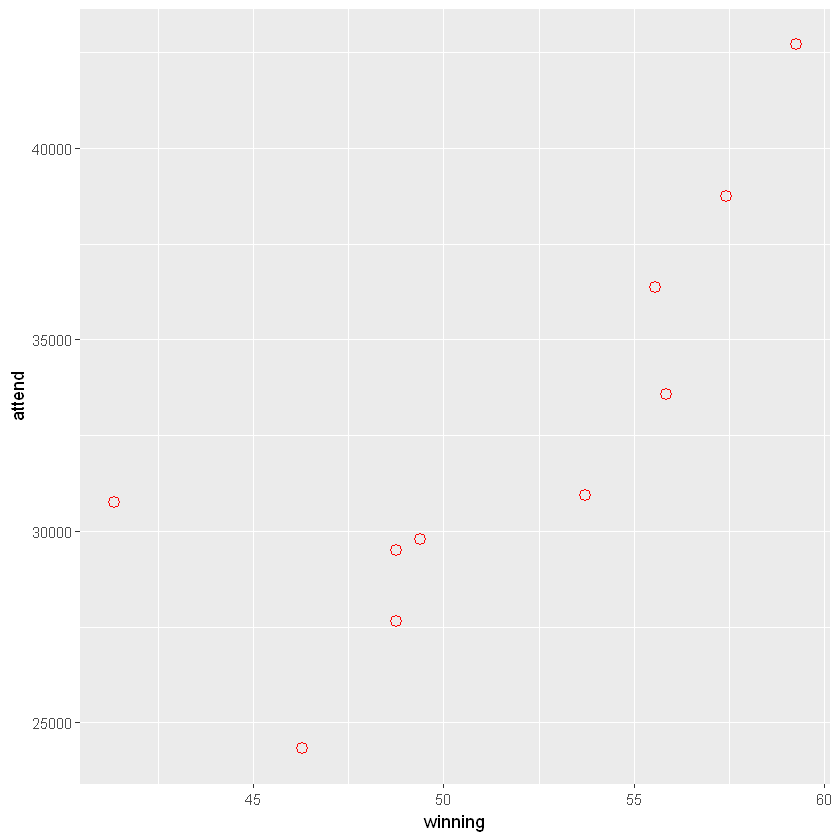

         1          2          3          4          5          6          7 
 -721.3448  -895.3872 -3975.1752 -2570.3448 -3115.6840   901.1888  4363.9344 
         8          9         10 
 1841.0616 -2128.4127  6300.1640 


[1] 32436.1

[1] 5499.01

[1] 272151989
[1] 100906013


[1] 3551.514

[1] -94.82496


'log Lik.' -94.82496 (df=3)


Call:
lm(formula = rangers$attend ~ rangers$winning + class)

Residuals:
    Min      1Q  Median      3Q     Max 
-3964.0 -2297.9  -959.7  1609.0  6315.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -7659.329  11674.436  -0.656   0.5327  
rangers$winning   776.524    224.907   3.453   0.0107 *
class              -2.174     16.461  -0.132   0.8987  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3792 on 7 degrees of freedom
Multiple R-squared:  0.6302,	Adjusted R-squared:  0.5245 
F-statistic: 5.963 on 2 and 7 DF,  p-value: 0.03077


[1] 0.6292292
[1] 0.5828828


[1] 195.6499

[1] 193.6499
[1] 19.42551


[1] 196.5577

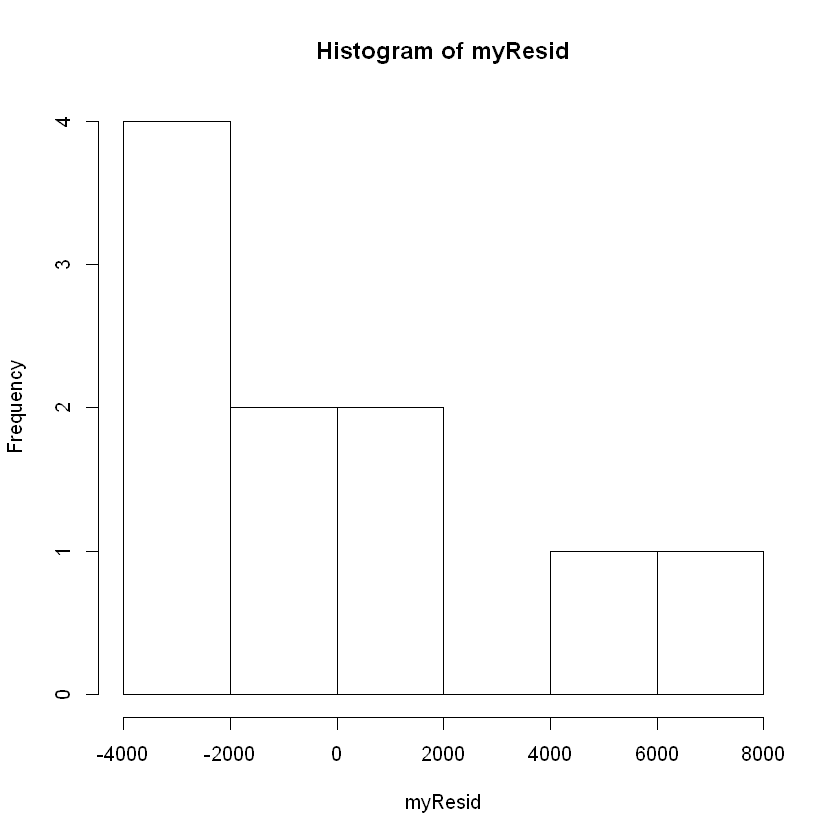

ERROR: Error in library(GGally): there is no package called 'GGally'


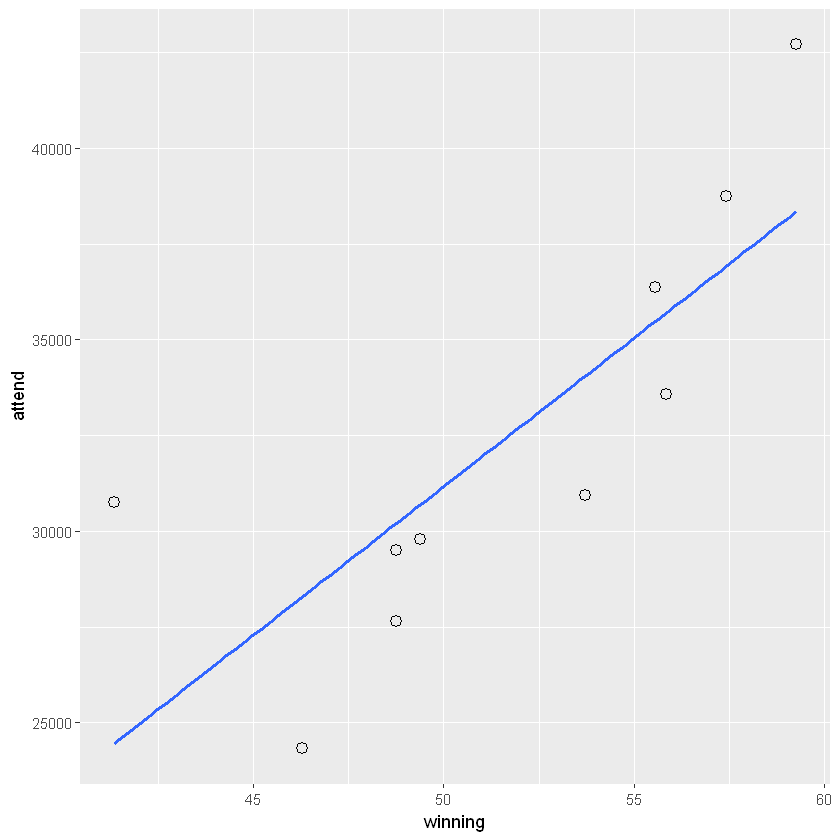

In [31]:
rangers <- read.csv("D:\\R_Projects\\rangers.csv")
str(rangers)
summary(rangers)
#convert year from int to factor
rangers$Year <- as.factor(rangers$Year)
summary(rangers)

library(ggplot2)
rangerPlot <- ggplot(rangers, aes(x = winning, y = attend)) 
rangerPlot + geom_point(shape = 1, size = 3, color = "red")

#basic linear regression
lmResults <- lm(rangers$attend~rangers$winning)
summary(lmResults)

#calculate and print residuals
myResid <- resid(lmResults)
hist(myResid)
print(myResid)

#basic statistics of dependent variable
mean(rangers$attend)
sd(rangers$attend)

#total sum of squares
tss <- (sd(rangers$attend)^2) * (length(rangers$attend)-1)
print(tss)

#sum of squared errors (SSE) *Minimize this*
sse <- sum(myResid^2)
print(sse)

#Standard error of the regression (residual Standard error) *minimize this*
sqrt(sse / (length(rangers$attend)-2))

#Log Likelyhood model/function *want higher likelyhood values*
#means data is more likely given the model
t<- length(rangers$attend)
llm <- (-t/2)*(log(2*pi)+log(sse/t)+1)
print(llm)
#easy way
logLik(lmResults)

#R^2 *Not the best method to compare models - Don't Use in this Class!!!*
#example to demonstrate lack of value in R^2
class <- c(58, -200, pi, 97, 14, 6.67, 2*pi, 0, exp(1), 4)
summary(lm(rangers$attend~rangers$winning+class))
#old R^2 (without class) was 0.6292, this is an R^2 of 0.6304
#R^2 will always select the noisey model; adjusted R^2 at least penalizes for additional models
#want to assess the model, but also account for the number of parameters included in the model
r2 <- 1-(sse/tss)
print(r2) #proportion of variance we believe is explained in the model. Coef of determination

#adjusted R2
adjR2 <- 1-( ((1/(t-2))*sse) / ((1/(t-1))*tss) )
print(adjR2)

#t-stat - Allows me to test is a particular parameter is important or not to the model
#in my rangers attend~winning model: Beta of winning has a t-stat of 0.00618
#Ho: B(winning) == 0; Ha:B(winning) != 0
#tstat = Bhat - 0 / se(Bhat)
#how willing am I to be incorrect: alpha = ?- 5% is pretty typical, but not neccisarily the right answer
#call the alpha "Test Size" ... using a normal distribution N(0,1)


#AIC
#?AIC
#AIC = -2*log-likelihood + k*npar : Akaike's 'An Information Criterion'
AIC(lmResults)
myAIC<- (-2*llm+4) #this is still the R version of AIC
print(myAIC)

#BIC in R = SIC *We prefer smaller SIC numbers*
sic <- (-2*llm/t)+(log(t)*2/t) #manual calculation
print(sic)
BIC(lmResults)


#plot with Linear Model
rangerPlot + geom_point(shape = 1, size = 3) + geom_smooth(method = 'lm', se=FALSE)

#SPLOM
library(GGally)
GGally::ggpairs(rangers)


#problem set #1 data as matrix
x <- c(-1.5562, -1.1760, 1.3032, -0.6286, 1.5443)
y <- c(1.8665, 2.3983, 2.6496, 3.5241, 3.0209)
sum(x)
sum(y)
myDf <- as.data.frame(cbind(x,y))
summary(myDf)
ggplot(myDf, aes(x = x, y = y)) + geom_point() + geom_smooth()
